<a href="https://colab.research.google.com/github/SarthakV7/Kaggle_google_quest_challenge/blob/master/case_study_2_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from tqdm.notebook import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# reading the data into dataframe using pandas
train = pd.read_csv('drive/My Drive/case_study_2/train.csv')
test = pd.read_csv('drive/My Drive/case_study_2/test.csv')
submission = pd.read_csv('drive/My Drive/case_study_2/sample_submission.csv')

## About the data:
- The train data contains 6079 listings and each listing has 41 columns. Out of these 41 columns, ‘question_title’, ‘question_body’ and ‘answer’ are to be used as the input, and for output we have 30 target labels.
- The input features are all text features that contain the title of the question, description of the question and the answer to that question.
- The output features are all of float type, some are binary features that take a value of either 0 or 1 and some take a value between 0 and 1.

In [ ]:
# Let's check the top 5 entries of train data.
train.head()

qa_id  ... answer_well_written
0      0  ...            1.000000
1      1  ...            0.888889
2      2  ...            0.888889
3      3  ...            1.000000
4      5  ...            1.000000

[5 rows x 41 columns]

In [ ]:
# Let's list the features provided in the train data
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [ ]:
# Let's check the statistical description of the numerical features in train data
train.describe()

qa_id  ...  answer_well_written
count  6079.000000  ...          6079.000000
mean   4829.665899  ...             0.908254
std    2789.689555  ...             0.100708
min       0.000000  ...             0.333333
25%    2389.000000  ...             0.888889
50%    4847.000000  ...             0.888889
75%    7222.000000  ...             1.000000
max    9647.000000  ...             1.000000

[8 rows x 31 columns]

In [ ]:
# These are the features provided in the test data
test.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')

In [ ]:
test.describe()

qa_id
count   476.000000
mean   5029.186975
std    2812.670060
min      39.000000
25%    2572.000000
50%    5093.000000
75%    7482.000000
max    9640.000000

In [ ]:
# these are the features that we need to include while submitting the results
submission.columns

Index(['qa_id', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written'],
      dtype='object')

## EDA

#### Question IDs

In [ ]:
# Statistical description of question_id feature (this feature is irrelevant, will be used only for mapping the results)
train['qa_id'].describe()

count    6079.000000
mean     4829.665899
std      2789.689555
min         0.000000
25%      2389.000000
50%      4847.000000
75%      7222.000000
max      9647.000000
Name: qa_id, dtype: float64

In [ ]:
test['qa_id'].describe()

count     476.000000
mean     5029.186975
std      2812.670060
min        39.000000
25%      2572.000000
50%      5093.000000
75%      7482.000000
max      9640.000000
Name: qa_id, dtype: float64

#### Question title

In [ ]:
# A text feature that represents the title of the question.
train['question_title'].head()

0    What am I losing when using extension tubes in...
1    What is the distinction between a city and a s...
2    Maximum protusion length for through-hole comp...
3                Can an affidavit be used in Beit Din?
4         How do you make a binary image in Photoshop?
Name: question_title, dtype: object

In [ ]:
# Let's check the length of each question titles
length = train['question_title'].apply(lambda x:len(x))

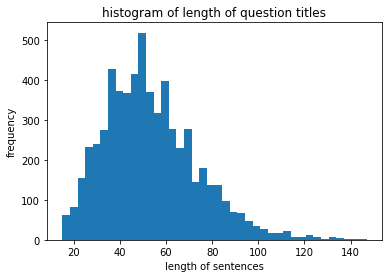

In [ ]:
# histogram of length of question titles
plt.hist(length, bins=40)
plt.title('histogram of length of question titles')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [ ]:
# statistical description of length of question titles
pd.Series(length).describe()

count    6079.000000
mean       53.310248
std        20.205065
min        15.000000
25%        39.000000
50%        50.000000
75%        65.000000
max       147.000000
Name: question_title, dtype: float64

In [ ]:
# Test data

In [ ]:
test['question_title'].head()

0    Will leaving corpses lying around upset my pri...
1           Url link to feature image in the portfolio
2    Is accuracy, recoil or bullet spread affected ...
3       Suddenly got an I/O error from my external HDD
4    Passenger Name - Flight Booking Passenger only...
Name: question_title, dtype: object

In [ ]:
length = test['question_title'].apply(lambda x:len(x))

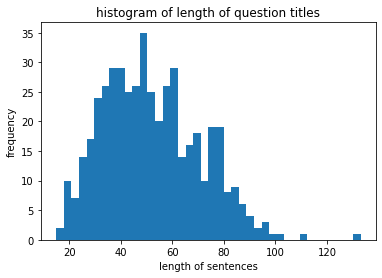

In [ ]:
# histogram of length of question titles
plt.hist(length, bins=40)
plt.title('histogram of length of question titles')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [ ]:
# statistical description of length of question titles
pd.Series(length).describe()

count    476.000000
mean      52.027311
std       18.754965
min       15.000000
25%       37.750000
50%       50.000000
75%       64.250000
max      133.000000
Name: question_title, dtype: float64

#### Question body

In [ ]:
# this is another and the main text feature that represents the full description of the question asked
train['question_body'].head()

0    After playing around with macro photography on...
1    I am trying to understand what kinds of places...
2    I'm working on a PCB that has through-hole com...
3    An affidavit, from what i understand, is basic...
4    I am trying to make a binary image. I want mor...
Name: question_body, dtype: object

In [ ]:
# Lets check the length of the questions body
length = train['question_body'].apply(lambda x:len(x))

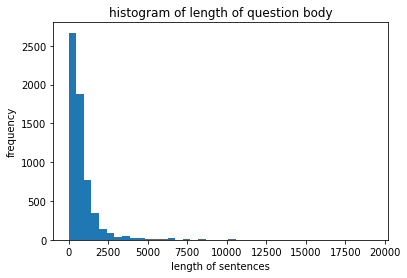

In [ ]:
# let's plot the histogram of length of question body
plt.hist(length, bins=40)
plt.title('histogram of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [ ]:
# Statistical description of questions body length
pd.Series(length).describe()

count     6079.000000
mean       833.760487
std       1029.046986
min          1.000000
25%        323.000000
50%        544.000000
75%        969.500000
max      19253.000000
Name: question_body, dtype: float64

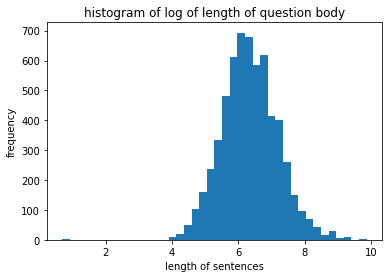

In [ ]:
# Since the distribution of lengths is power-law, let's convert it to normal using log(1+x)
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [ ]:
### Test data

In [ ]:
test['question_body'].head()

0    I see questions/information online about how t...
1    I am new to Wordpress. i have issue with Featu...
2    To experiment I started a bot game, toggled in...
3    I have used my Raspberry Pi as a torrent-serve...
4    I have bought Delhi-London return flights for ...
Name: question_body, dtype: object

In [ ]:
# length of question in test data
length = test['question_body'].apply(lambda x:len(x))

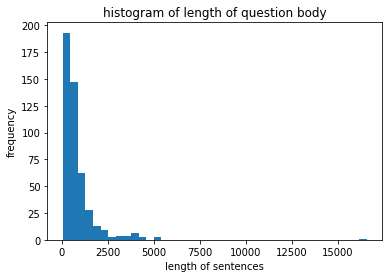

In [ ]:
# histogram of length of question body
plt.hist(length, bins=40)
plt.title('histogram of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [ ]:
# statisrical description of the lengths
pd.Series(length).describe()

count      476.000000
mean       844.462185
std       1110.742440
min         37.000000
25%        302.500000
50%        547.000000
75%        993.000000
max      16563.000000
Name: question_body, dtype: float64

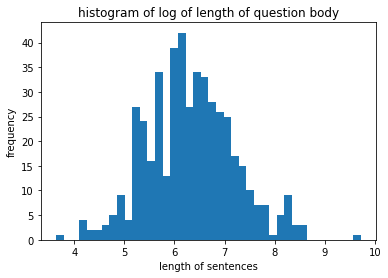

In [ ]:
# Converting teh power-law distributed lengths to gaussian
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

#### Question user name, Question user page, Answer user name, Answer user page
#### (these are irrelevant features so I have not done EDA for them)

In [ ]:
train['question_user_name'].head()

0             ysap
1    russellpierce
2        Joe Baker
3       Scimonster
4          leigero
Name: question_user_name, dtype: object

In [ ]:
train['question_user_page'].head()

0           https://photo.stackexchange.com/users/1024
1             https://rpg.stackexchange.com/users/8774
2    https://electronics.stackexchange.com/users/10157
3         https://judaism.stackexchange.com/users/5151
4    https://graphicdesign.stackexchange.com/users/...
Name: question_user_page, dtype: object

In [ ]:
train['answer_user_name'].head()

0           rfusca
1     Erik Schmidt
2      Dwayne Reid
3    Y     e     z
4             q2ra
Name: answer_user_name, dtype: object

In [ ]:
train['answer_user_page'].head()

0           https://photo.stackexchange.com/users/1917
1             https://rpg.stackexchange.com/users/1871
2    https://electronics.stackexchange.com/users/64754
3         https://judaism.stackexchange.com/users/4794
4    https://graphicdesign.stackexchange.com/users/...
Name: answer_user_page, dtype: object

#### Answer

In [ ]:
# Another important text type feature that represents the answers that given to the questions.
train['answer'].head()

0    I just got extension tubes, so here's the skin...
1    It might be helpful to look into the definitio...
2    Do you even need grooves?  We make several pro...
3    Sending an "affidavit" it is a dispute between...
4    Check out Image Trace in Adobe Illustrator. \n...
Name: answer, dtype: object

In [ ]:
# Length of answers
length = train['answer'].apply(lambda x:len(x))

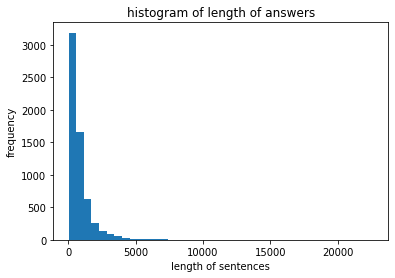

In [ ]:
# histogram of length of answers
plt.hist(length, bins=40)
plt.title('histogram of length of answers')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [ ]:
# statistical description of the length of answers
pd.Series(length).describe()

count     6079.000000
mean       839.396776
std       1017.388923
min         21.000000
25%        297.000000
50%        556.000000
75%       1015.500000
max      22636.000000
Name: answer, dtype: float64

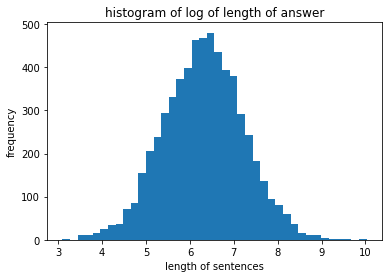

In [ ]:
# histogram of log of length of answers to get them to normal distribution
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of answer')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [ ]:
### Test data

In [ ]:
test['answer'].head()

0    There is no consequence for leaving corpses an...
1    I think it is possible with custom fields.\n\n...
2    You do not have armour in the screenshots. Thi...
3    Your Western Digital hard drive is disappearin...
4    I called two persons who work for Saudia (tick...
Name: answer, dtype: object

In [ ]:
length = test['answer'].apply(lambda x:len(x))

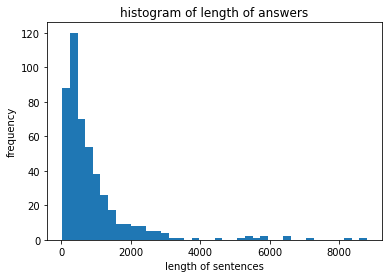

In [ ]:
plt.hist(length, bins=40)
plt.title('histogram of length of answers')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [ ]:
pd.Series(length).describe()

count     476.000000
mean      901.350840
std      1099.588287
min        36.000000
25%       311.000000
50%       566.000000
75%      1066.500000
max      8797.000000
Name: answer, dtype: float64

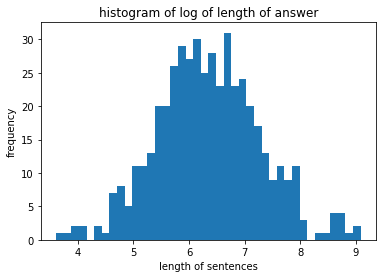

In [ ]:
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of answer')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

#### URL

In [ ]:
# this feature holds the webpage url's of the questions and answers

In [ ]:
train['url'].head()

0    http://photo.stackexchange.com/questions/9169/...
1    http://rpg.stackexchange.com/questions/47820/w...
2    http://electronics.stackexchange.com/questions...
3    http://judaism.stackexchange.com/questions/551...
4    http://graphicdesign.stackexchange.com/questio...
Name: url, dtype: object

In [ ]:
train['url'].value_counts()

http://stats.stackexchange.com/questions/125/what-is-the-best-introductory-bayesian-statistics-textbook                  12
http://programmers.stackexchange.com/questions/136987/what-does-mathematics-have-to-do-with-programming                  11
http://programmers.stackexchange.com/questions/31567/important-non-technical-course-for-programmers                      11
http://gamedev.stackexchange.com/questions/55558/how-to-prevent-the-too-awesome-to-use-syndrome                           9
http://programmers.stackexchange.com/questions/101528/how-do-i-deal-with-a-slow-and-undedicated-colleague-in-the-team     7
                                                                                                                         ..
http://apple.stackexchange.com/questions/44555/is-there-a-list-of-punctuation-commands-for-ipad-dictation                 1
http://anime.stackexchange.com/questions/2084/how-does-yuka-stealing-narumis-alice-take-away-his-ability-to-love          1
http://s

#### Category

In [ ]:
# This feature represents the category that the question answer pair belong to.
train['category'].head()

0    LIFE_ARTS
1      CULTURE
2      SCIENCE
3      CULTURE
4    LIFE_ARTS
Name: category, dtype: object

In [ ]:
train['category'].describe()

count           6079
unique             5
top       TECHNOLOGY
freq            2441
Name: category, dtype: object

In [ ]:
# There are 5 categories
train['category'].value_counts()

TECHNOLOGY       2441
STACKOVERFLOW    1253
CULTURE           963
SCIENCE           713
LIFE_ARTS         709
Name: category, dtype: int64

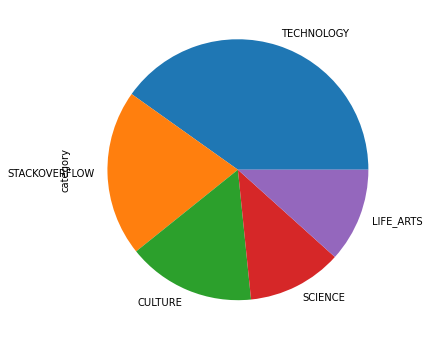

In [ ]:
# this is the proportional distribution of the categories
train['category'].value_counts().plot(kind='pie', figsize=(6,6))
plt.show()

#### Host

In [ ]:
# this feature represents the hostname/website of the question answer pairs
train['host'].head()

0            photo.stackexchange.com
1              rpg.stackexchange.com
2      electronics.stackexchange.com
3          judaism.stackexchange.com
4    graphicdesign.stackexchange.com
Name: host, dtype: object

In [ ]:
# We can see that there are 63 type of these host names
train.host.value_counts()

stackoverflow.com                      1253
english.stackexchange.com               229
superuser.com                           227
electronics.stackexchange.com           221
serverfault.com                         213
                                       ... 
meta.christianity.stackexchange.com       4
meta.math.stackexchange.com               2
robotics.stackexchange.com                2
meta.askubuntu.com                        2
meta.codereview.stackexchange.com         2
Name: host, Length: 63, dtype: int64

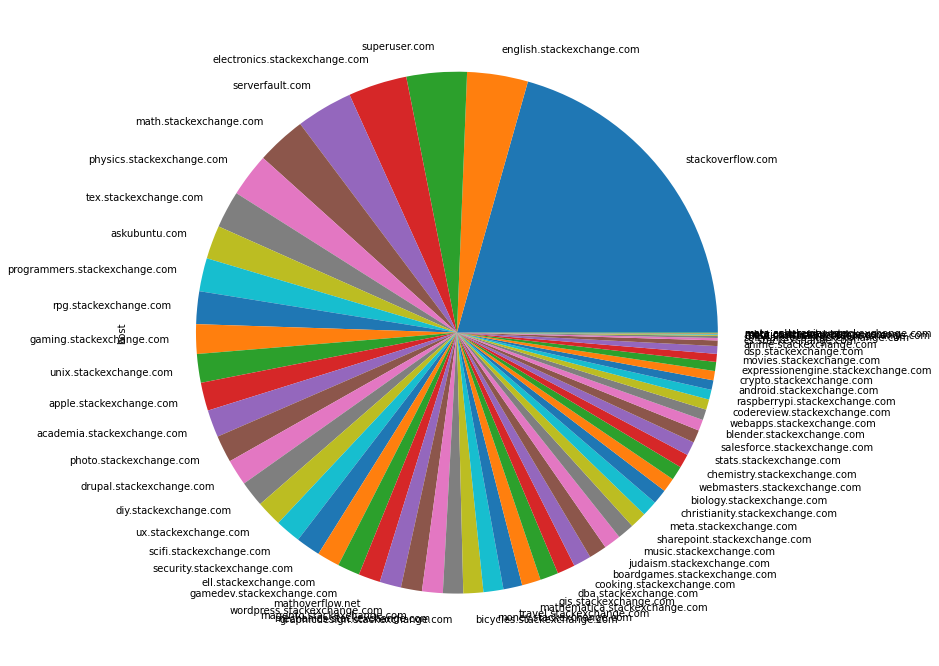

In [ ]:
# pie chart representation of host proportions in train data
train.host.value_counts().plot(kind='pie', figsize=(12,12))
plt.show()

#### labels to be predicted

In [ ]:
# there are 30 labels that we need to predict
train[train.columns[11:]].describe()

question_asker_intent_understanding  ...  answer_well_written
count                          6079.000000  ...          6079.000000
mean                              0.892663  ...             0.908254
std                               0.132047  ...             0.100708
min                               0.333333  ...             0.333333
25%                               0.777778  ...             0.888889
50%                               0.888889  ...             0.888889
75%                               1.000000  ...             1.000000
max                               1.000000  ...             1.000000

[8 rows x 30 columns]

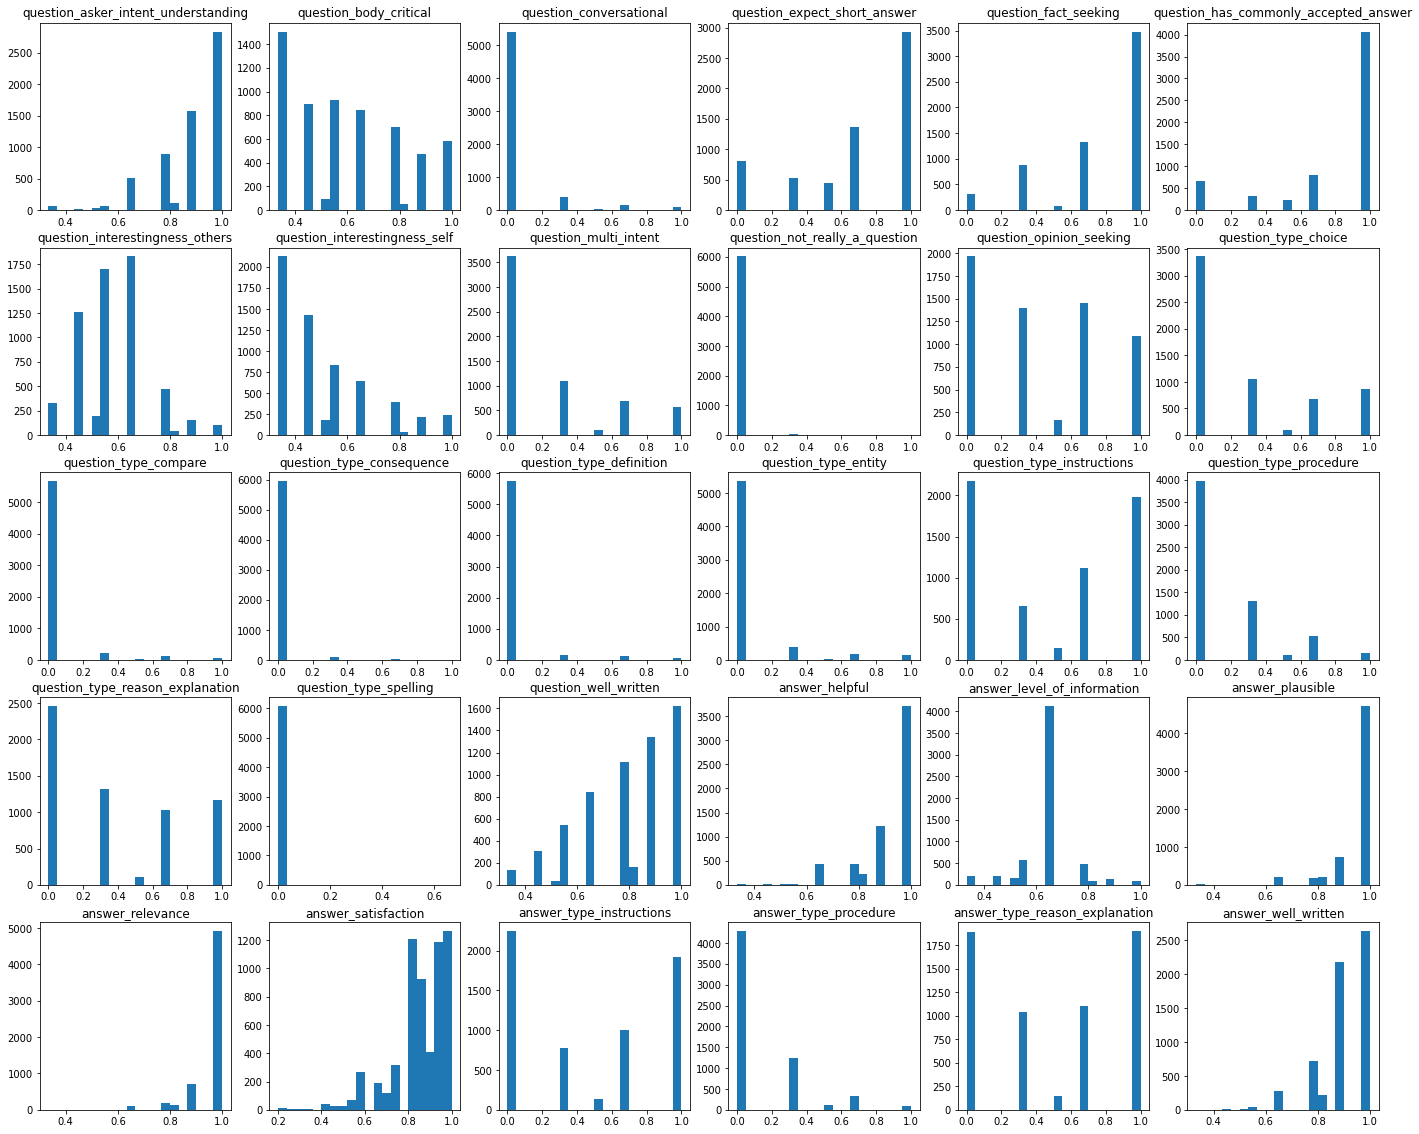

In [ ]:
# histograms of the target labels
f,ax = plt.subplots(5,6, figsize=(24,20))
for i,label in enumerate(train.columns[11:]):
  plt.subplot(5,6,i+1)
  plt.hist(train[label], bins=20)
  plt.title(label)

plt.show()

In [ ]:
train.shape

(6079, 41)

## Data preparation

#### Performing train test split.

In [ ]:
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [ ]:
y = train[train.columns[11:]]

In [ ]:
from urllib.parse import urlparse
import re
from sklearn.preprocessing import OneHotEncoder

find = re.compile(r"^[^.]*")
train['clean_url'] = train['url'].apply(lambda x: re.findall(find, urlparse(x).netloc)[0])
test['clean_url'] = test['url'].apply(lambda x: re.findall(find, urlparse(x).netloc)[0])

In [ ]:
X = train[['question_title', 'question_body', 'answer', 'clean_url', 'category']]
X_test = test[['question_title', 'question_body', 'answer', 'clean_url', 'category']]

In [ ]:
#clean data
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

mispell_dict = {"aren't" : "are not",
                "can't" : "cannot",
                "couldn't" : "could not",
                "couldnt" : "could not",
                "didn't" : "did not",
                "doesn't" : "does not",
                "doesnt" : "does not",
                "don't" : "do not",
                "hadn't" : "had not",
                "hasn't" : "has not",
                "haven't" : "have not",
                "havent" : "have not",
                "he'd" : "he would",
                "he'll" : "he will",
                "he's" : "he is",
                "i'd" : "I would",
                "i'd" : "I had",
                "i'll" : "I will",
                "i'm" : "I am",
                "isn't" : "is not",
                "it's" : "it is",
                "it'll":"it will",
                "i've" : "I have",
                "let's" : "let us",
                "mightn't" : "might not",
                "mustn't" : "must not",
                "shan't" : "shall not",
                "she'd" : "she would",
                "she'll" : "she will",
                "she's" : "she is",
                "shouldn't" : "should not",
                "shouldnt" : "should not",
                "that's" : "that is",
                "thats" : "that is",
                "there's" : "there is",
                "theres" : "there is",
                "they'd" : "they would",
                "they'll" : "they will",
                "they're" : "they are",
                "theyre":  "they are",
                "they've" : "they have",
                "we'd" : "we would",
                "we're" : "we are",
                "weren't" : "were not",
                "we've" : "we have",
                "what'll" : "what will",
                "what're" : "what are",
                "what's" : "what is",
                "what've" : "what have",
                "where's" : "where is",
                "who'd" : "who would",
                "who'll" : "who will",
                "who're" : "who are",
                "who's" : "who is",
                "who've" : "who have",
                "won't" : "will not",
                "wouldn't" : "would not",
                "you'd" : "you would",
                "you'll" : "you will",
                "you're" : "you are",
                "you've" : "you have",
                "'re": " are",
                "wasn't": "was not",
                "we'll":" will",
                "didn't": "did not",
                "tryin'":"trying"
                }


def clean_text(x):
    x = str(x).replace("\n","")
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
    return x


def clean_numbers(x):
    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x


def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re


def replace_typical_misspell(text):
    mispellings, mispellings_re = _get_mispell(mispell_dict)

    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)


def clean_data(df, columns: list):
    for col in tqdm(columns):
        df[col] = df[col].apply(lambda x: re.sub(' +', ' ', x)).values
        df[col] = df[col].apply(lambda x: re.sub('\n', '', x)).values
        df[col] = df[col].apply(lambda x: clean_numbers(x)).values
        df[col] = df[col].apply(lambda x: clean_text(x.lower())).values
        df[col] = df[col].apply(lambda x: replace_typical_misspell(x)).values
        df[col] = df[col].apply(lambda x: x.lower()).values

    return df

In [ ]:
text_features = ['question_title', 'question_body', 'answer']
cleaned_X = clean_data(X, text_features)
cleaned_test = clean_data(X_test, text_features)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
cleaned_test.head()

question_title  ...    category
0  will leaving corpses lying around upset my pri...  ...     CULTURE
1         url link to feature image in the portfolio  ...  TECHNOLOGY
2  is accuracy ,  recoil or bullet spread affecte...  ...     CULTURE
3   suddenly got an i / o error from my external hdd  ...  TECHNOLOGY
4  passenger name  -  flight booking passenger on...  ...     CULTURE

[5 rows x 5 columns]

In [ ]:
# train and cv split
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(cleaned_X, y, test_size=0.001, random_state=42)

In [ ]:
features = ['clean_url', 'category']

ohe = OneHotEncoder()
ohe.fit(X_train[features])
categorical_features_train = ohe.transform(X_train[features]).todense()
categorical_features_cv = ohe.transform(X_cv[features]).todense()
categorical_features_test = ohe.transform(X_test[features]).todense()

In [ ]:
# Let's check the length of question title in last 10 percentiles
print('length of question title in last 10 percentiles')
x = pd.Series([len(x.split(' ')) for x in X_train['question_title']])
for i in range(90,100):
  print(f'{i}% --> {x.quantile(i/100)}')

length of question title in last 10 percentiles
90% --> 20.0
91% --> 21.0
92% --> 21.0
93% --> 22.0
94% --> 23.0
95% --> 24.0
96% --> 25.0
97% --> 27.0
98% --> 30.0
99% --> 34.0


In [ ]:
# I'll be choosing the max_length_title as 20 since 98% points have a length less than = 30 words
max_length_title = 30

In [ ]:
# Let's check the length of question body in last 10 percentiles
print('length of question body in last 10 percentiles')
x = pd.Series([len(x.split(' ')) for x in X_train['question_body']])
for i in range(90,100):
  print(f'{i}% --> {x.quantile(i/100)}')

length of question body in last 10 percentiles
90% --> 512.9000000000005
91% --> 564.0
92% --> 603.6400000000012
93% --> 665.2100000000046
94% --> 741.0
95% --> 836.0
96% --> 946.0
97% --> 1164.3499999999995
98% --> 1311.1599999999999
99% --> 2074.0


In [ ]:
# I'll be choosing the max_length_body as 1000 since 96% points have a length less than 1000 words
max_length_body = 1000

In [ ]:
# Let's check the length of answer in last 10 percentiles
print('length of answer in last 10 percentiles')
x = pd.Series([len(x.split(' ')) for x in X_train['answer']])
for i in range(90,100):
  print(f'{i}% --> {x.quantile(i/100)}')

length of answer in last 10 percentiles
90% --> 493.90000000000055
91% --> 522.6100000000006
92% --> 559.0
93% --> 612.1200000000026
94% --> 660.0
95% --> 732.8999999999996
96% --> 809.1599999999999
97% --> 919.7399999999998
98% --> 1128.0599999999995
99% --> 1463.3199999999997


In [ ]:
# I'll be choosing the max_length_body as 1000 since 97% points have a length less than 1000 words
max_length_answer = 1000

In [ ]:
# Downloading GloVe data
import os
if 'glove.6B.zip' not in os.listdir():
  !cp './drive/My Drive/glove.6B.zip' './'
  !unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from tqdm.notebook import tqdm
embeddings_index = dict()
f = open('glove.6B.300d.txt')
for line in tqdm(f):
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


#### Let's prepare question title first

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^`_{|}~\t\n', lower=True,
                      split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(X_train['question_title'].values)

In [ ]:
train_title = tokenizer.texts_to_sequences(X_train['question_title'].values)
cv_title = tokenizer.texts_to_sequences(X_cv['question_title'].values)
test_title = tokenizer.texts_to_sequences(X_test['question_title'].values)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_title = pad_sequences(train_title, maxlen=max_length_title, padding='post', value=0)
cv_title = pad_sequences(cv_title, maxlen=max_length_title, padding='post', value=0)
test_title = pad_sequences(test_title, maxlen=max_length_title, padding='post', value=0)

In [ ]:
title_vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_title = np.zeros((title_vocab_size, 300))
for word, i in tqdm(tokenizer.word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix_title[i] = embedding_vector

#### Let's prepare question body now

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^`_{|}~\t\n', lower=True,
                      split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(X_train['question_body'].values)

In [ ]:
train_body = tokenizer.texts_to_sequences(X_train['question_body'].values)
cv_body = tokenizer.texts_to_sequences(X_cv['question_body'].values)
test_body = tokenizer.texts_to_sequences(X_test['question_body'].values)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_body = pad_sequences(train_body, maxlen=max_length_body, padding='post', value=0)
cv_body = pad_sequences(cv_body, maxlen=max_length_body, padding='post', value=0)
test_body = pad_sequences(test_body, maxlen=max_length_body, padding='post', value=0)

In [ ]:
body_vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_body = np.zeros((body_vocab_size, 300))
for word, i in tqdm(tokenizer.word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix_body[i] = embedding_vector

#### Answers

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^`_{|}~\t\n', lower=True,
                      split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(X_train['answer'].values)

In [ ]:
train_answer = tokenizer.texts_to_sequences(X_train['answer'].values)
cv_answer = tokenizer.texts_to_sequences(X_cv['answer'].values)
test_answer = tokenizer.texts_to_sequences(X_test['answer'].values)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_answer = pad_sequences(train_answer, maxlen=max_length_answer, padding='post', value=0)
cv_answer = pad_sequences(cv_answer, maxlen=max_length_answer, padding='post', value=0)
test_answer = pad_sequences(test_answer, maxlen=max_length_answer, padding='post', value=0)

In [ ]:
answer_vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_answer = np.zeros((answer_vocab_size, 300))
for word, i in tqdm(tokenizer.word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix_answer[i] = embedding_vector

In [ ]:
# max_length_answer=300
# max_length_body=300
# max_length_title=14

#### Let's add tfidf vectors also

In [ ]:
text_train = []
text_cv = []
text_test = []
for row in X_train[['question_title', 'question_body', 'answer']].values:
  text_train.append(' '.join(row))
for row in X_cv[['question_title', 'question_body', 'answer']].values:
  text_cv.append(' '.join(row))
for row in X_test[['question_title', 'question_body', 'answer']].values:
  text_test.append(' '.join(row))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(2,5), max_features=70000)
train_tfidf = tfidf.fit_transform(text_train)
cv_tfidf = tfidf.transform(text_cv)
test_tfidf = tfidf.transform(text_test)

In [ ]:
train_tfidf.shape, cv_tfidf.shape

((6072, 70000), (7, 70000))

#### Modeling

#### I'll begin with a simple model that uses GLoVE embeddings, GRU and a Dense layer to predict the values.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, GRU, Input, Embedding, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras import backend as K
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from tensorflow.keras import regularizers

In [ ]:
#### Model_2
K.clear_session()

title_input = Input(max_length_title, name="title", dtype='float64')
title_embedding = Embedding(title_vocab_size, 300, weights=[embedding_matrix_title],
                            input_length=max_length_title, trainable=False)(title_input)
# title_embedding_flatten = Flatten()(title_embedding)
################################################
body_input = Input(max_length_body, name="body", dtype='float64')
body_embedding = Embedding(body_vocab_size, 300, weights=[embedding_matrix_body],
                            input_length=max_length_body, trainable=False)(body_input)
# body_embedding_flatten = Flatten()(body_embedding)
################################################
answer_input = Input(max_length_answer, name="answer", dtype='float64')
answer_embedding = Embedding(answer_vocab_size, 300, weights=[embedding_matrix_answer],
                            input_length=max_length_answer, trainable=False)(answer_input)
# answer_embedding_flatten = Flatten()(answer_embedding)

concat_layer = concatenate([title_embedding, body_embedding, answer_embedding], axis=1)

gru_layer = CuDNNGRU(units=256, return_sequences=True, return_state=False)(concat_layer)
print(gru_layer.shape)
gap_layer = GlobalAveragePooling1D()(gru_layer)
# avg_hidden = Flatten()(gru_layer)
print(gap_layer.shape)
################################################
dense_1 = Dense(64, activation='selu')(gap_layer)
dense_2 = Dense(30, activation='sigmoid')(dense_1)

model = Model(inputs=[title_input, body_input, answer_input], outputs=[dense_2])

(None, 2030, 256)
(None, 256)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 30)]         0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, 1000)]       0                                            
__________________________________________________________________________________________________
answer (InputLayer)             [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 300)      2156400     title[0][0]                      
______________________________________________________________________________________________

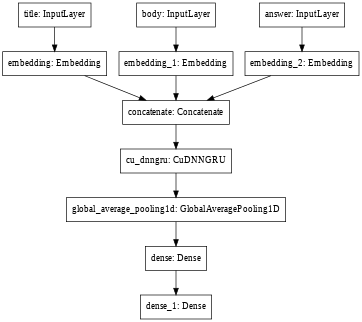

In [ ]:
tf.keras.utils.plot_model(
 model,
 to_file='model.png',
 show_shapes=False,
 show_layer_names=True,
 rankdir='TB',
 expand_nested=False,
 dpi=48
)

In [ ]:
from scipy.stats import spearmanr
def compute_spearmanr_ignore_nan(trues, preds):
    rhos = []
    for tcol, pcol in zip(np.transpose(trues), np.transpose(preds)):
        rhos.append(spearmanr(tcol, pcol).correlation)
    return np.nanmean(rhos)

In [ ]:
def rhos(y, y_pred):
  return tf.py_function(compute_spearmanr_ignore_nan, (y, y_pred), tf.double)

In [ ]:
metrics = [rhos]
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1, mode='auto',
                                                 min_delta=0.0001, cooldown=0, min_lr=1e-7)

In [ ]:
input_data = {'title': train_title, 'body': train_body, 'answer': train_answer, 
              'category_input': categorical_features_train, 'tfidf_input': train_tfidf.toarray()}
cv_data = {'title': cv_title, 'body': cv_body, 'answer': cv_answer, 
           'category_input': categorical_features_cv, 'tfidf_input': cv_tfidf.toarray()}

In [ ]:
%reload_ext tensorboard
import datetime
!rm -rf logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [tensorboard_callback]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(input_data, y_train.values, epochs=100, batch_size=32, validation_data=(cv_data, y_cv.values), callbacks=callbacks)

Epoch 1/100
  1/190 [..............................] - ETA: 0s - loss: 0.6938 - rhos: 0.0129

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


190/190 [==============================] - 33s 174ms/step - loss: 0.6808 - rhos: -0.0208 - val_loss: 0.6643 - val_rhos: -0.0311
Epoch 2/100
190/190 [==============================] - 28s 145ms/step - loss: 0.6334 - rhos: -0.0278 - val_loss: 0.5744 - val_rhos: 0.0106
Epoch 3/100
190/190 [==============================] - 28s 147ms/step - loss: 0.4847 - rhos: -0.0122 - val_loss: 0.4454 - val_rhos: 0.0081
Epoch 4/100
190/190 [==============================] - 28s 148ms/step - loss: 0.4379 - rhos: -0.0066 - val_loss: 0.4336 - val_rhos: -0.0166
Epoch 5/100
190/190 [==============================] - 28s 147ms/step - loss: 0.4323 - rhos: 0.0027 - val_loss: 0.4297 - val_rhos: -0.0235
Epoch 6/100
190/190 [==============================] - 28s 148ms/step - loss: 0.4297 - rhos: 0.0190 - val_loss: 0.4279 - val_rhos: 0.0131
Epoch 7/100
190/190 [==============================] - 28s 146ms/step - loss: 0.4280 - rhos: 0.0322 - val_loss: 0.4273 - val_rhos: 0.0301
Epoch 8/100
190/190 [==================

In [ ]:
test_data = {'title': test_title, 'body': test_body, 'answer': test_answer, 
           'category_input': categorical_features_test, 'tfidf_input': test_tfidf.toarray()}

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
columns = y_train.columns
output = pd.DataFrame(y_pred, columns=columns, index=test['qa_id'])
output = output.reset_index()

In [ ]:
output.to_csv('submission_gru.csv', index=False)

In [ ]:
%tensorboard --logdir logs/fit

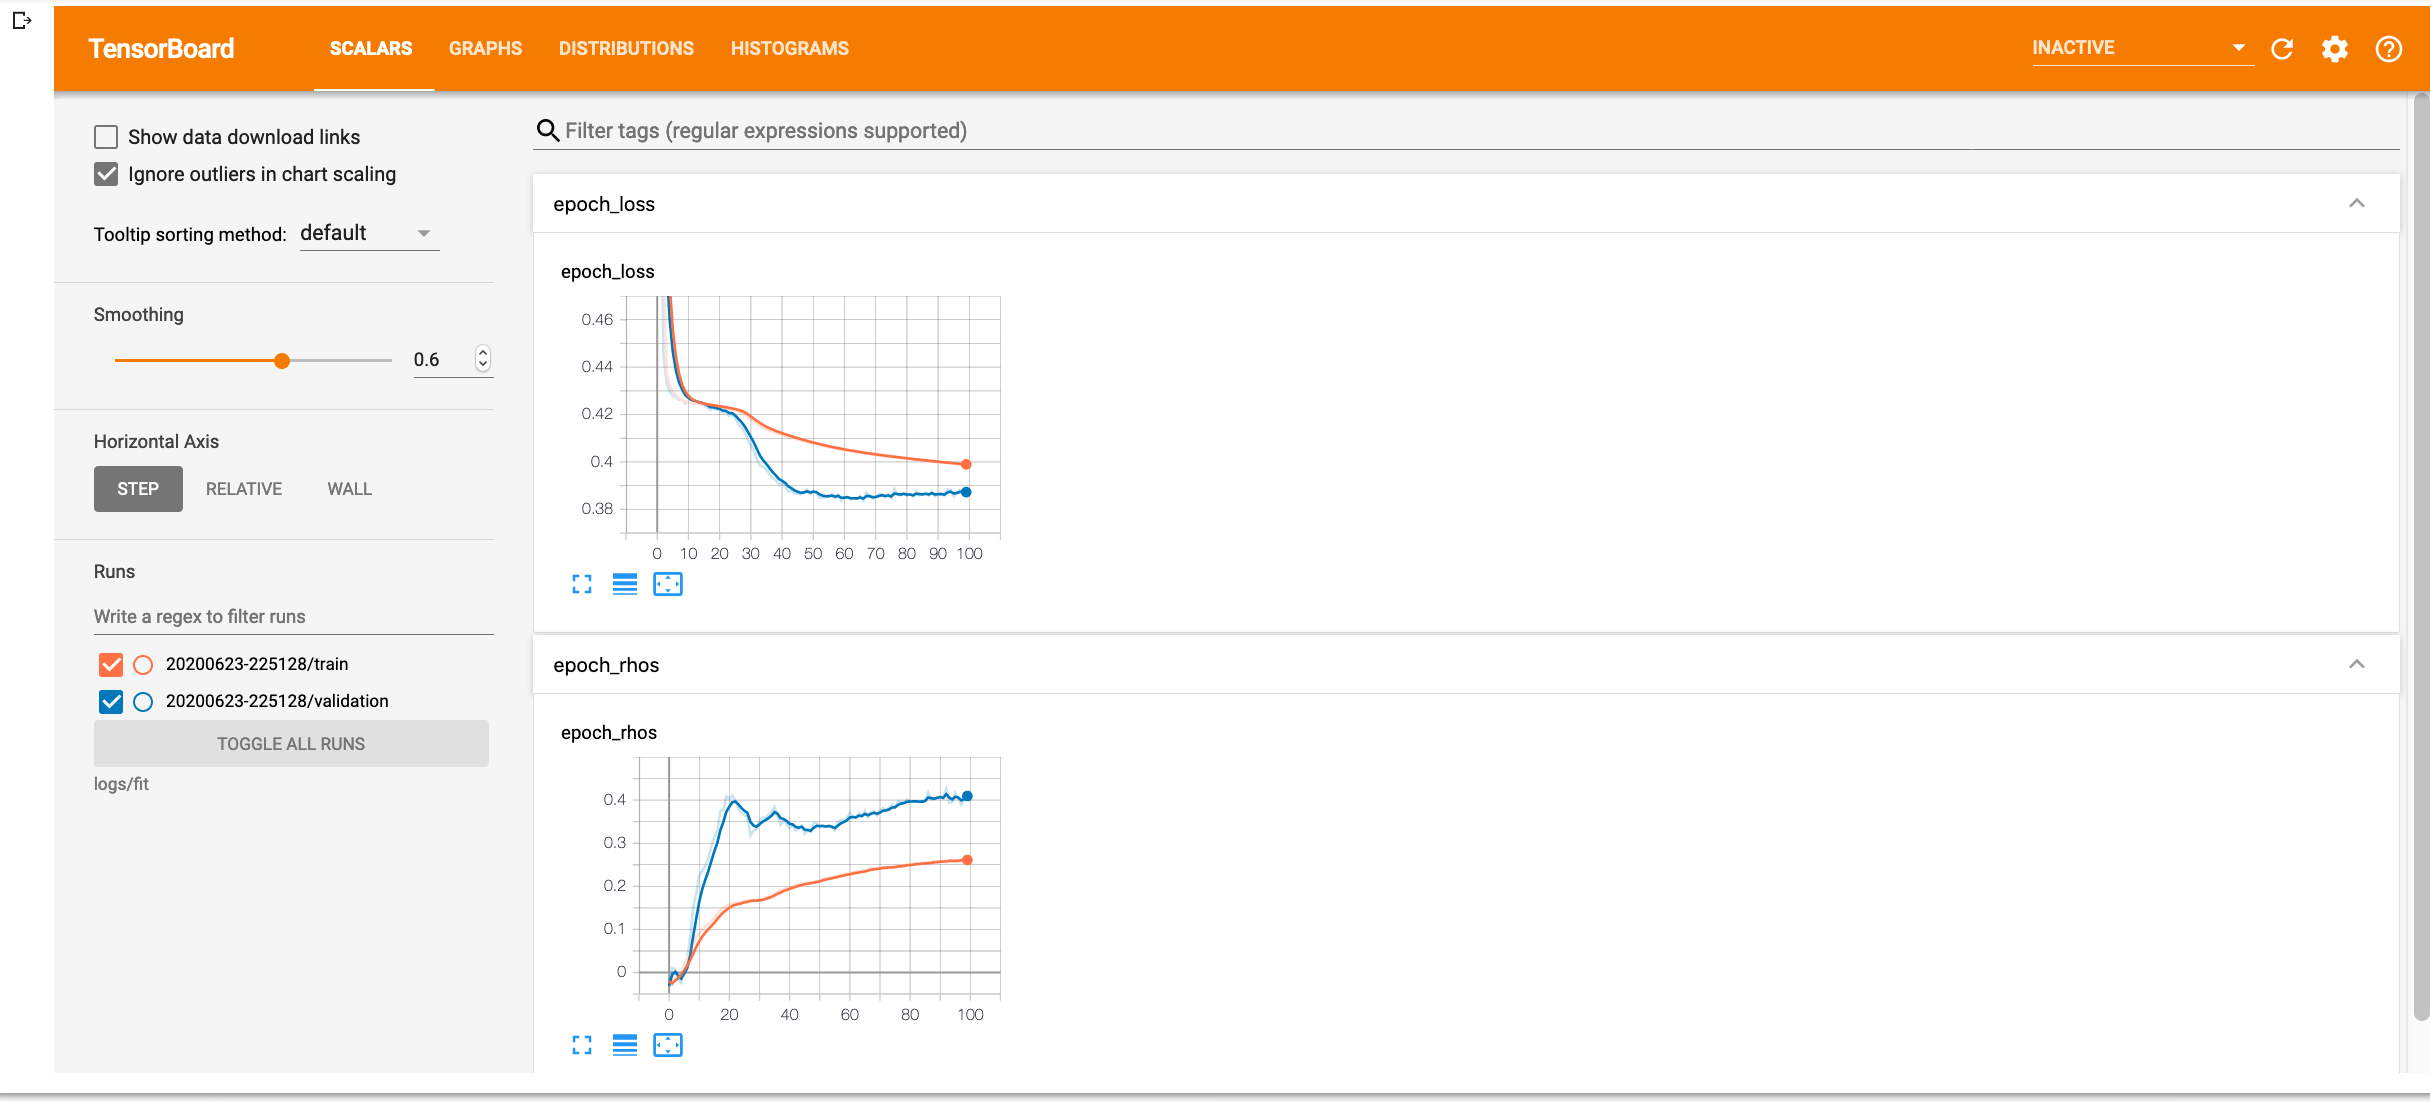

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('1.png', width=920, height=480)

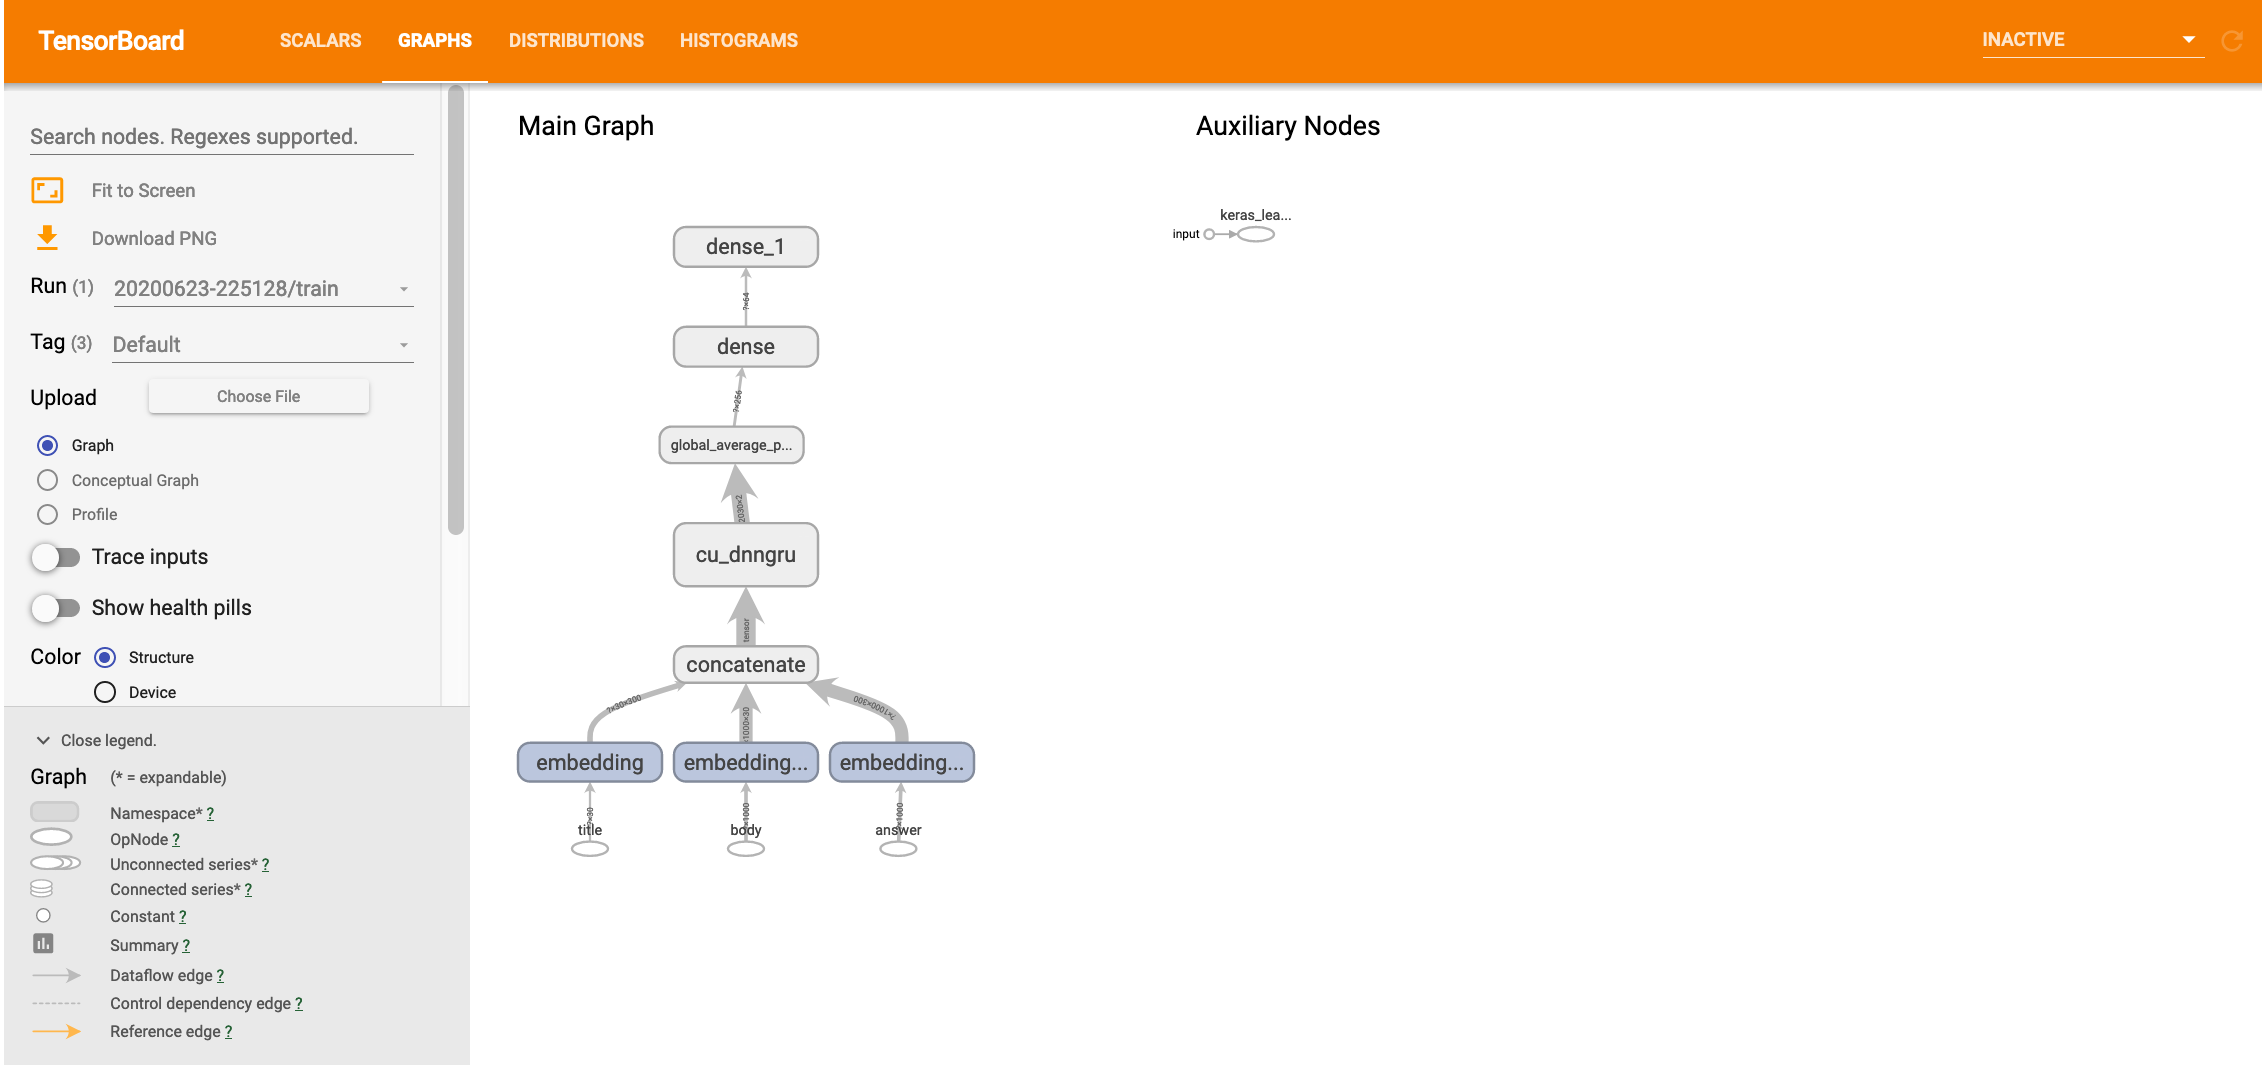

In [ ]:
Image('2.png', width=920, height=480)

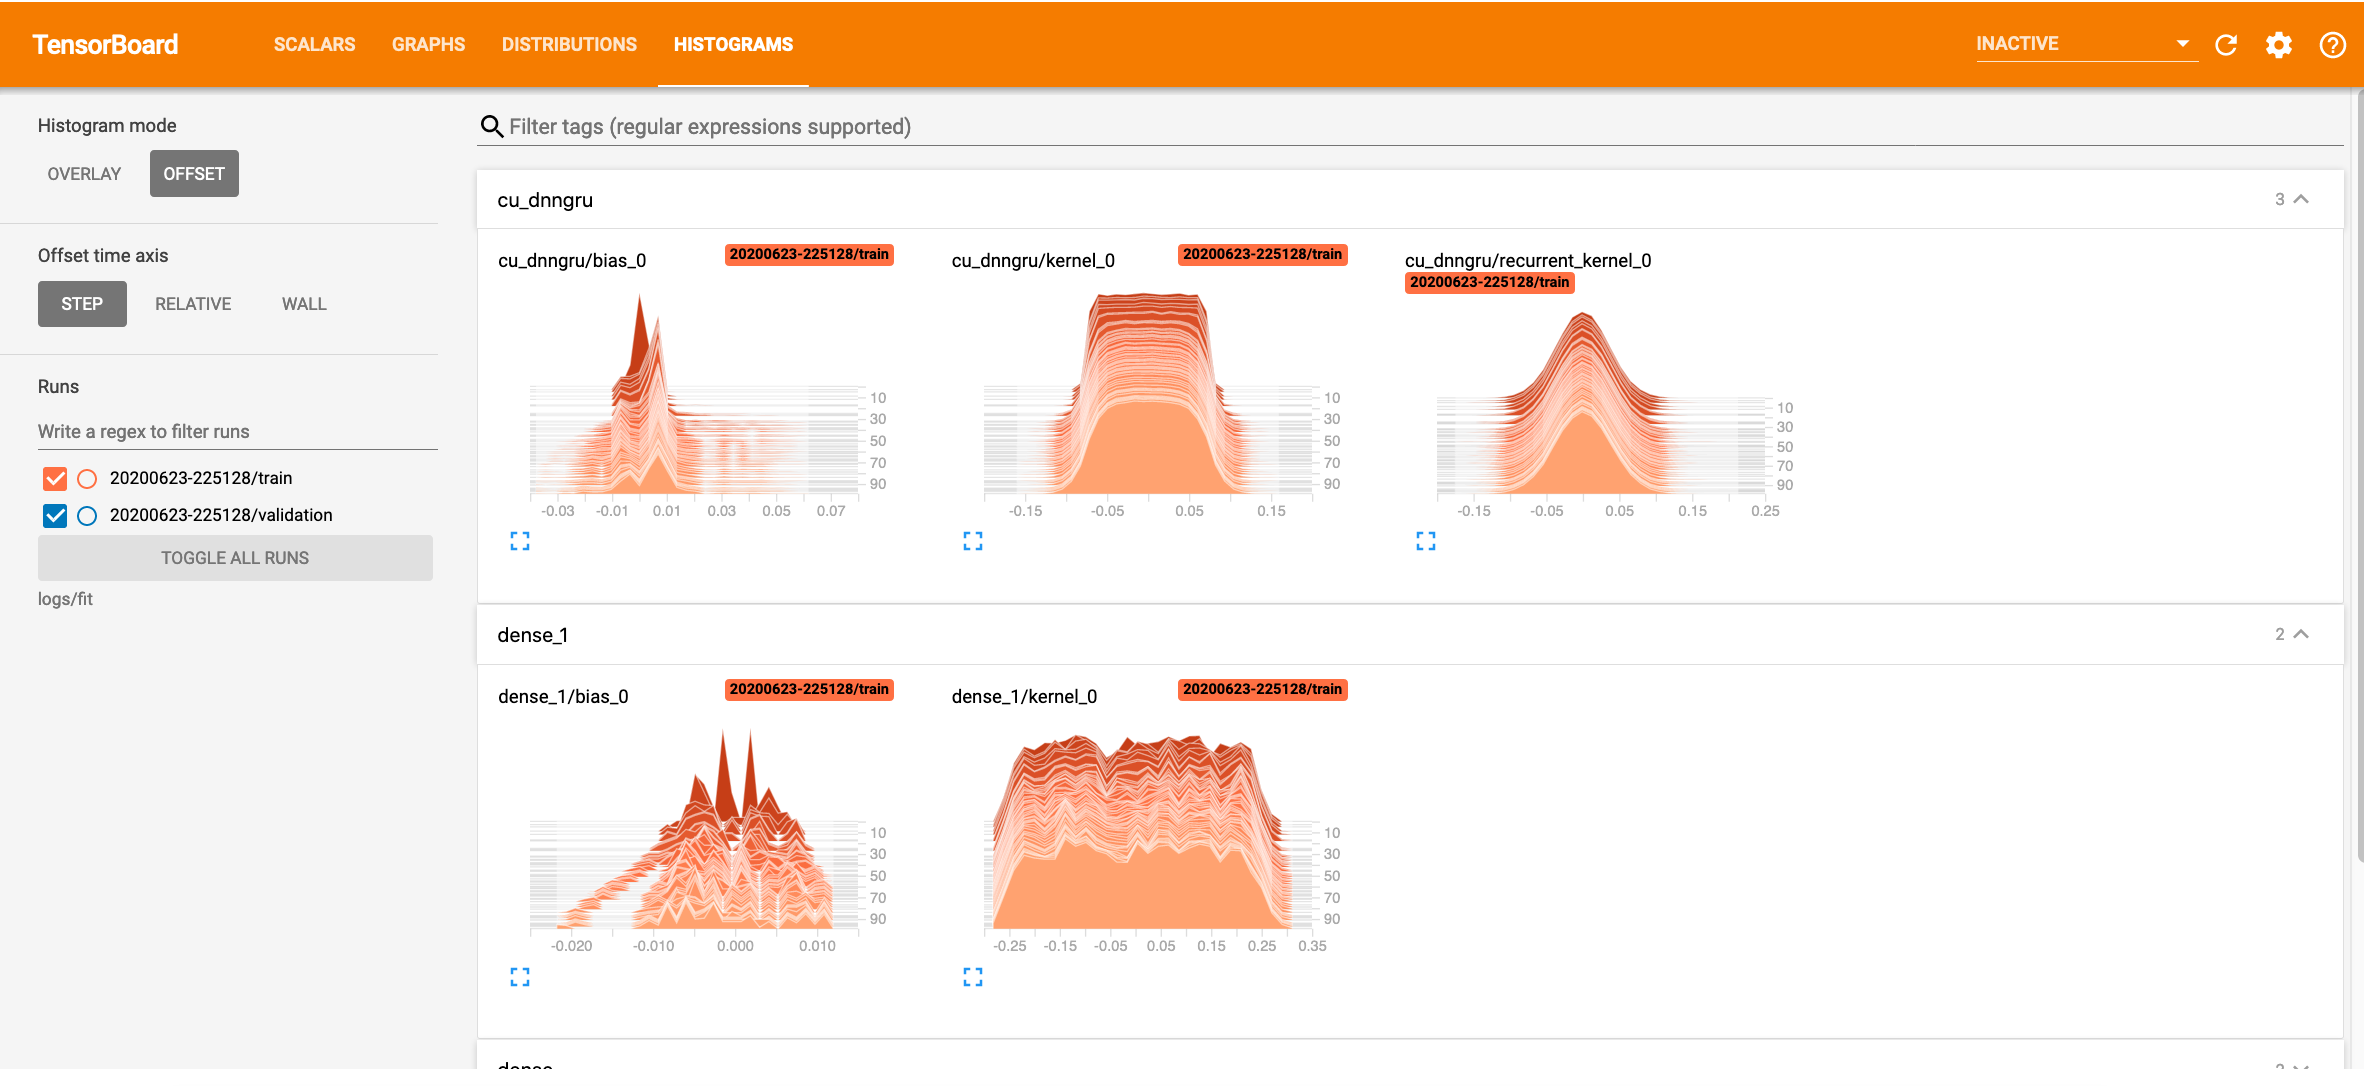

In [ ]:
Image('3.png', width=920, height=480)

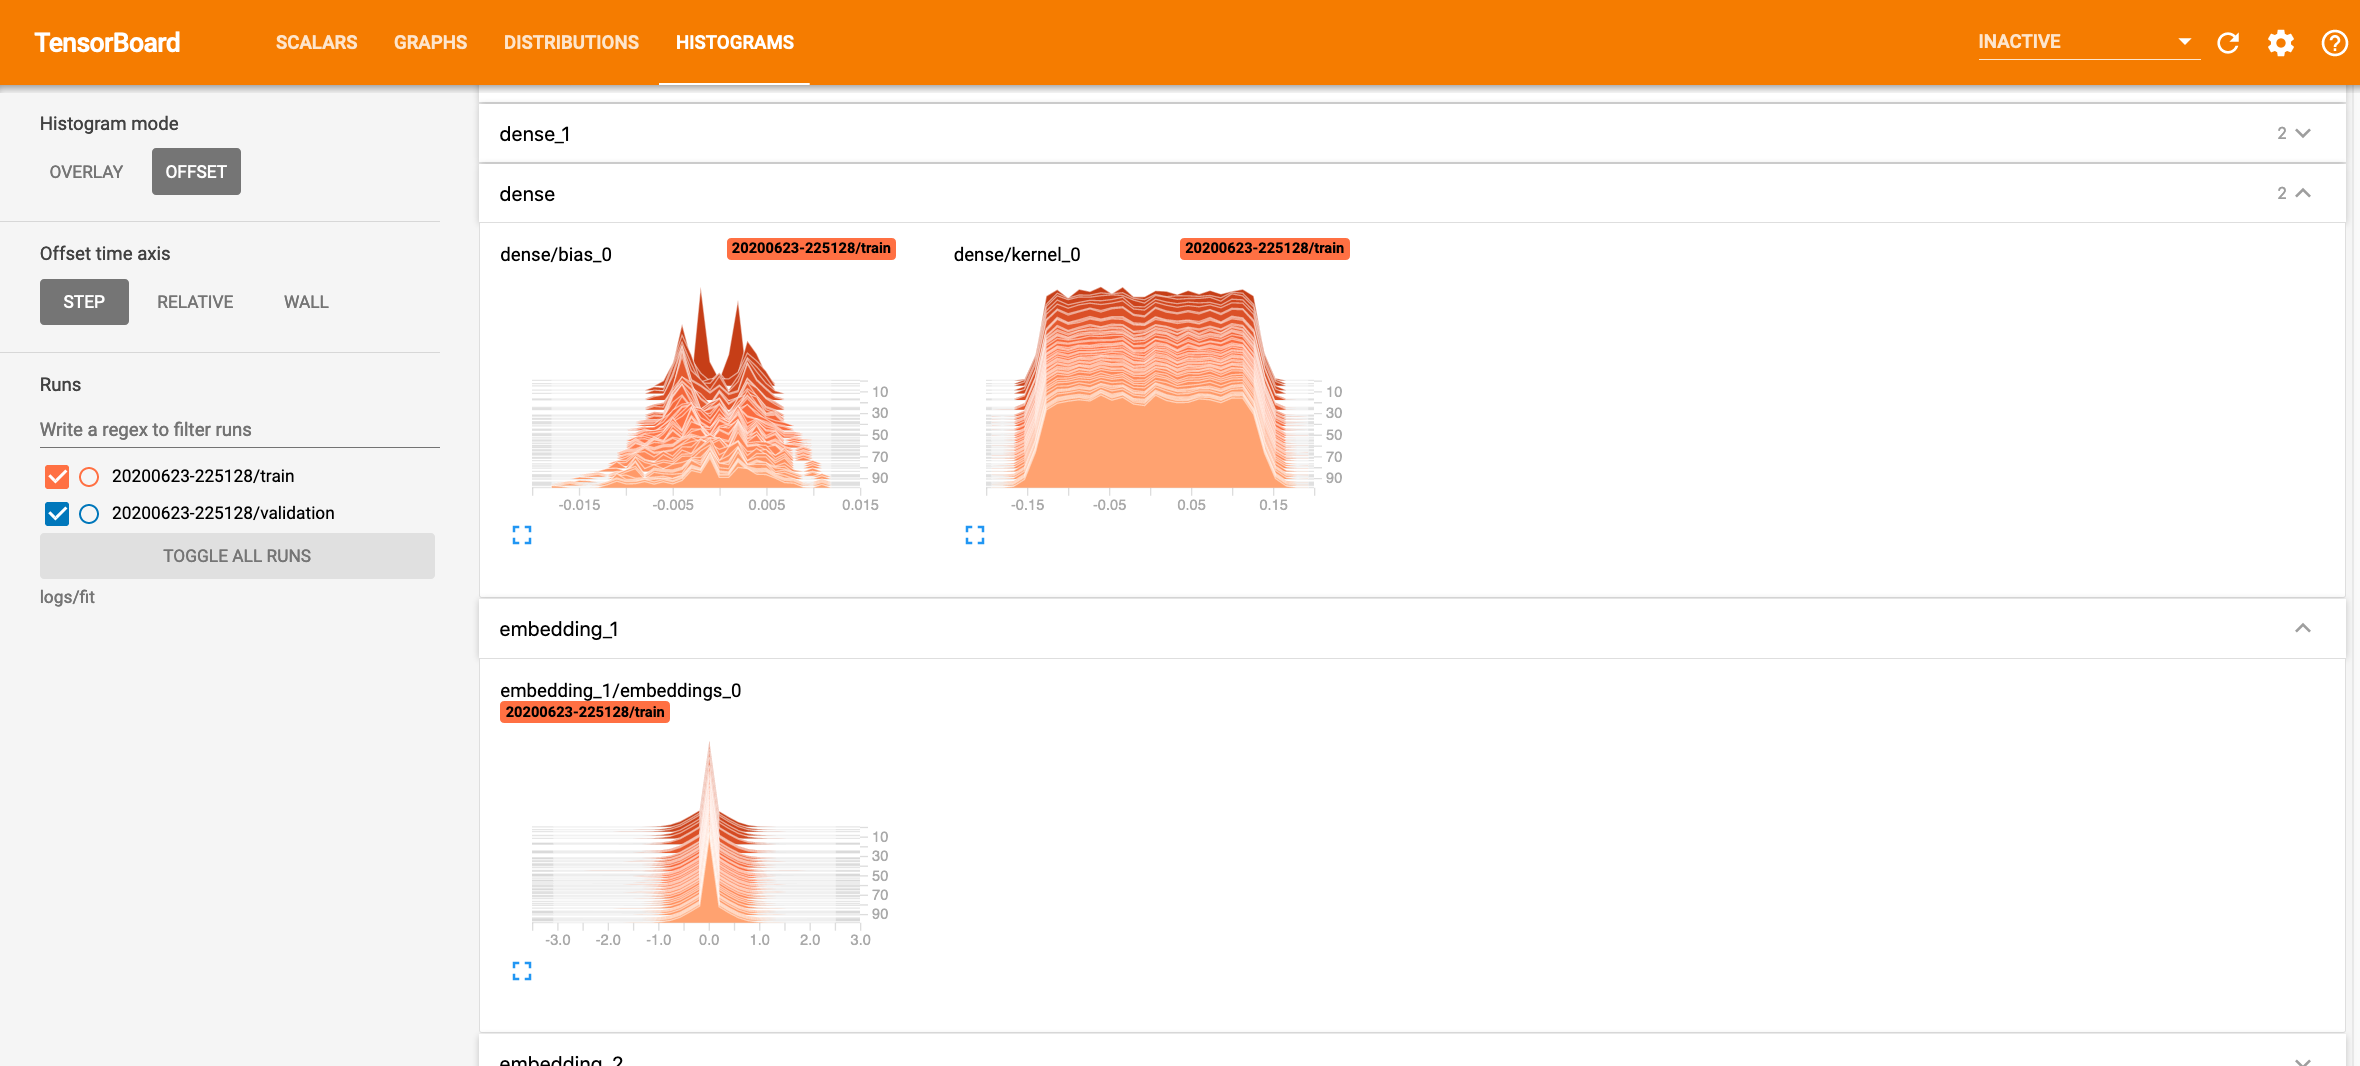

In [ ]:
Image('4.png', width=920, height=480)

##### This was the first dummy model that I used as a baseline, It performed very poorly and resulted with a score 0f 0.2 on Kaggle. (> 0.395 is top 10%)

#### Let's add the categorical and tfidf features also.

In [ ]:
#### Model_2
K.clear_session()

category_input = Input(64, name="category_input", dtype='float64')
dense_category = Dense(32, activation='selu', kernel_initializer='lecun_normal')(category_input)

tfidf_input = Input(train_tfidf.shape[1], name="tfidf_input", dtype='float64')
dense_tfidf = Dense(64, activation='selu')(tfidf_input)

title_input = Input(max_length_title, name="title", dtype='float64')
title_embedding = Embedding(title_vocab_size, 300, weights=[embedding_matrix_title],
                            input_length=max_length_title, trainable=False)(title_input)
title_embedding_flatten = Flatten()(title_embedding)
################################################
body_input = Input(max_length_body, name="body", dtype='float64')
body_embedding = Embedding(body_vocab_size, 300, weights=[embedding_matrix_body],
                            input_length=max_length_body, trainable=False)(body_input)
body_embedding_flatten = Flatten()(body_embedding)
################################################
answer_input = Input(max_length_answer, name="answer", dtype='float64')
answer_embedding = Embedding(answer_vocab_size, 300, weights=[embedding_matrix_answer],
                            input_length=max_length_answer, trainable=False)(answer_input)
answer_embedding_flatten = Flatten()(answer_embedding)

concat_layer = concatenate([title_embedding, body_embedding, answer_embedding], axis=1)

gru_layer = CuDNNGRU(units=16, return_sequences=True, return_state=False)(concat_layer)
avg_hidden = Flatten()(gru_layer)
print(avg_hidden.shape)
################################################
concat_layer_2 = concatenate([avg_hidden, dense_category, dense_tfidf])
# bn = BatchNormalization()(concat_layer_2)
dense_1 = Dense(64, activation='selu', kernel_initializer='lecun_normal', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(concat_layer_2)
# dense_2 = Dense(64, activation='selu', kernel_initializer='lecun_normal')(dense_1)
dense_3 = Dense(30, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(dense_1)

model = Model(inputs=[title_input, body_input, answer_input, category_input, tfidf_input], outputs=[dense_3])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(None, 32480)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 30)]         0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, 1000)]       0                                            
__________________________________________________________________________________________________
answer (InputLayer)             [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 300)      2156400     title[0][0]                      
______________________________________________________________________________________________

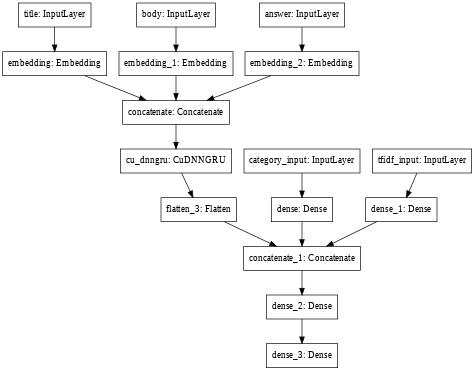

In [ ]:
tf.keras.utils.plot_model(
 model,
 to_file='model.png',
 show_shapes=False,
 show_layer_names=True,
 rankdir='TB',
 expand_nested=False,
 dpi=48
)

In [ ]:
from scipy.stats import spearmanr
def compute_spearmanr_ignore_nan(trues, preds):
    rhos = []
    for tcol, pcol in zip(np.transpose(trues), np.transpose(preds)):
        rhos.append(spearmanr(tcol, pcol).correlation)
    return np.nanmean(rhos)

In [ ]:
def rhos(y, y_pred):
  return tf.py_function(compute_spearmanr_ignore_nan, (y, y_pred), tf.double)

In [ ]:
metrics = [rhos]
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1, mode='auto',
                                                 min_delta=0.0001, cooldown=0, min_lr=1e-7)

In [ ]:
input_data = {'title': train_title, 'body': train_body, 'answer': train_answer, 
              'category_input': categorical_features_train, 'tfidf_input': train_tfidf.toarray()}
cv_data = {'title': cv_title, 'body': cv_body, 'answer': cv_answer, 
           'category_input': categorical_features_cv, 'tfidf_input': cv_tfidf.toarray()}

In [ ]:
%reload_ext tensorboard
import datetime
!rm -rf logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [tensorboard_callback]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(input_data, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/100
  2/152 [..............................] - ETA: 7s - loss: 0.7538 - rhos: 0.0277

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


152/152 [==============================] - 19s 126ms/step - loss: 0.6218 - rhos: 0.0267 - val_loss: 0.5520 - val_rhos: 0.0419
Epoch 2/100
152/152 [==============================] - 18s 117ms/step - loss: 0.5283 - rhos: 0.0490 - val_loss: 0.5132 - val_rhos: 0.0567
Epoch 3/100
152/152 [==============================] - 18s 118ms/step - loss: 0.5061 - rhos: 0.0748 - val_loss: 0.5005 - val_rhos: 0.0809
Epoch 4/100
152/152 [==============================] - 18s 119ms/step - loss: 0.4968 - rhos: 0.1006 - val_loss: 0.4937 - val_rhos: 0.1020
Epoch 5/100
152/152 [==============================] - 18s 118ms/step - loss: 0.4909 - rhos: 0.1277 - val_loss: 0.4889 - val_rhos: 0.1221
Epoch 6/100
152/152 [==============================] - 18s 118ms/step - loss: 0.4864 - rhos: 0.1496 - val_loss: 0.4852 - val_rhos: 0.1388
Epoch 7/100
152/152 [==============================] - 18s 118ms/step - loss: 0.4827 - rhos: 0.1691 - val_loss: 0.4821 - val_rhos: 0.1539
Epoch 8/100
152/152 [=========================

In [ ]:
%tensorboard --logdir logs/fit

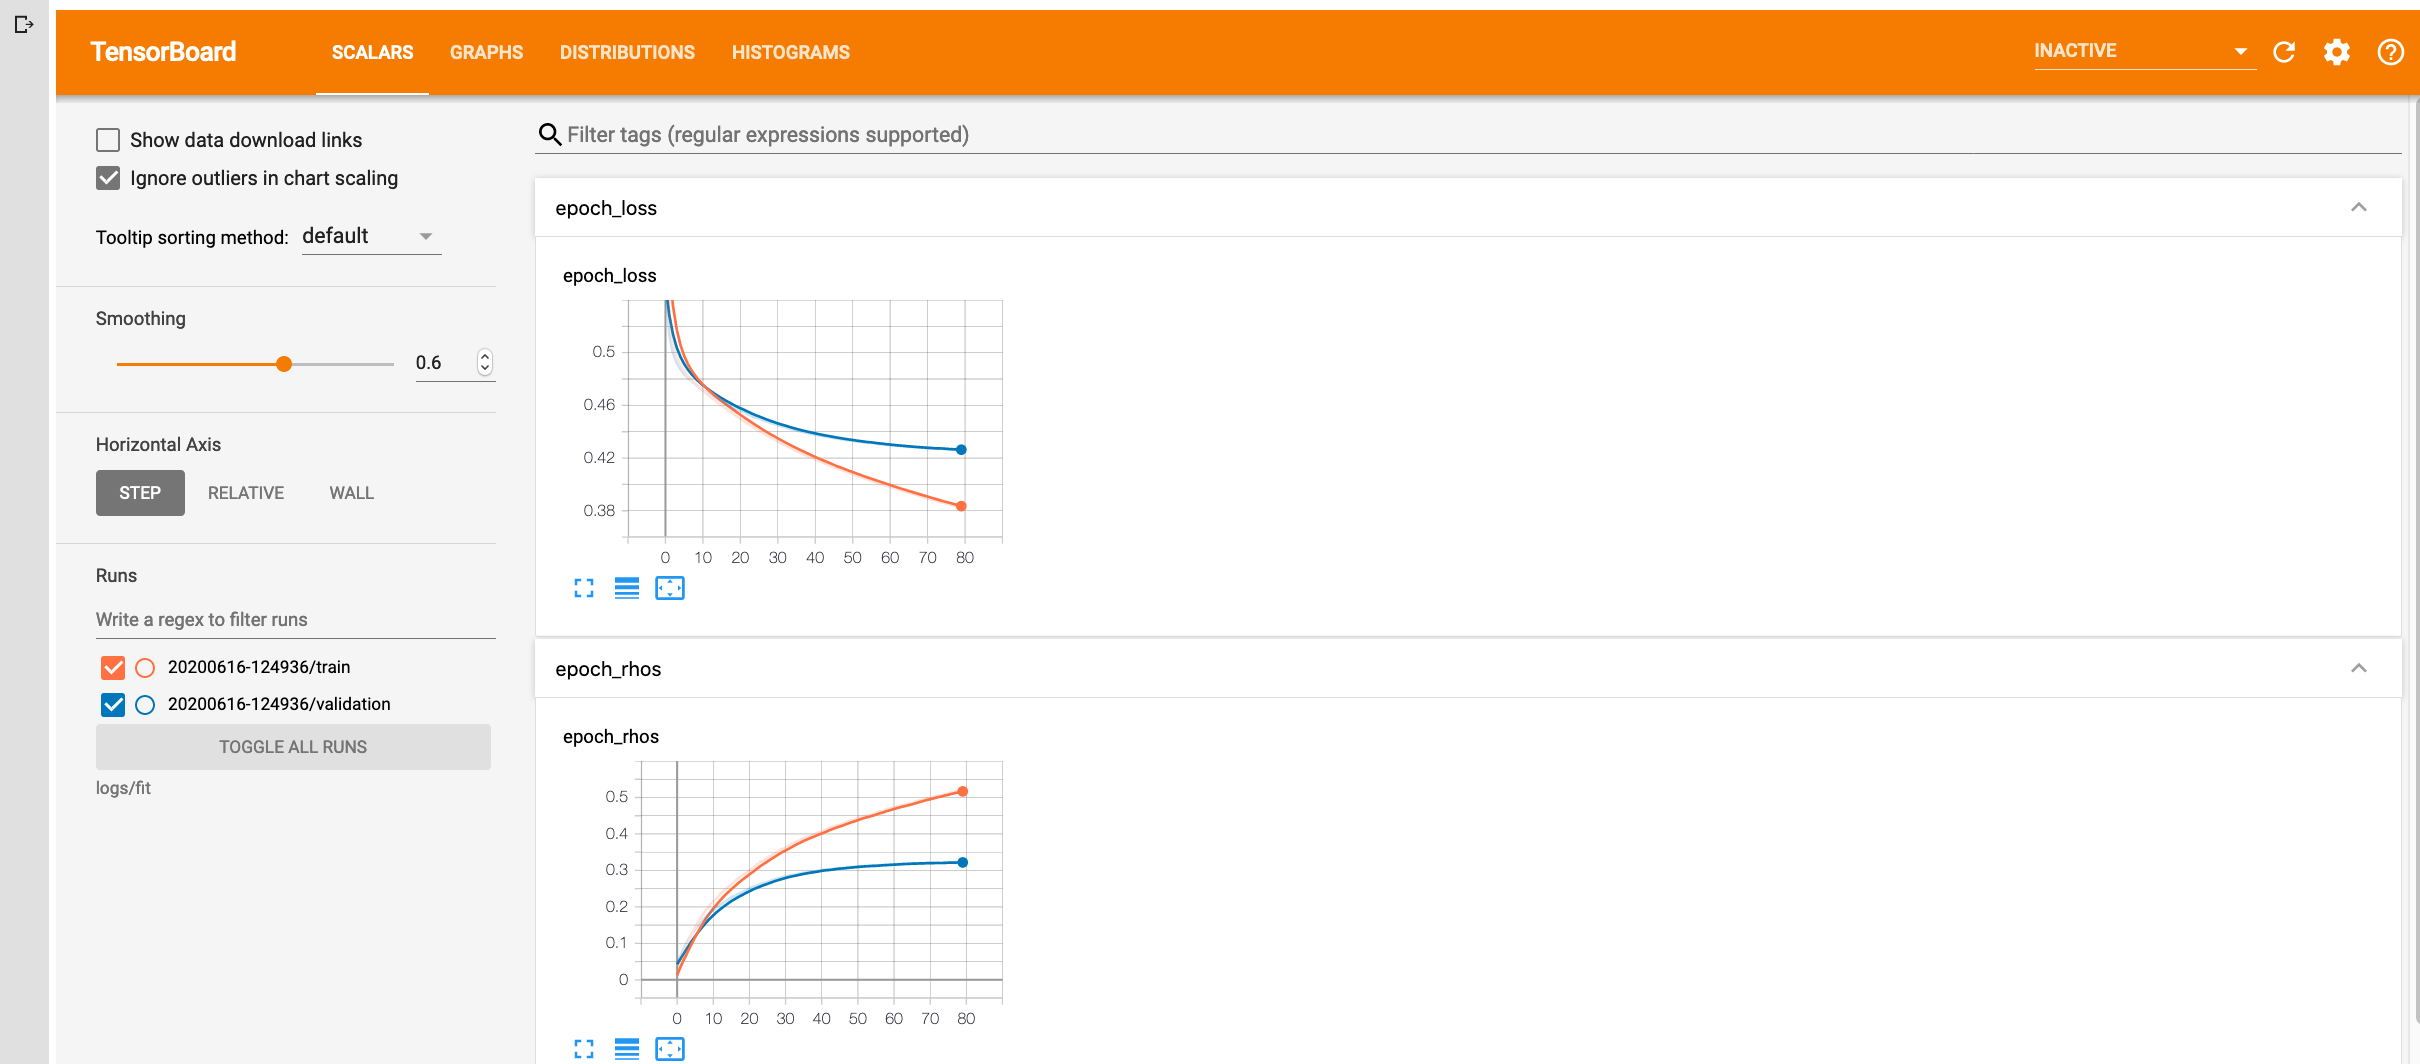

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('1.png', width=920, height=480)

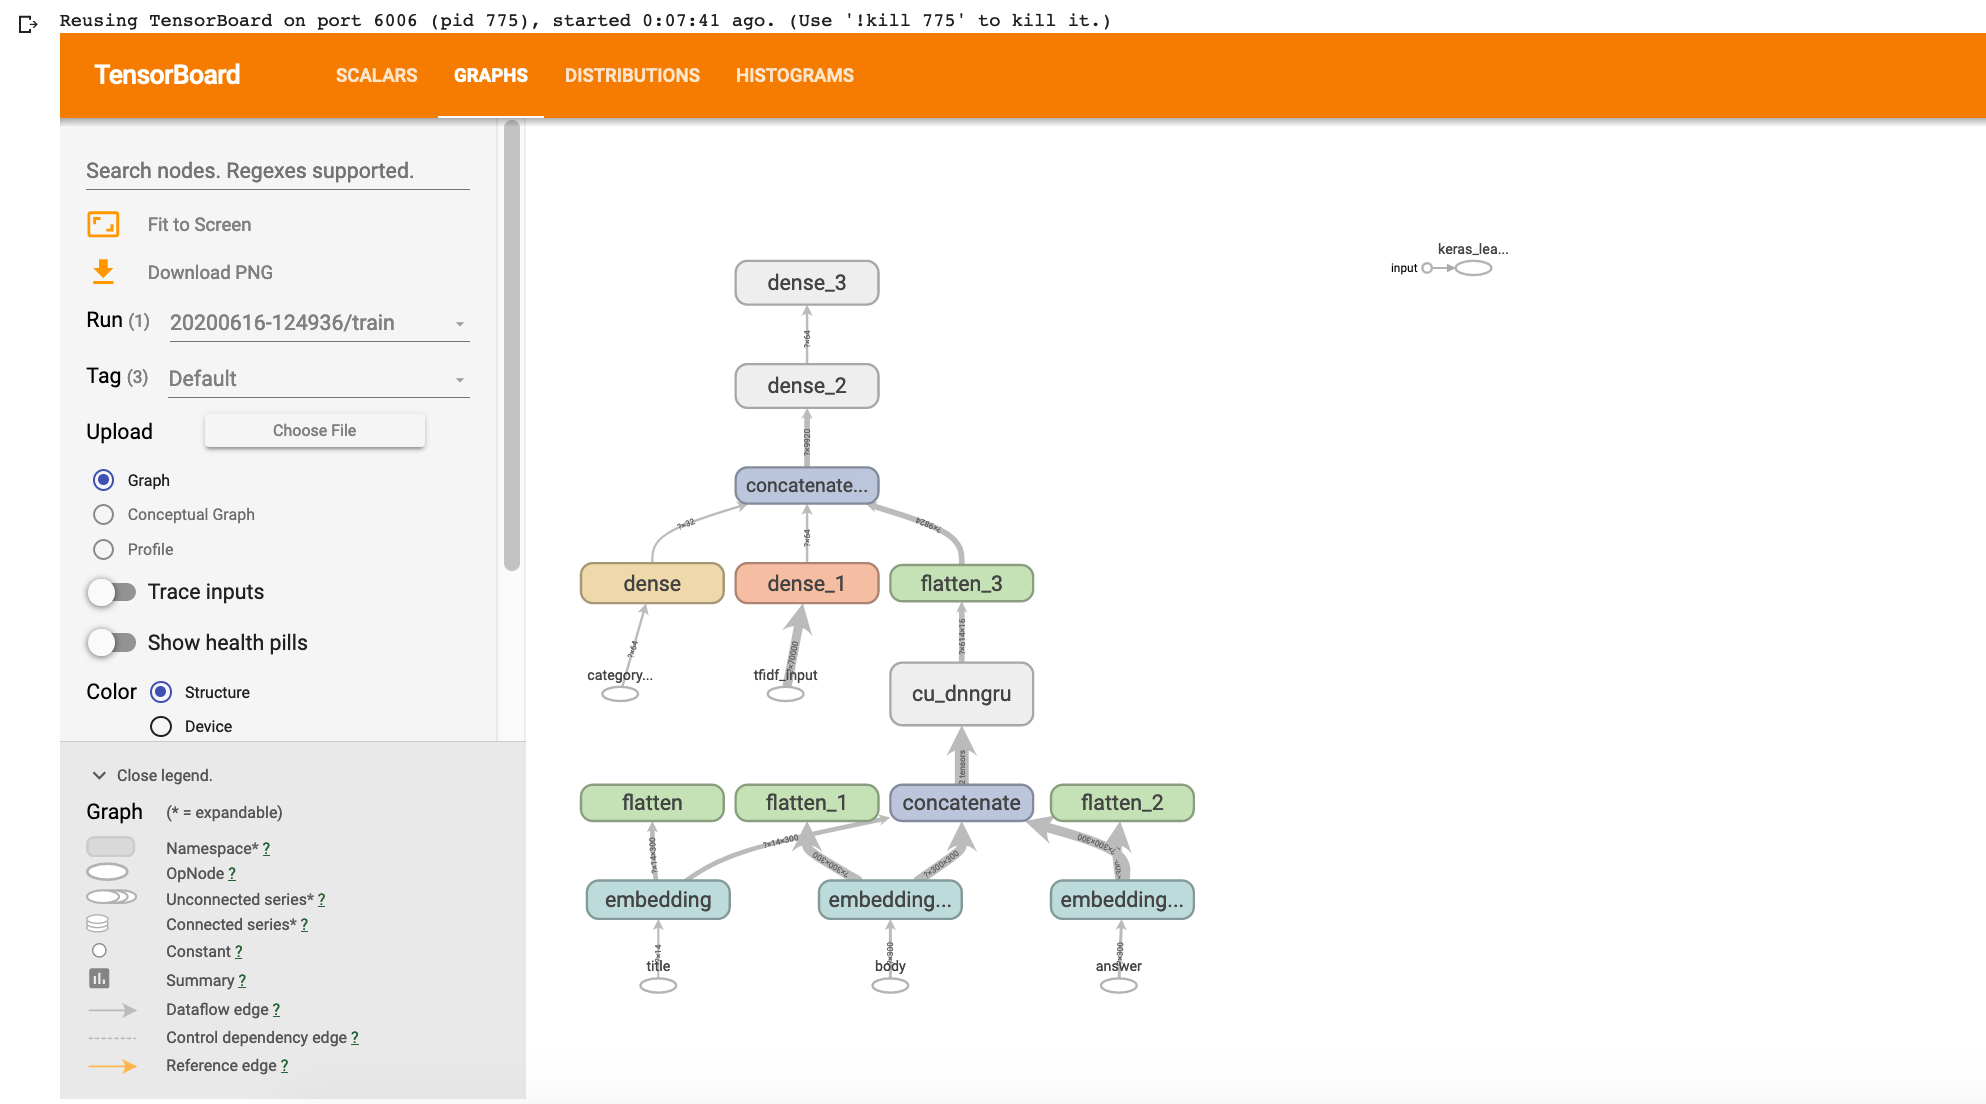

In [ ]:
Image('2.png', width=920, height=480)

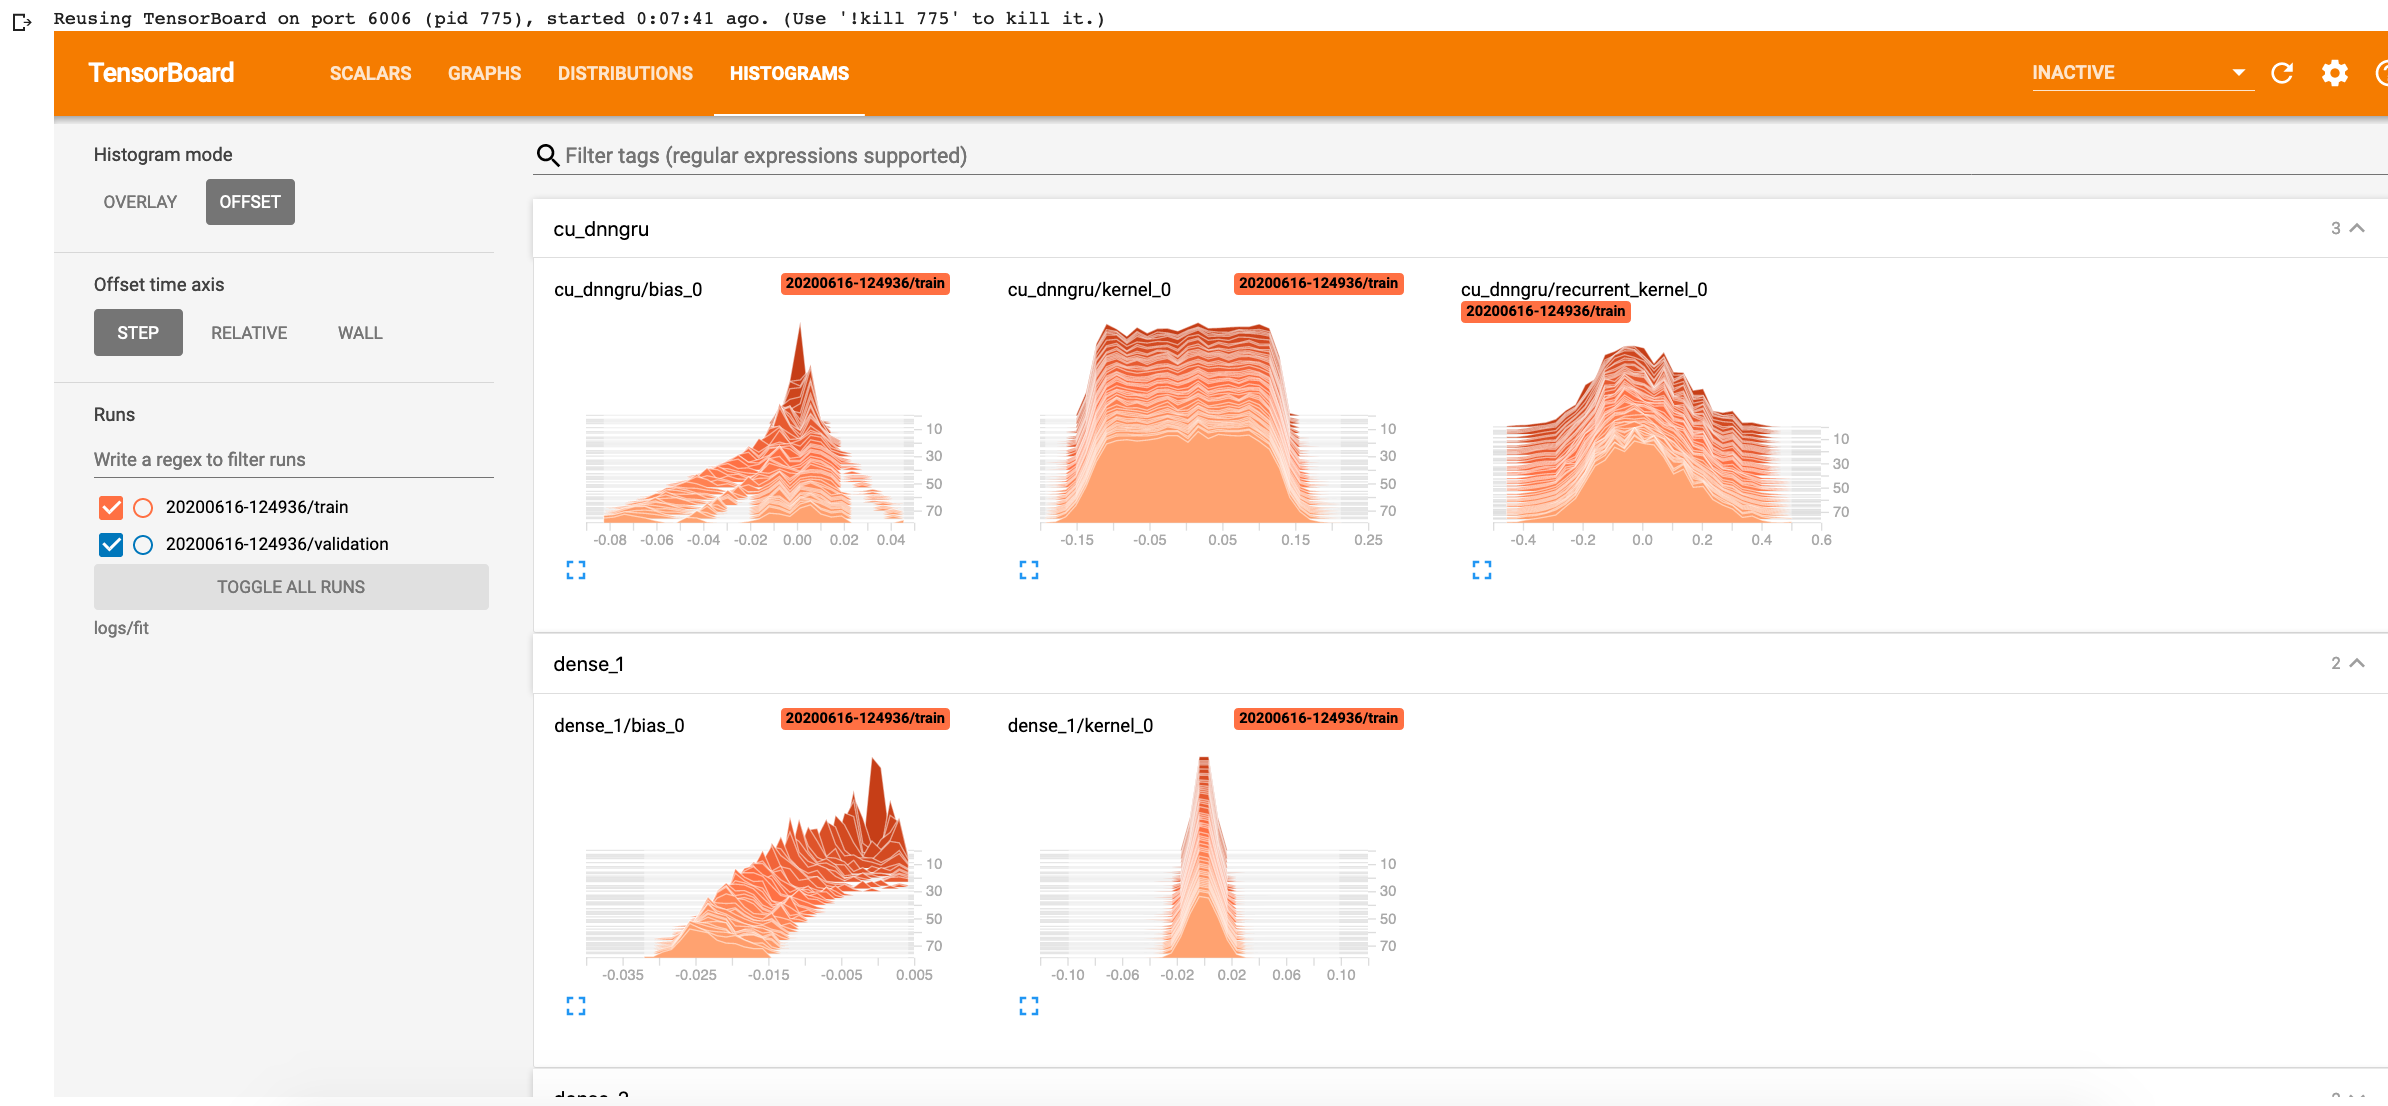

In [ ]:
Image('3.png', width=920, height=480)

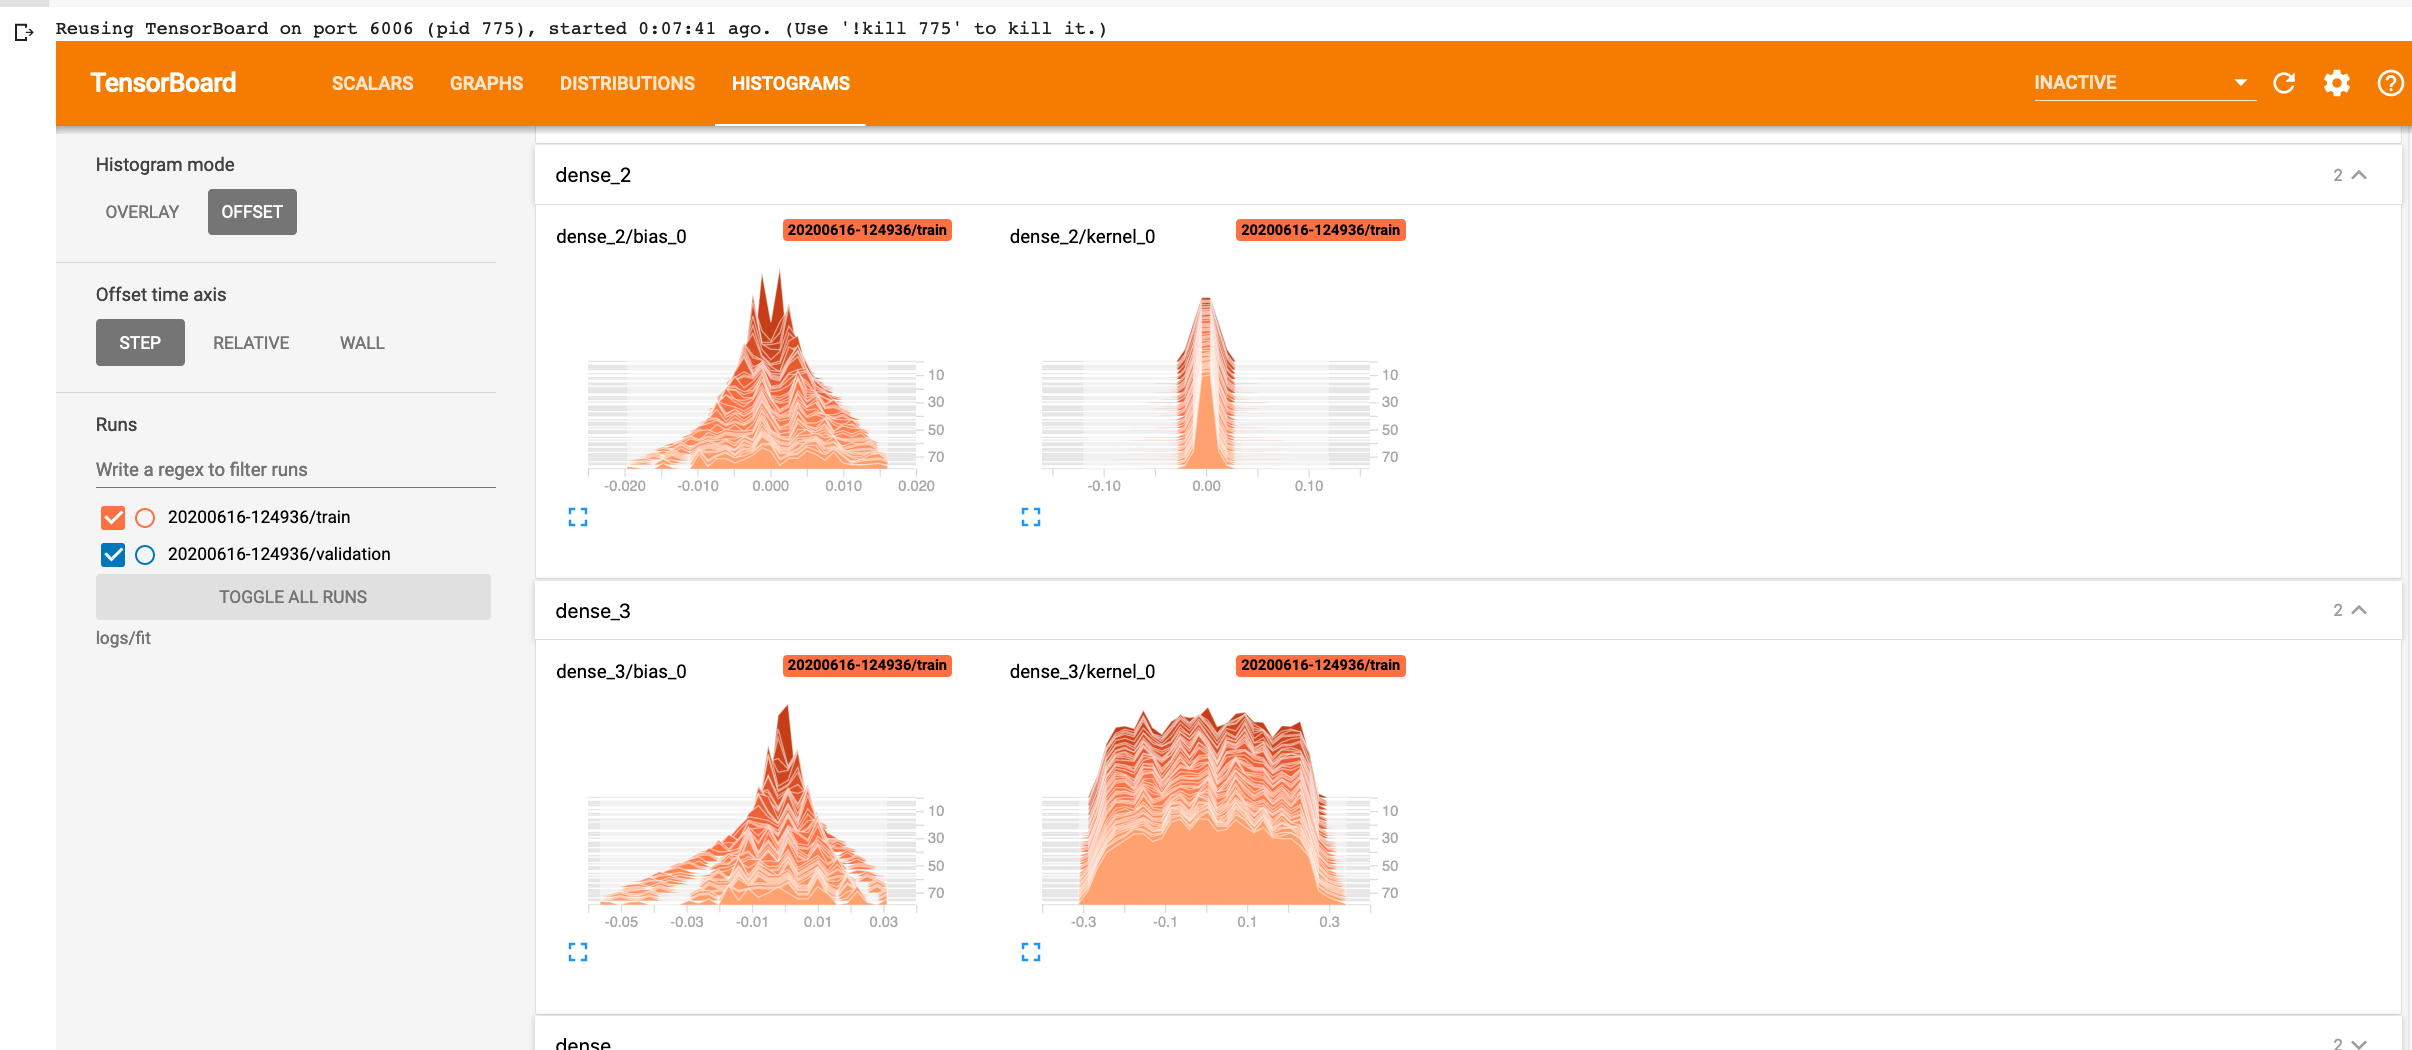

In [ ]:
Image('4.png', width=920, height=480)

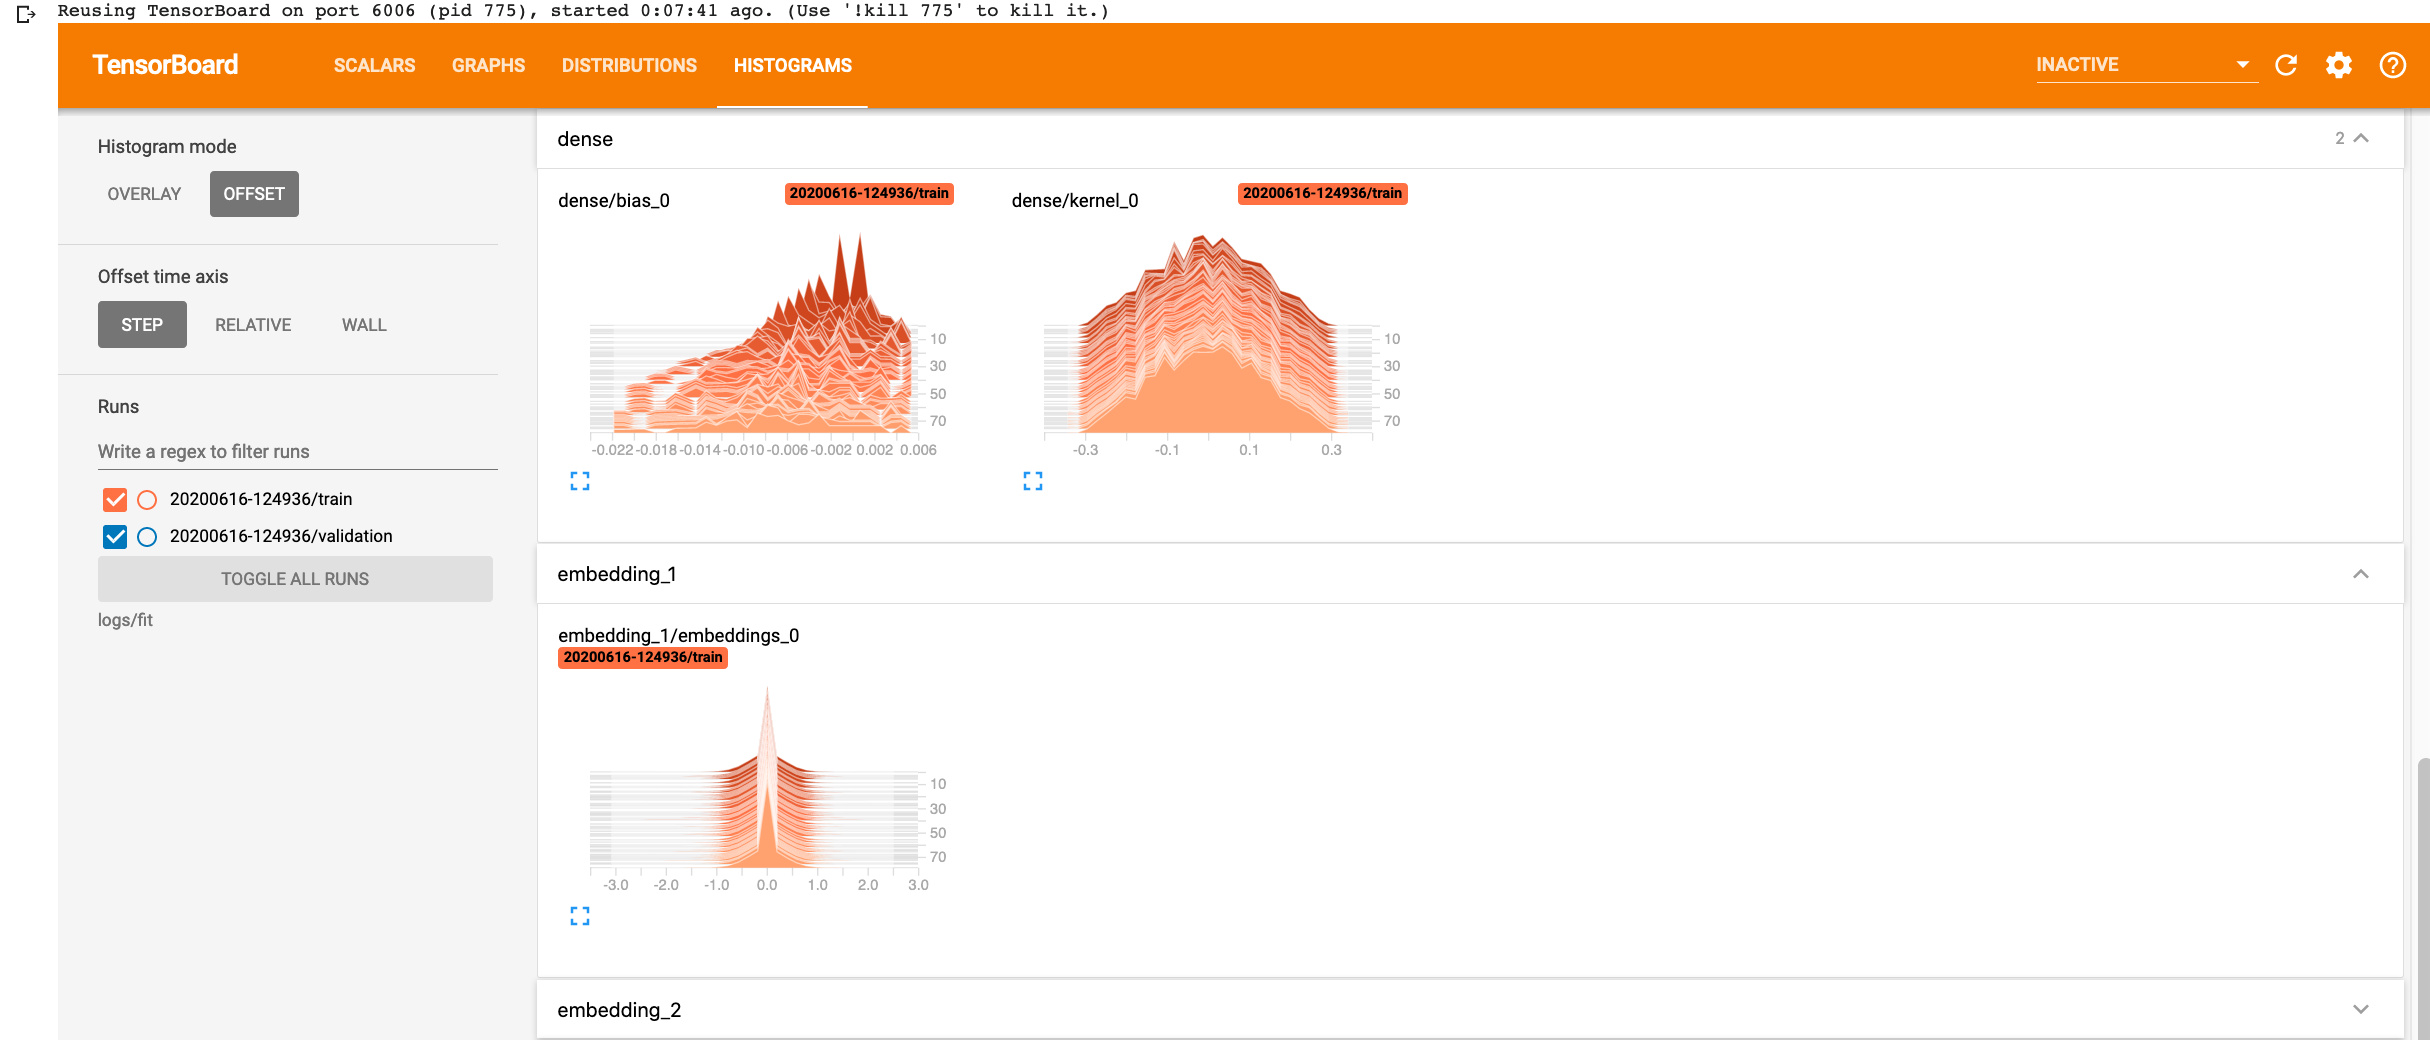

In [ ]:
Image('5.png', width=920, height=480)

In [ ]:
test_data = {'title': test_title, 'body': test_body, 'answer': test_answer, 
           'category_input': categorical_features_test, 'tfidf_input': test_tfidf.toarray()}

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
columns = y_train.columns
output = pd.DataFrame(y_pred, columns=columns, index=test['qa_id'])
output = output.reset_index()

In [ ]:
output.head()

qa_id  ...  answer_well_written
0     39  ...             0.875773
1     46  ...             0.910952
2     70  ...             0.893421
3    132  ...             0.911629
4    200  ...             0.923196

[5 rows x 31 columns]

In [ ]:
output.to_csv('submission.csv', index=False)

### Model 2 --> conv-1D

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Conv1D, Input, Embedding, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import backend as K
# from tensorflow.compat.v1.keras.layers import CuDNNGRU
from tensorflow.keras import regularizers
# K.clear_session()

In [ ]:
#### Model_2
K.clear_session()

category_input = Input(64, name="category_input", dtype='float64')
dense_category = Dense(32, activation='selu', kernel_initializer='lecun_normal')(category_input)

tfidf_input = Input(train_tfidf.shape[1], name="tfidf_input", dtype='float64')
# dense_tfidf = Dense(64, activation='selu')(tfidf_input)
tfidf_input_exp = tf.expand_dims(tfidf_input, axis=-1)
conv_tfidf = Conv1D(filters=8, kernel_size=256, padding="same", activation="relu", name='conv_tfidf',
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                    bias_regularizer=regularizers.l2(1e-4),
                    activity_regularizer=regularizers.l2(1e-5))(tfidf_input_exp)
conv_tfidf_flatten = Flatten()(conv_tfidf)

title_input = Input(max_length_title, name="title", dtype='float64')
title_embedding = Embedding(title_vocab_size, 300, weights=[embedding_matrix_title],
                            input_length=max_length_title, trainable=False)(title_input)
title_embedding_flatten = Flatten()(title_embedding)
################################################
body_input = Input(max_length_body, name="body", dtype='float64')
body_embedding = Embedding(body_vocab_size, 300, weights=[embedding_matrix_body],
                            input_length=max_length_body, trainable=False)(body_input)
body_embedding_flatten = Flatten()(body_embedding)
################################################
answer_input = Input(max_length_answer, name="answer", dtype='float64')
answer_embedding = Embedding(answer_vocab_size, 300, weights=[embedding_matrix_answer],
                            input_length=max_length_answer, trainable=False)(answer_input)
answer_embedding_flatten = Flatten()(answer_embedding)

concat_layer = concatenate([title_embedding, body_embedding, answer_embedding], axis=1)

conv_1 = Conv1D(filters=32, kernel_size=256, padding="same", activation="relu", name='conv_1')(concat_layer)
conv_2 = Conv1D(filters=32, kernel_size=128, padding="same", activation="relu", name='conv_2',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(conv_1)

avg_hidden = Flatten()(conv_2)
print(avg_hidden.shape)
################################################
concat_layer_2 = concatenate([avg_hidden, dense_category, conv_tfidf_flatten])
# bn = BatchNormalization()(concat_layer_2)
dense_1 = Dense(64, activation='selu', kernel_initializer='lecun_normal', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(concat_layer_2)
# dense_2 = Dense(64, activation='selu', kernel_initializer='lecun_normal')(dense_1)
dense_3 = Dense(30, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(dense_1)

model = Model(inputs=[title_input, body_input, answer_input, category_input, tfidf_input], outputs=[dense_3])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(None, 19648)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 14)]         0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, 300)]        0                                            
__________________________________________________________________________________________________
answer (InputLayer)             [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 14, 300)      2156400     title[0][0]                      
______________________________________________________________________________________________

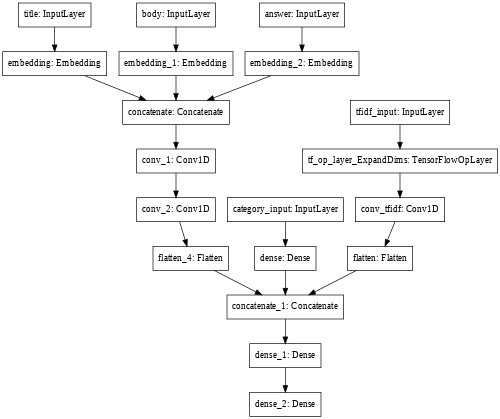

In [ ]:
tf.keras.utils.plot_model(
 model,
 to_file='model.png',
 show_shapes=False,
 show_layer_names=True,
 rankdir='TB',
 expand_nested=False,
 dpi=48
)

In [ ]:
from scipy.stats import spearmanr
def compute_spearmanr_ignore_nan(trues, preds):
    rhos = []
    for tcol, pcol in zip(np.transpose(trues), np.transpose(preds)):
        rhos.append(spearmanr(tcol, pcol).correlation)
    return np.nanmean(rhos)

In [ ]:
def rhos(y, y_pred):
  return tf.py_function(compute_spearmanr_ignore_nan, (y, y_pred), tf.double)

In [ ]:
metrics = [rhos]
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1, mode='auto',
                                                 min_delta=0.0001, cooldown=0, min_lr=1e-7)

In [ ]:
input_data = {'title': train_title, 'body': train_body, 'answer': train_answer, 
              'category_input': categorical_features_train, 'tfidf_input': train_tfidf.toarray()}
cv_data = {'title': cv_title, 'body': cv_body, 'answer': cv_answer, 
           'category_input': categorical_features_cv, 'tfidf_input': cv_tfidf.toarray()}

In [ ]:
%reload_ext tensorboard
import datetime
!rm -rf logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [tensorboard_callback]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(input_data, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


152/152 [==============================] - 88s 580ms/step - loss: 0.7368 - rhos: 0.0809 - val_loss: 0.5479 - val_rhos: 0.1589
Epoch 2/50
152/152 [==============================] - 84s 553ms/step - loss: 0.4933 - rhos: 0.2013 - val_loss: 0.4637 - val_rhos: 0.2241
Epoch 3/50
152/152 [==============================] - 84s 551ms/step - loss: 0.4601 - rhos: 0.2470 - val_loss: 0.4567 - val_rhos: 0.2495
Epoch 4/50
152/152 [==============================] - 84s 552ms/step - loss: 0.4534 - rhos: 0.2733 - val_loss: 0.4513 - val_rhos: 0.2640
Epoch 5/50
152/152 [==============================] - 84s 551ms/step - loss: 0.4488 - rhos: 0.2941 - val_loss: 0.4479 - val_rhos: 0.2763
Epoch 6/50
152/152 [==============================] - 83s 549ms/step - loss: 0.4449 - rhos: 0.3074 - val_loss: 0.4455 - val_rhos: 0.2856
Epoch 7/50
152/152 [==============================] - 84s 551ms/step - loss: 0.4418 - rhos: 0.3205 - val_loss: 0.4442 - val_rhos: 0.2871
Epoch 8/50
152/152 [==============================] 

In [ ]:
%tensorboard --logdir logs/fit

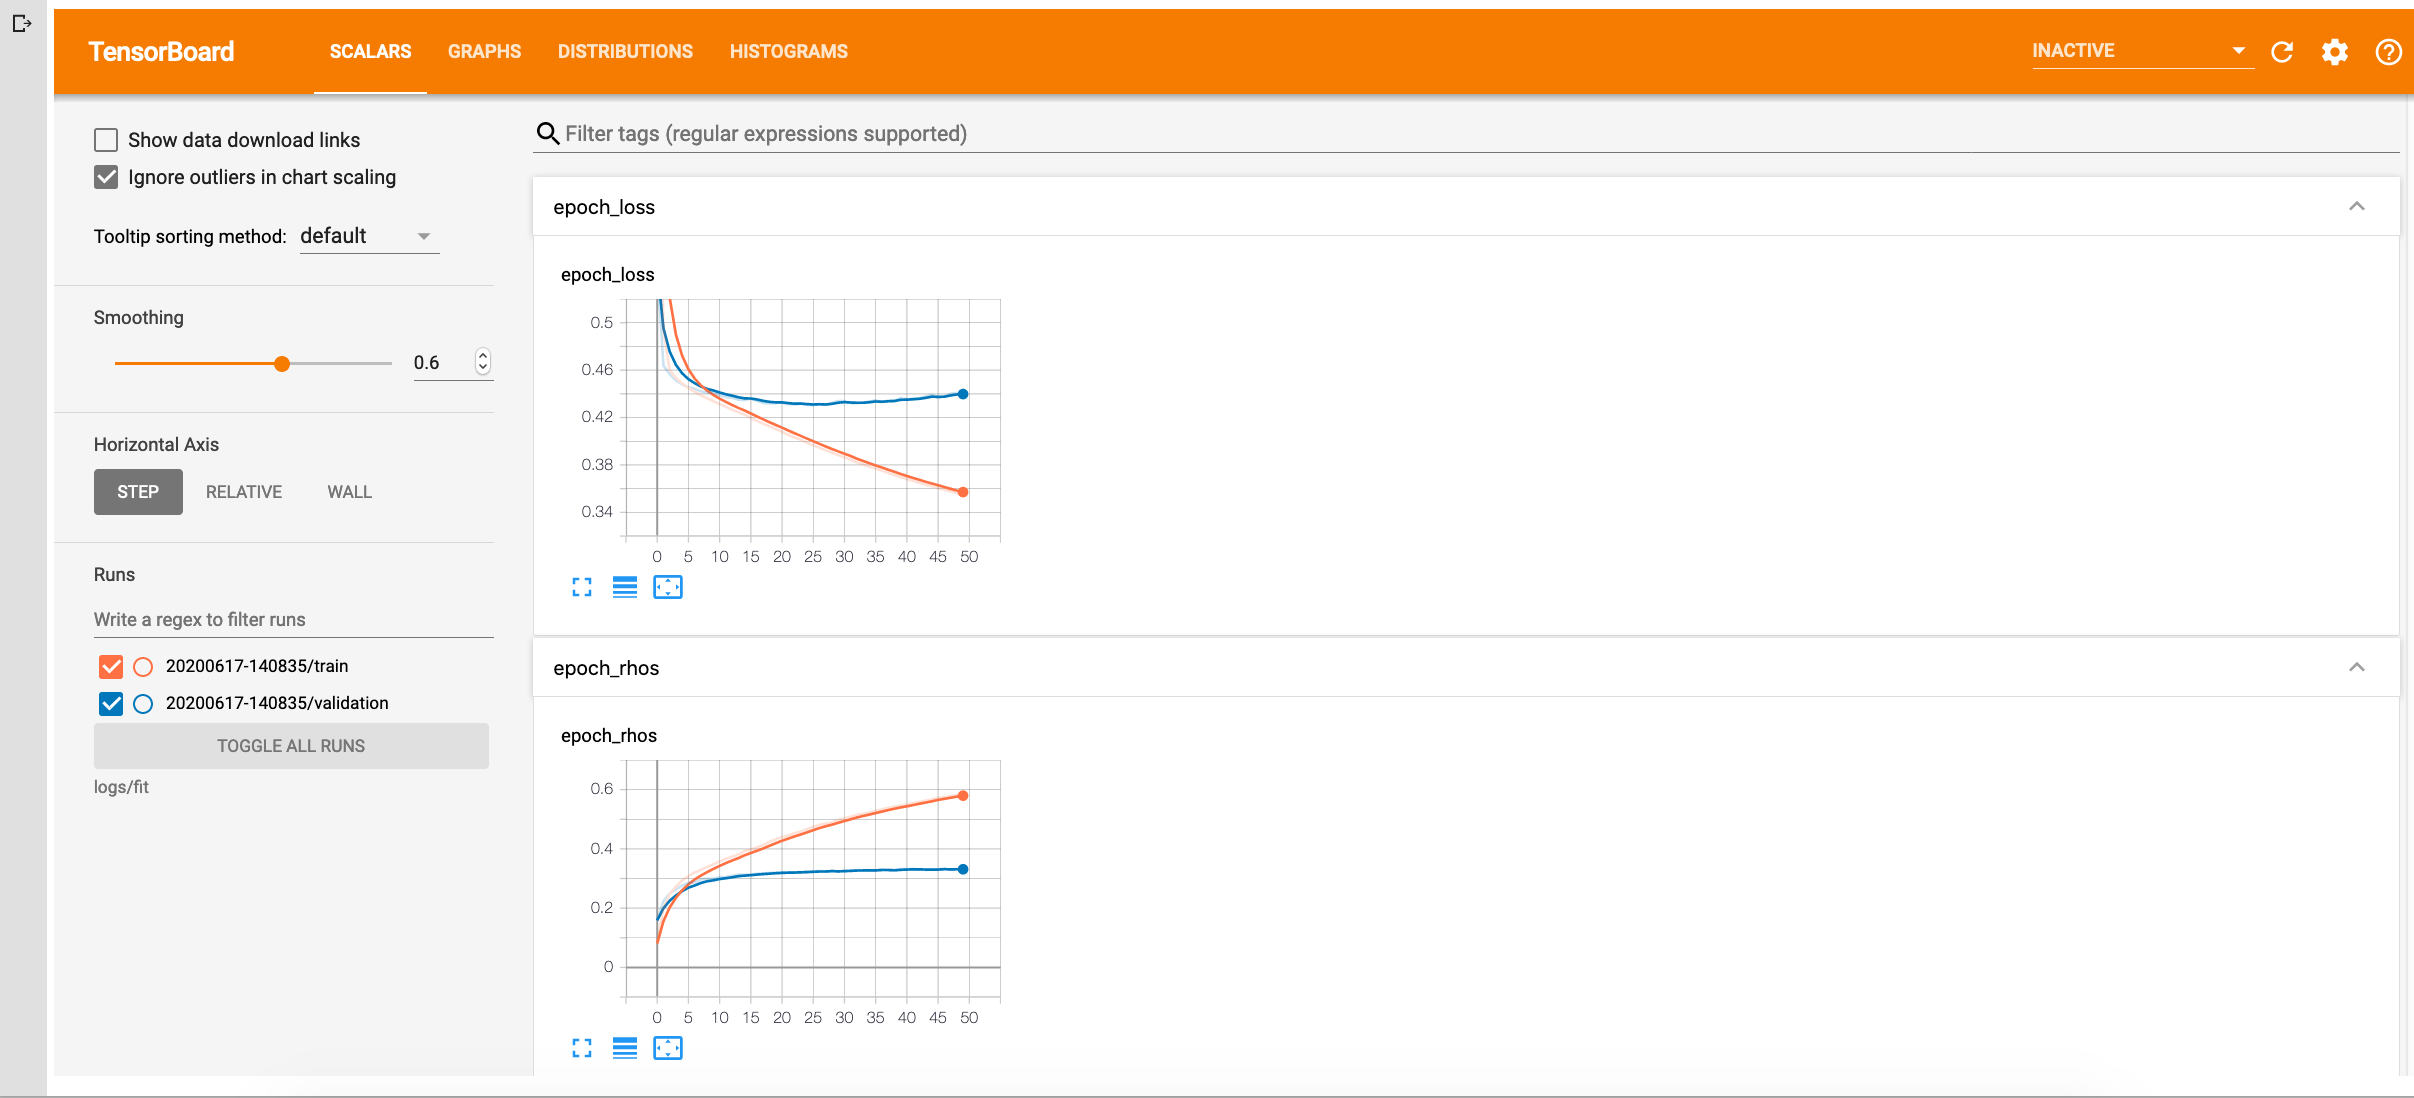

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('1.png', width=920, height=480)

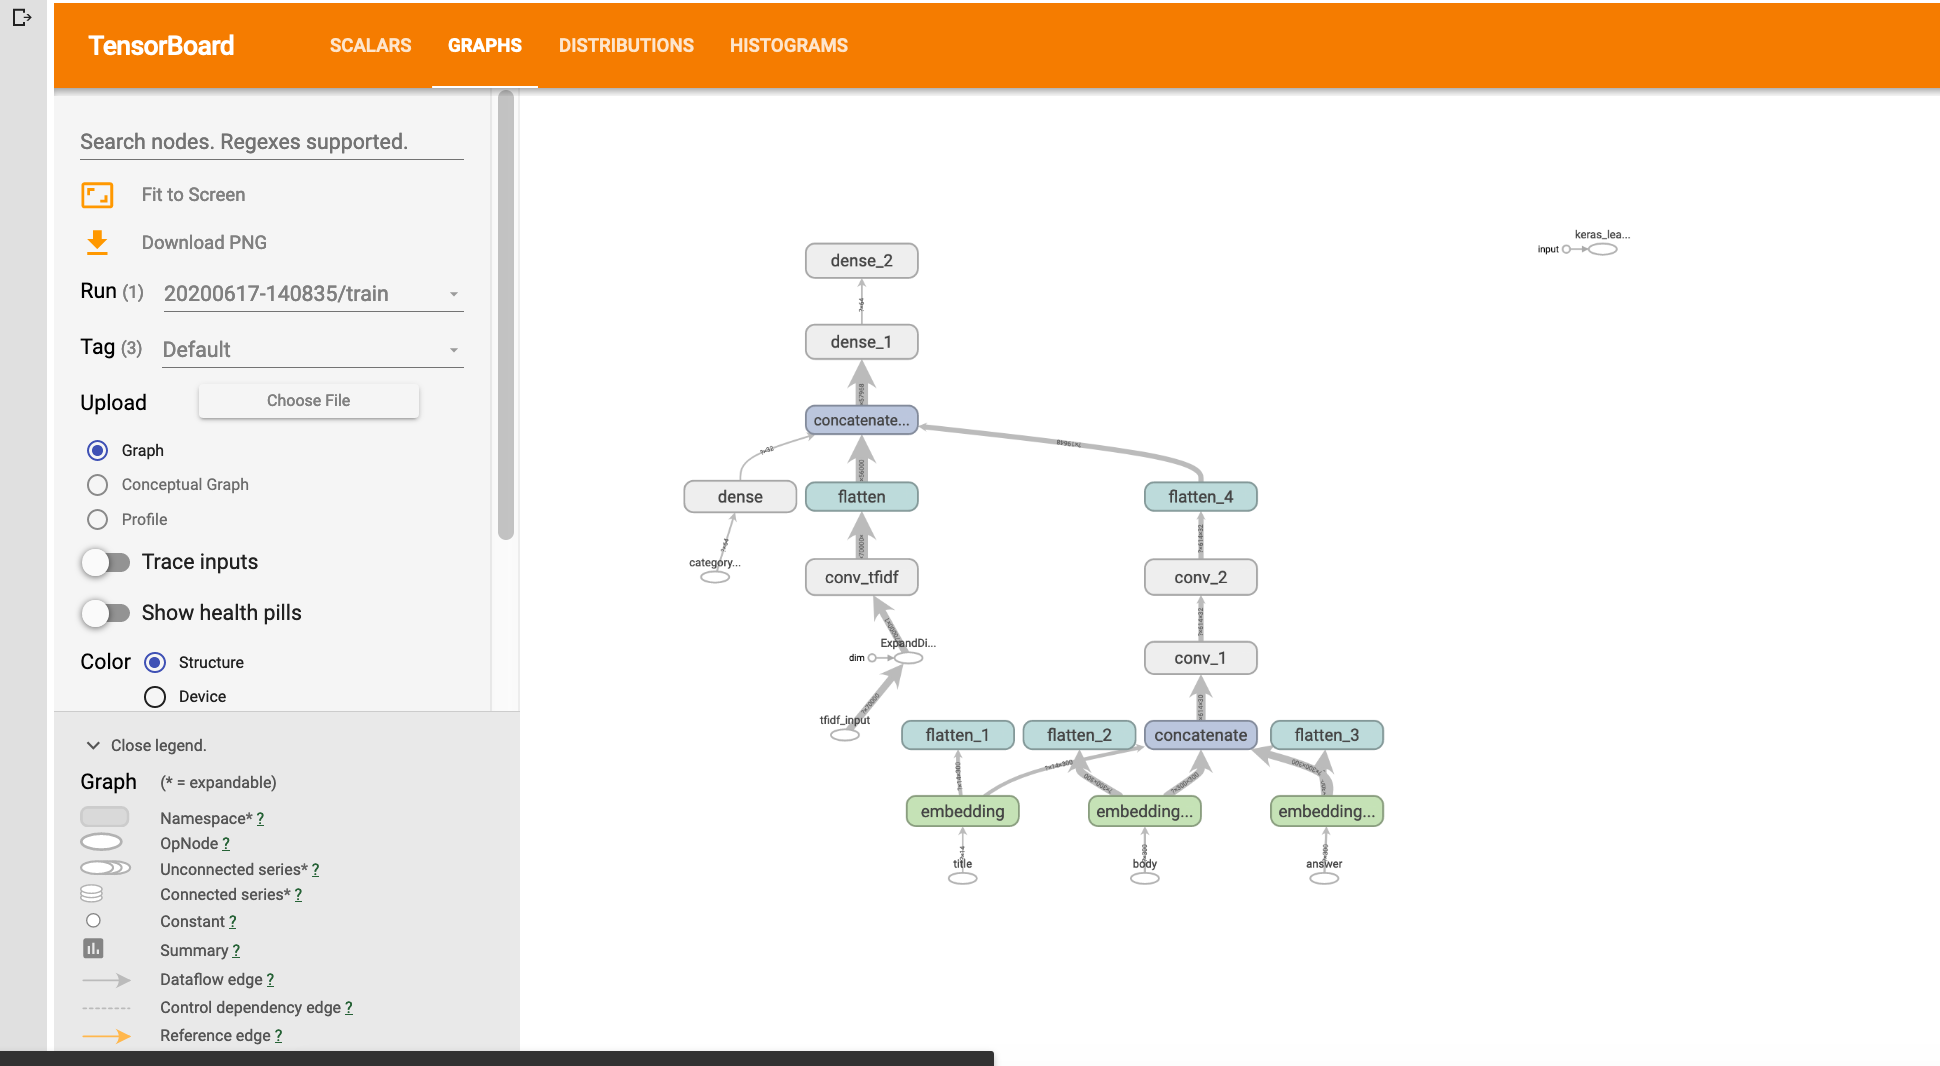

In [ ]:
Image('2.png', width=920, height=480)

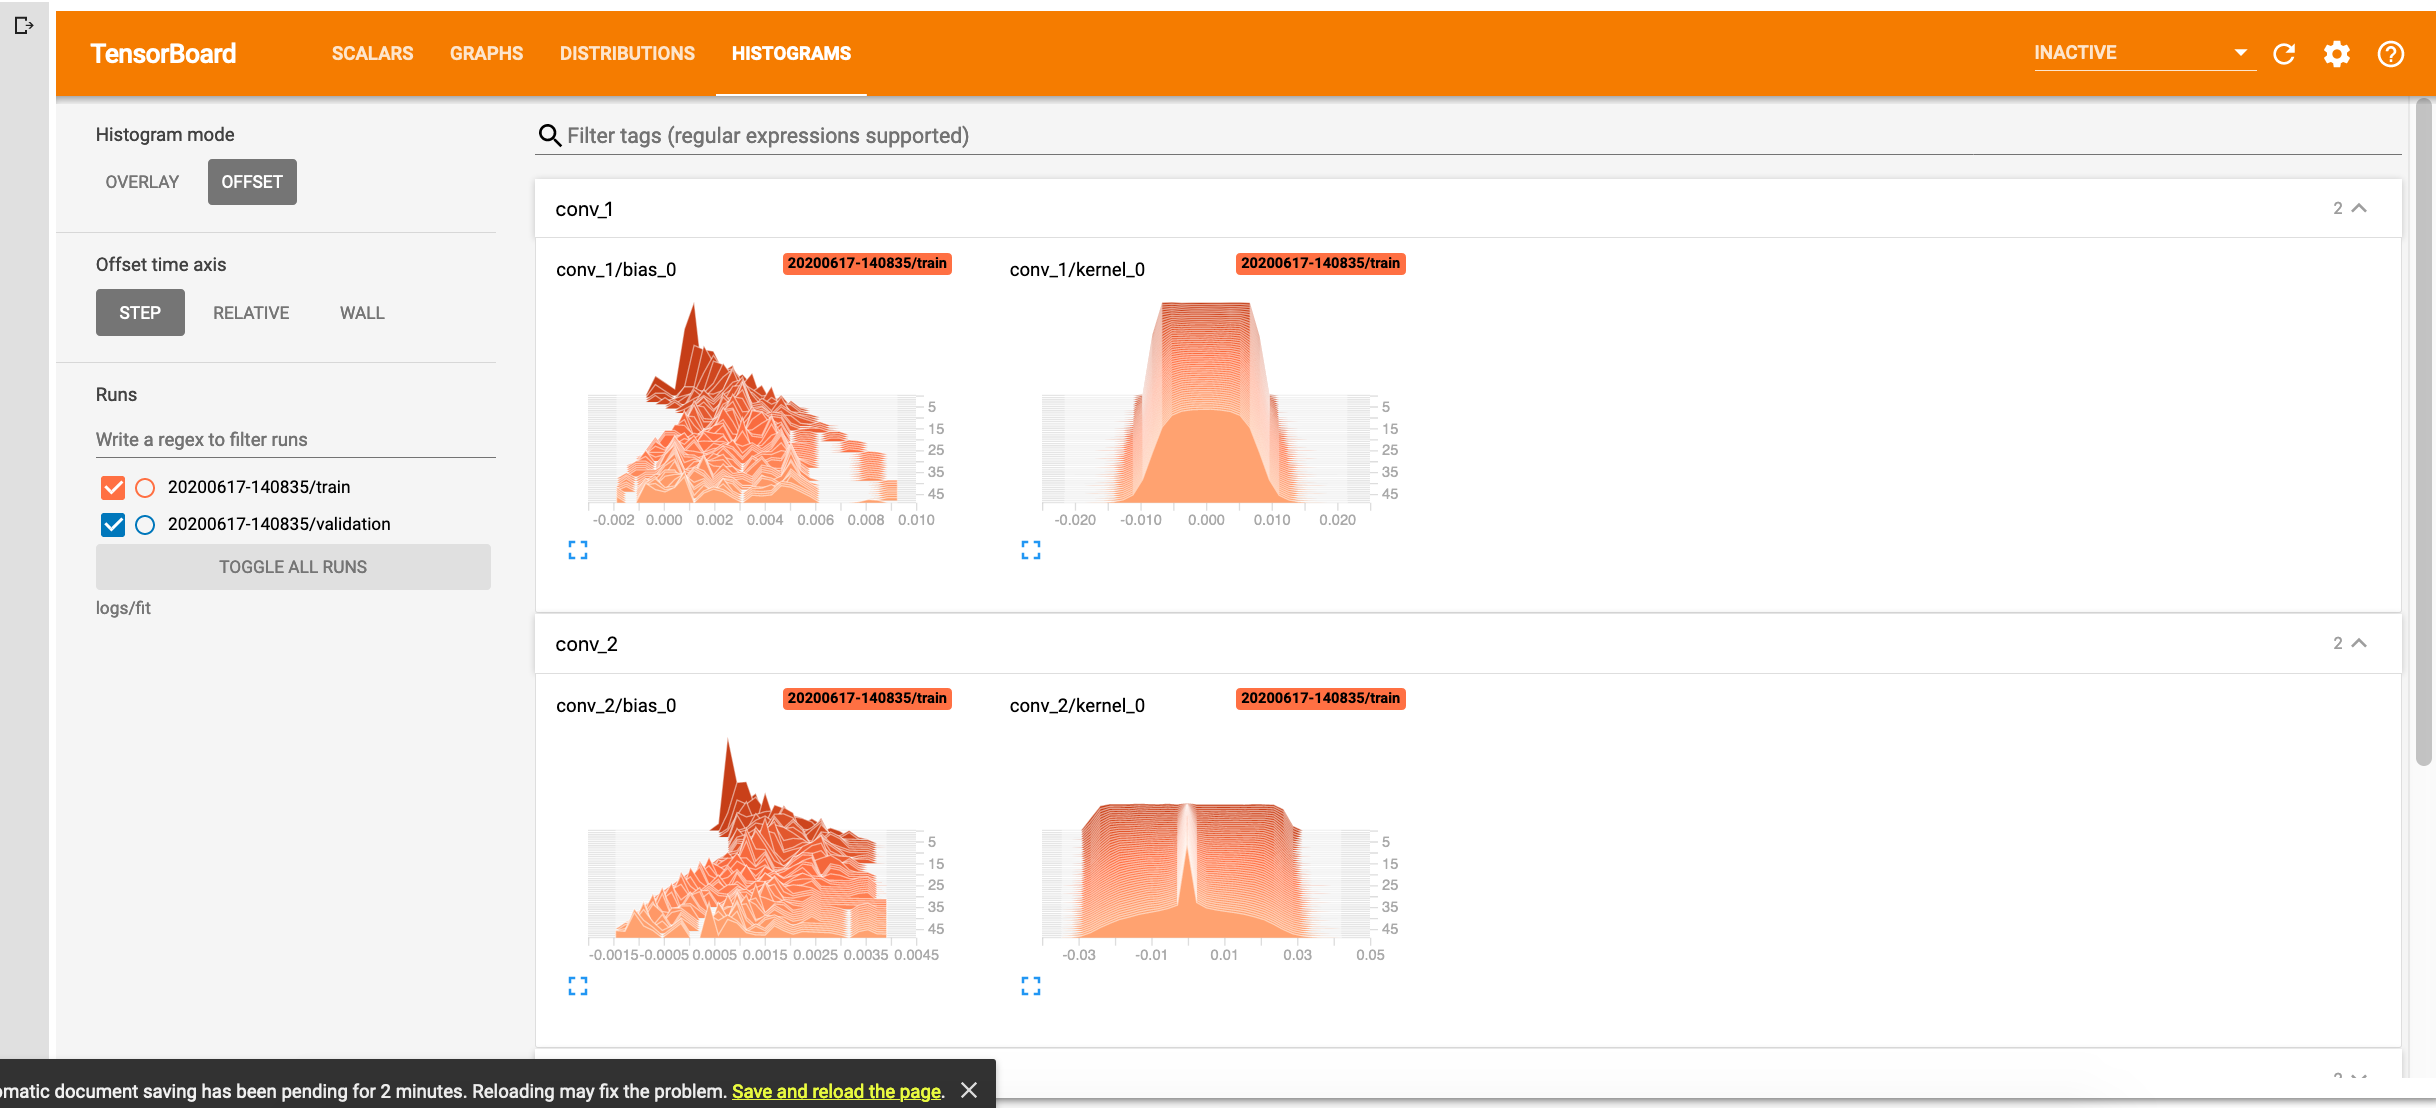

In [ ]:
Image('3.png', width=920, height=480)

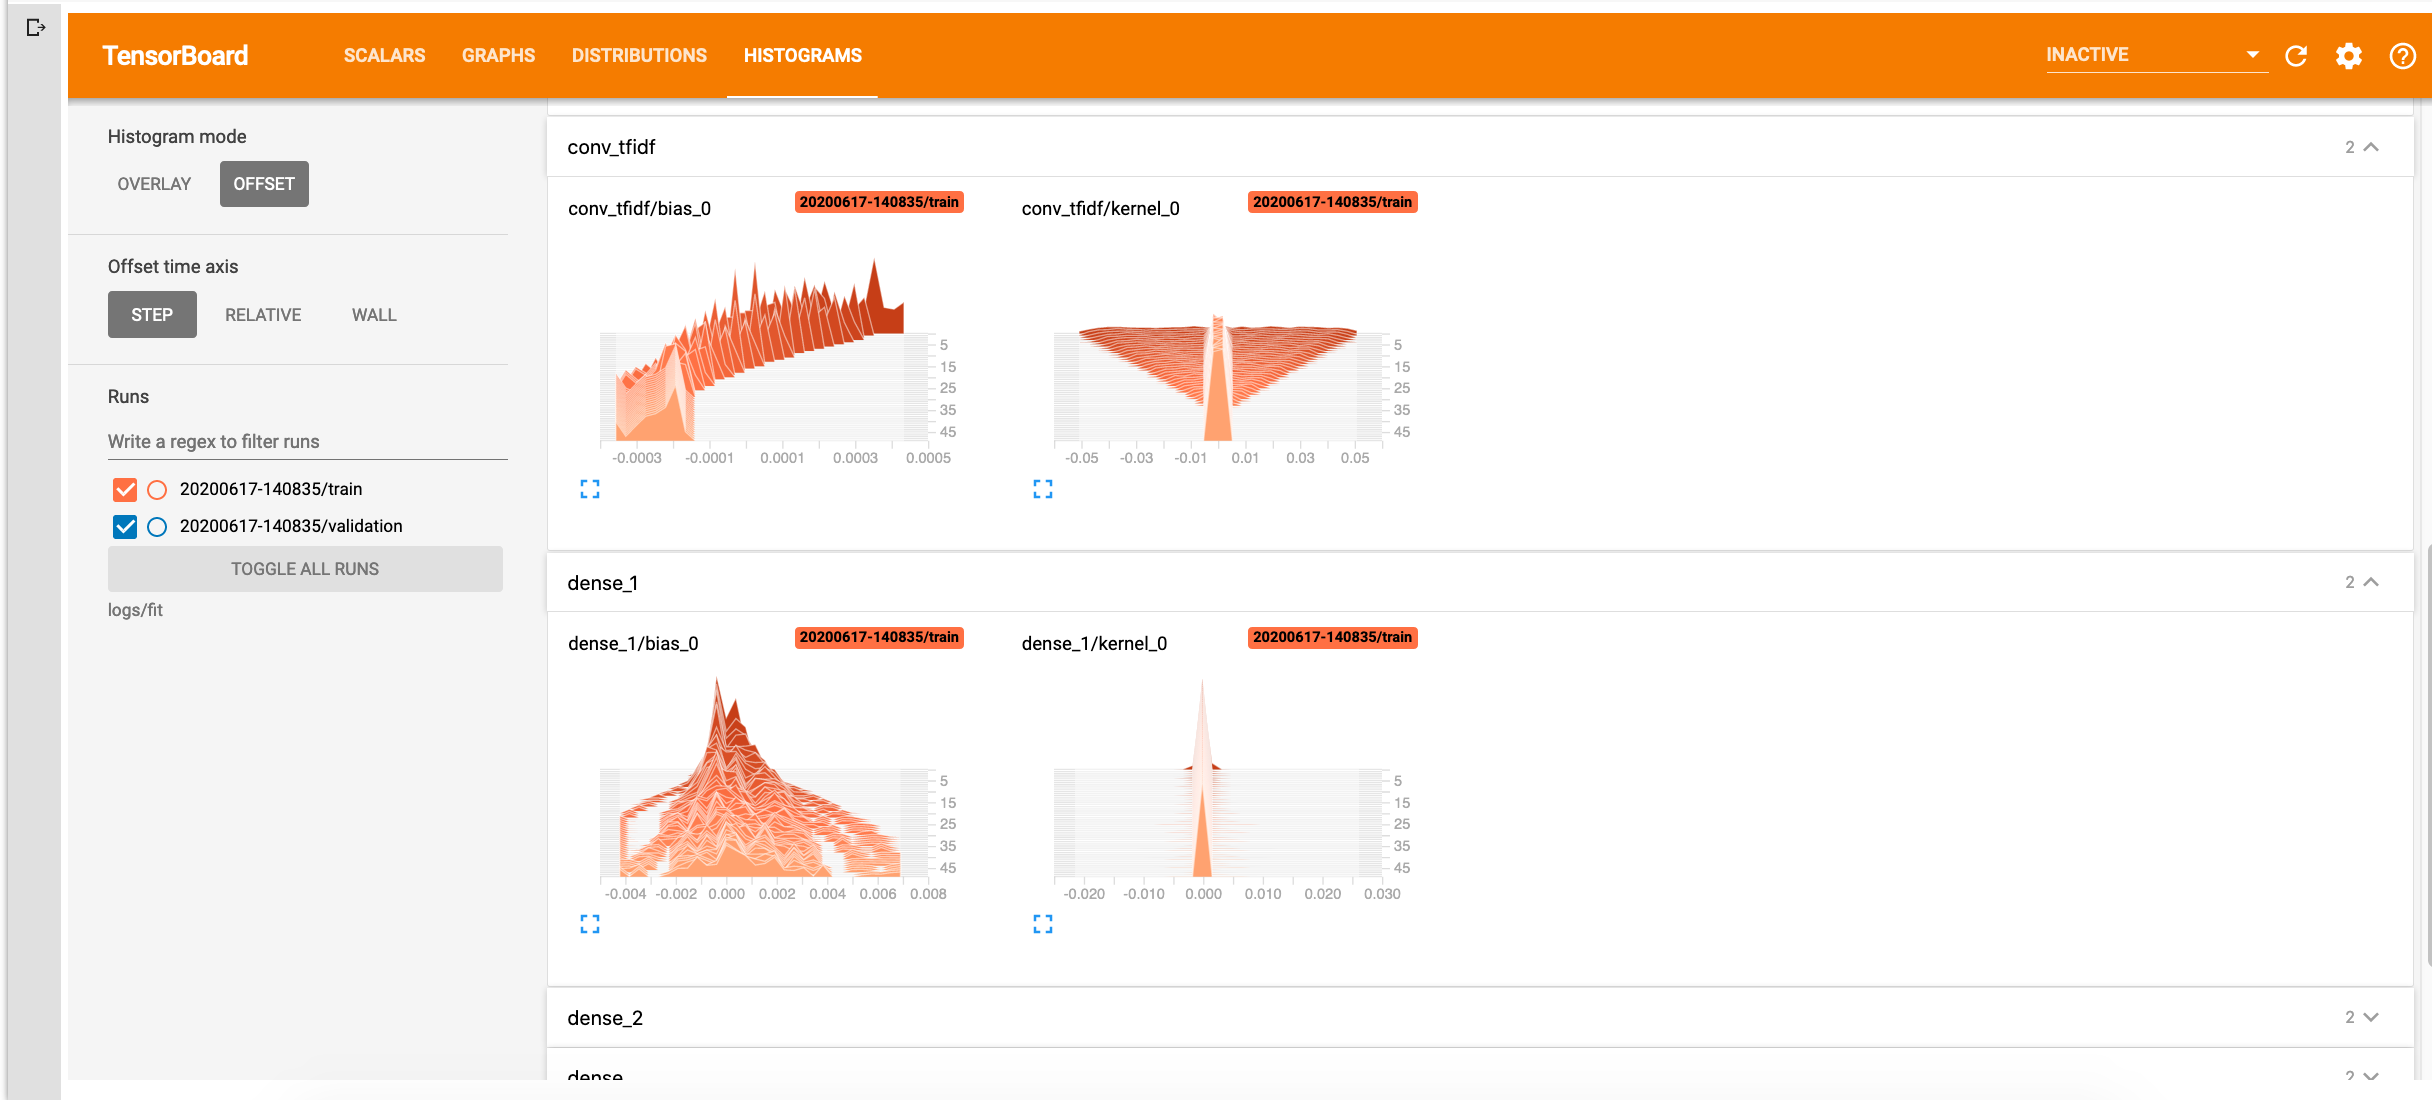

In [ ]:
Image('4.png', width=920, height=480)

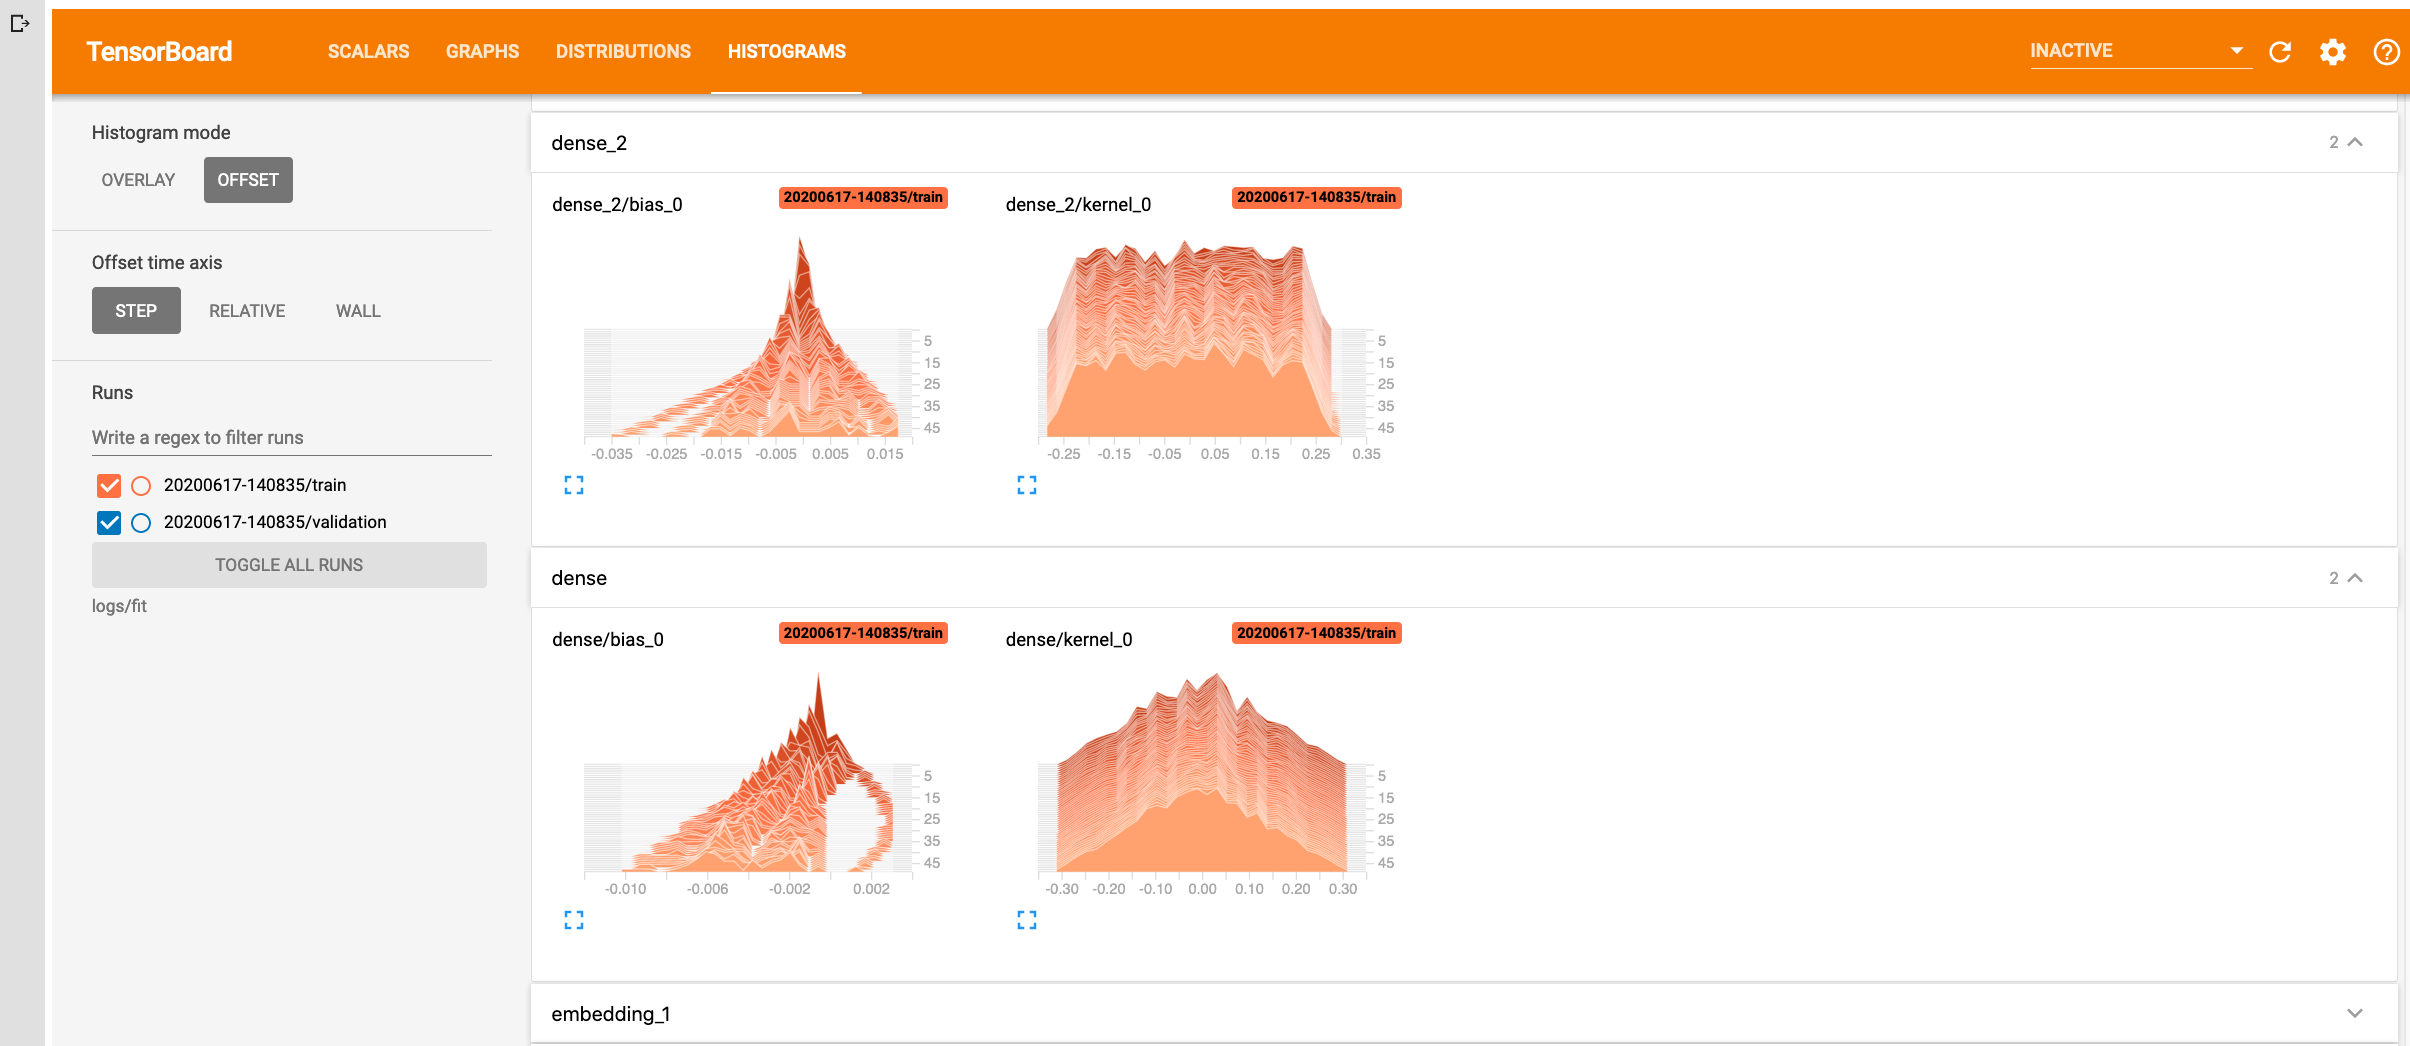

In [ ]:
Image('5.png', width=920, height=480)

### Model 3 - dense

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Conv1D, Input, Embedding, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from tensorflow.keras import regularizers
# K.clear_session()

In [ ]:
#### Model_2
K.clear_session()

category_input = Input(64, name="category_input", dtype='float64')
dense_category = Dense(32, activation='selu', kernel_initializer='lecun_normal')(category_input)

tfidf_input = Input(train_tfidf.shape[1], name="tfidf_input", dtype='float64')
dense_tfidf = Dense(64, activation='selu')(tfidf_input)

title_input = Input(max_length_title, name="title", dtype='float64')
title_embedding = Embedding(title_vocab_size, 300, weights=[embedding_matrix_title],
                            input_length=max_length_title, trainable=False)(title_input)
title_embedding_flatten = Flatten()(title_embedding)
################################################
body_input = Input(max_length_body, name="body", dtype='float64')
body_embedding = Embedding(body_vocab_size, 300, weights=[embedding_matrix_body],
                            input_length=max_length_body, trainable=False)(body_input)
body_embedding_flatten = Flatten()(body_embedding)
################################################
answer_input = Input(max_length_answer, name="answer", dtype='float64')
answer_embedding = Embedding(answer_vocab_size, 300, weights=[embedding_matrix_answer],
                            input_length=max_length_answer, trainable=False)(answer_input)
answer_embedding_flatten = Flatten()(answer_embedding)

concat_layer = concatenate([title_embedding, body_embedding, answer_embedding], axis=1)

dense_l1 = Dense(units=256, activation="selu", name='dense_l1',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(concat_layer)
drop_1 = Dropout(0.2)(dense_l1)
dense_l2 = Dense(units=128, activation="selu", name='dense_l2',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(drop_1)

avg_hidden = Flatten()(dense_l2)
print(avg_hidden.shape)
################################################
concat_layer_2 = concatenate([avg_hidden, dense_category, dense_tfidf])
# bn = BatchNormalization()(concat_layer_2)
dense_1 = Dense(64, activation='selu', kernel_initializer='lecun_normal', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(concat_layer_2)
drop_2 = Dropout(0.3)(dense_1)
dense_3 = Dense(30, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))(drop_2)

model = Model(inputs=[title_input, body_input, answer_input, category_input, tfidf_input], outputs=[dense_3])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(None, 78592)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 14)]         0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, 300)]        0                                            
__________________________________________________________________________________________________
answer (InputLayer)             [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 14, 300)      2156400     title[0][0]                      
______________________________________________________________________________________________

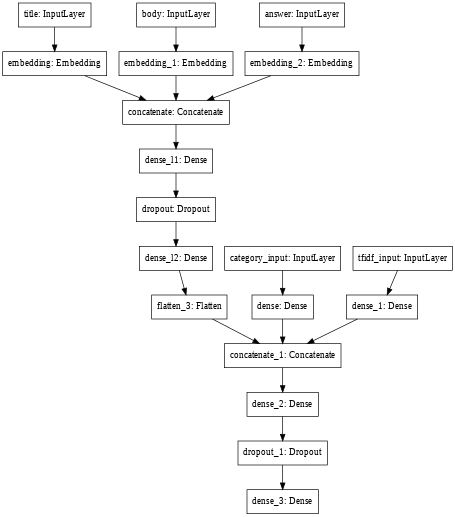

In [ ]:
tf.keras.utils.plot_model(
 model,
 to_file='model.png',
 show_shapes=False,
 show_layer_names=True,
 rankdir='TB',
 expand_nested=False,
 dpi=48
)

In [ ]:
from scipy.stats import spearmanr
def compute_spearmanr_ignore_nan(trues, preds):
    rhos = []
    for tcol, pcol in zip(np.transpose(trues), np.transpose(preds)):
        rhos.append(spearmanr(tcol, pcol).correlation)
    return np.nanmean(rhos)

In [ ]:
def rhos(y, y_pred):
  return tf.py_function(compute_spearmanr_ignore_nan, (y, y_pred), tf.double)

In [ ]:
metrics = [rhos]
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1, mode='auto',
                                                 min_delta=0.0001, cooldown=0, min_lr=1e-7)

In [ ]:
input_data = {'title': train_title, 'body': train_body, 'answer': train_answer, 
              'category_input': categorical_features_train, 'tfidf_input': train_tfidf.toarray()}
cv_data = {'title': cv_title, 'body': cv_body, 'answer': cv_answer, 
           'category_input': categorical_features_cv, 'tfidf_input': cv_tfidf.toarray()}

In [ ]:
%reload_ext tensorboard
import datetime
!rm -rf logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [tensorboard_callback]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(input_data, y_train, epochs=80, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/80
  1/152 [..............................] - ETA: 0s - loss: 1.2413 - rhos: -0.0047

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


152/152 [==============================] - 15s 98ms/step - loss: 1.0499 - rhos: 0.0264 - val_loss: 0.9303 - val_rhos: 0.0904
Epoch 2/80
152/152 [==============================] - 14s 92ms/step - loss: 0.9864 - rhos: 0.0815 - val_loss: 0.8972 - val_rhos: 0.1302
Epoch 3/80
152/152 [==============================] - 14s 91ms/step - loss: 0.9506 - rhos: 0.1145 - val_loss: 0.8722 - val_rhos: 0.1526
Epoch 4/80
152/152 [==============================] - 14s 90ms/step - loss: 0.9201 - rhos: 0.1524 - val_loss: 0.8525 - val_rhos: 0.1713
Epoch 5/80
152/152 [==============================] - 14s 91ms/step - loss: 0.8960 - rhos: 0.1746 - val_loss: 0.8358 - val_rhos: 0.1851
Epoch 6/80
152/152 [==============================] - 14s 90ms/step - loss: 0.8730 - rhos: 0.1973 - val_loss: 0.8208 - val_rhos: 0.1962
Epoch 7/80
152/152 [==============================] - 14s 90ms/step - loss: 0.8543 - rhos: 0.2177 - val_loss: 0.8078 - val_rhos: 0.2077
Epoch 8/80
152/152 [==============================] - 14s 9

In [ ]:
%tensorboard --logdir logs/fit

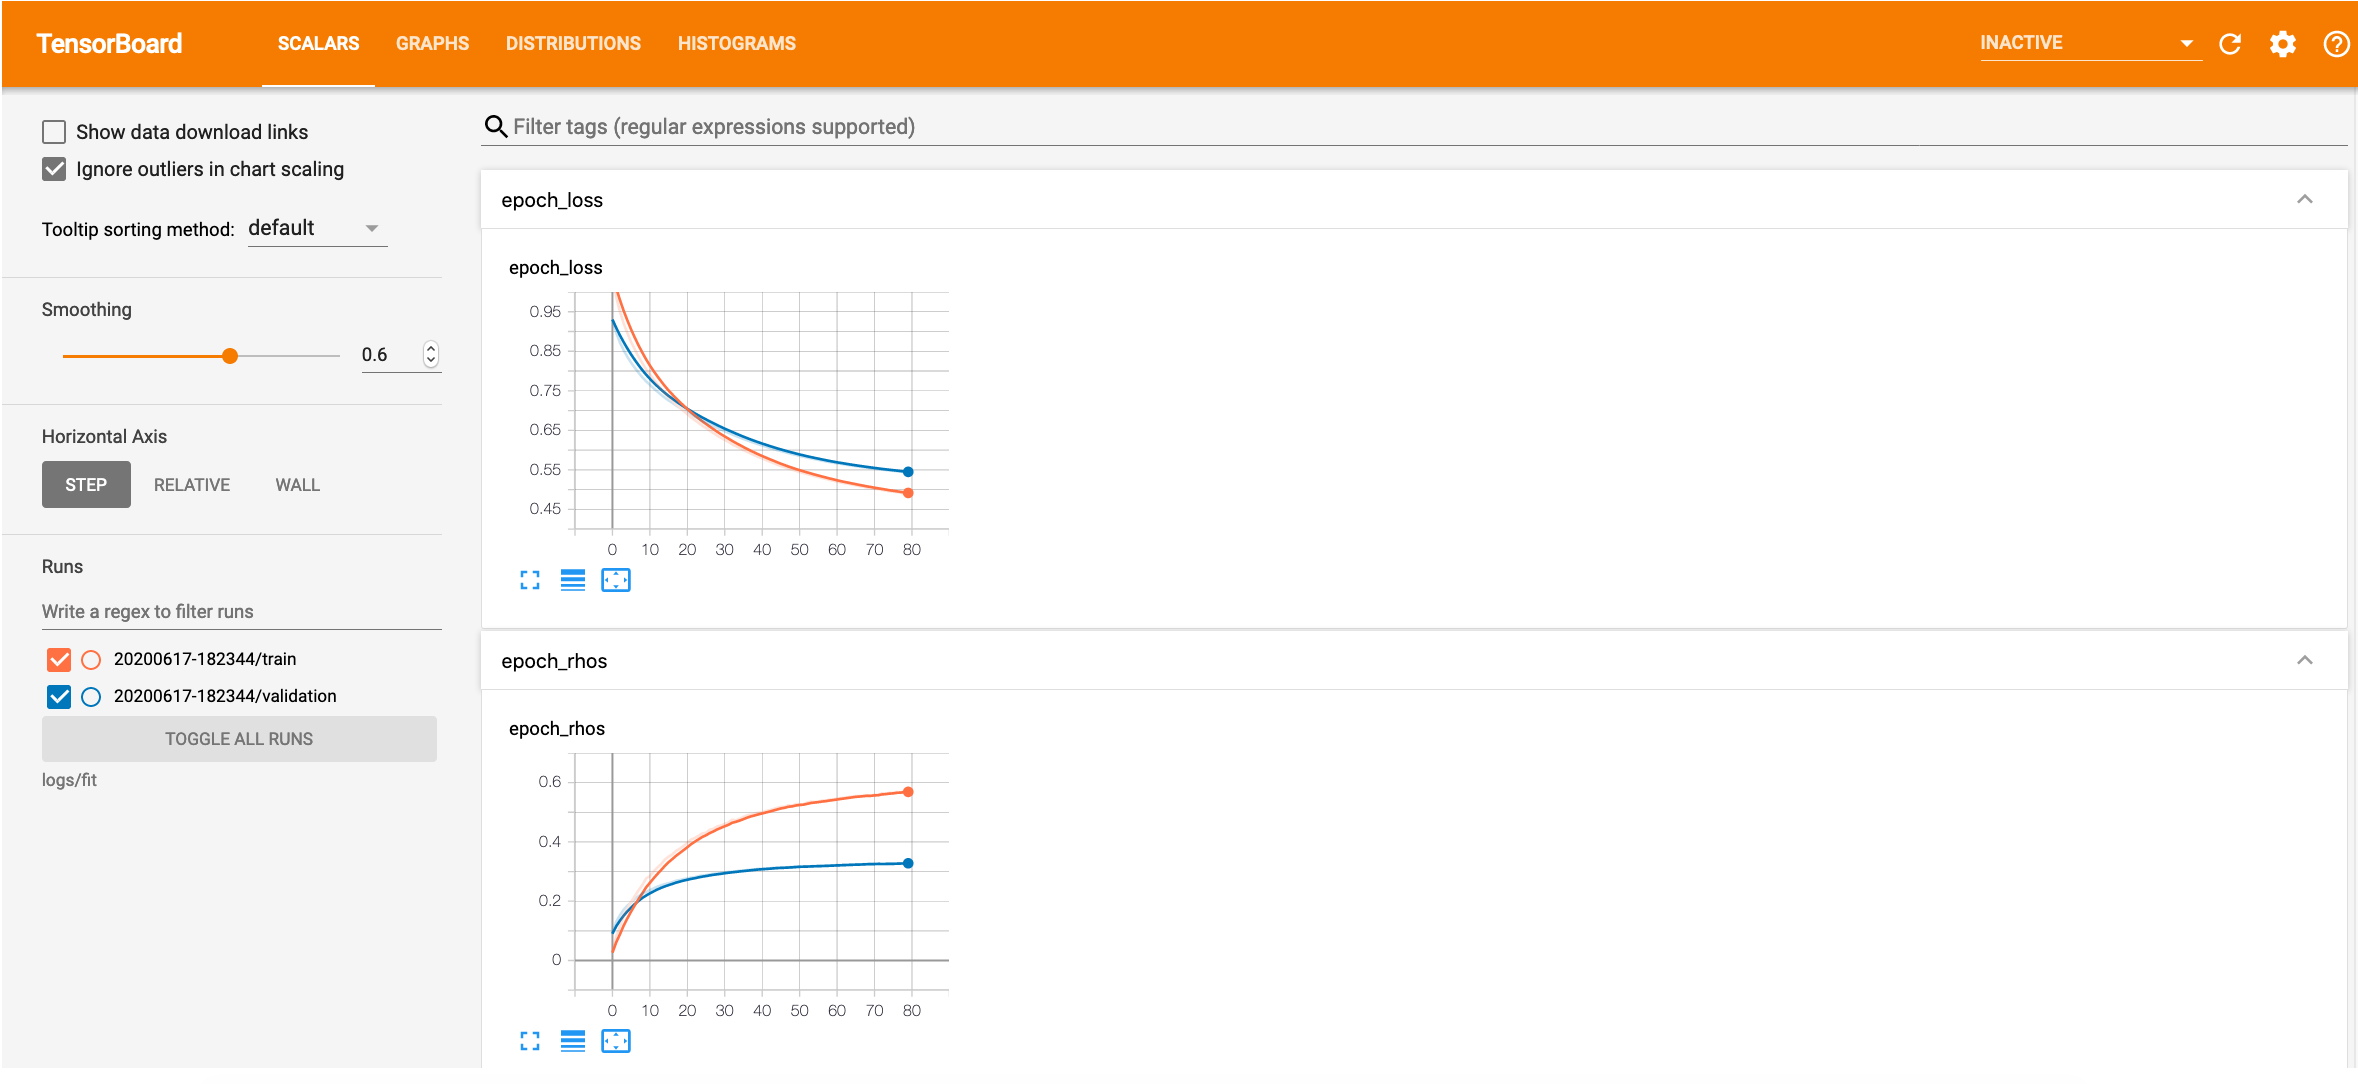

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('1.png', width=920, height=480)

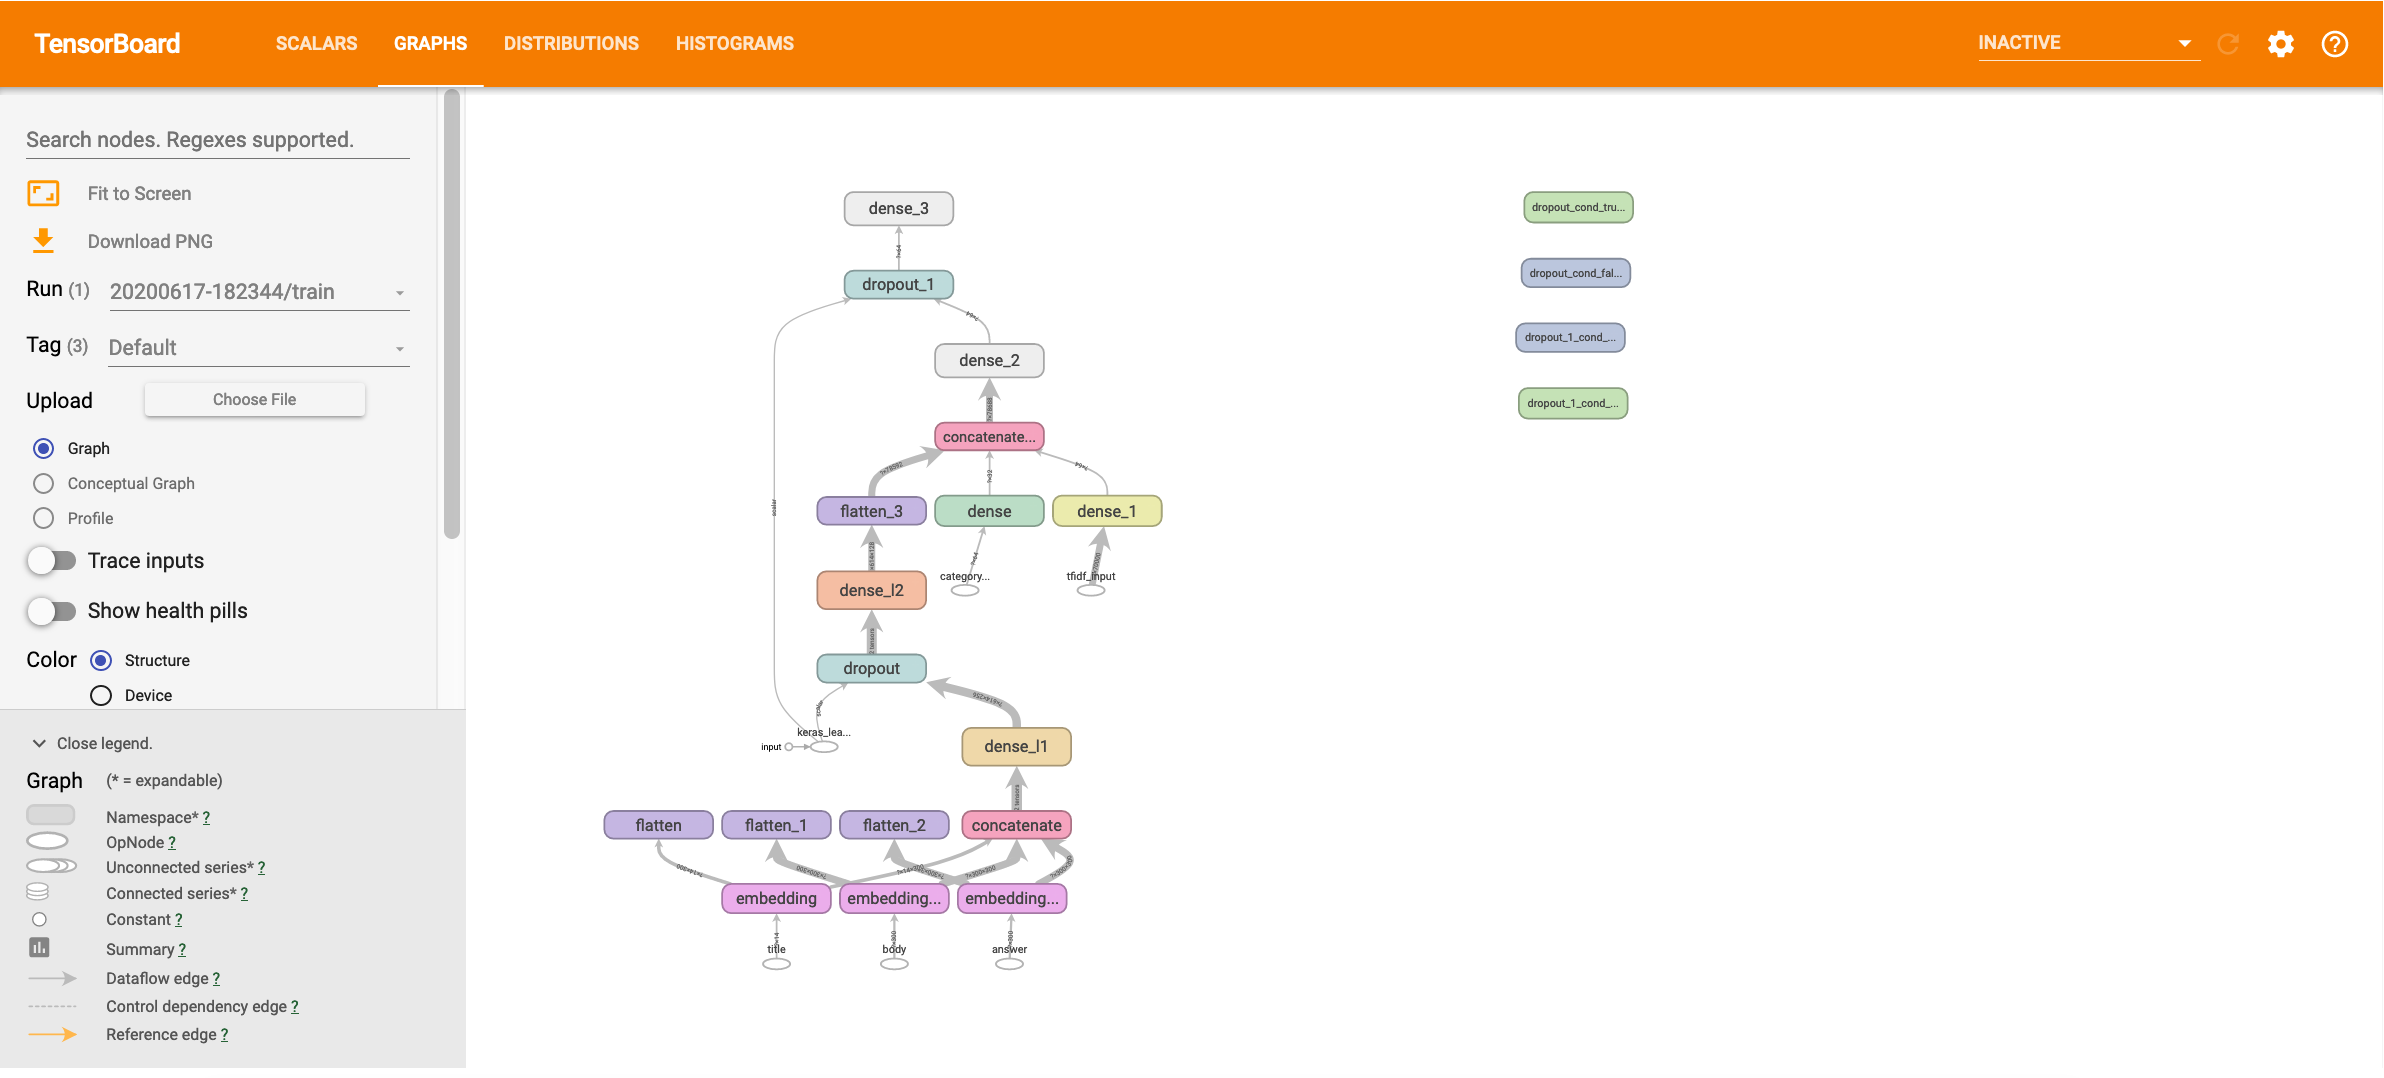

In [ ]:
Image('2.png', width=920, height=480)

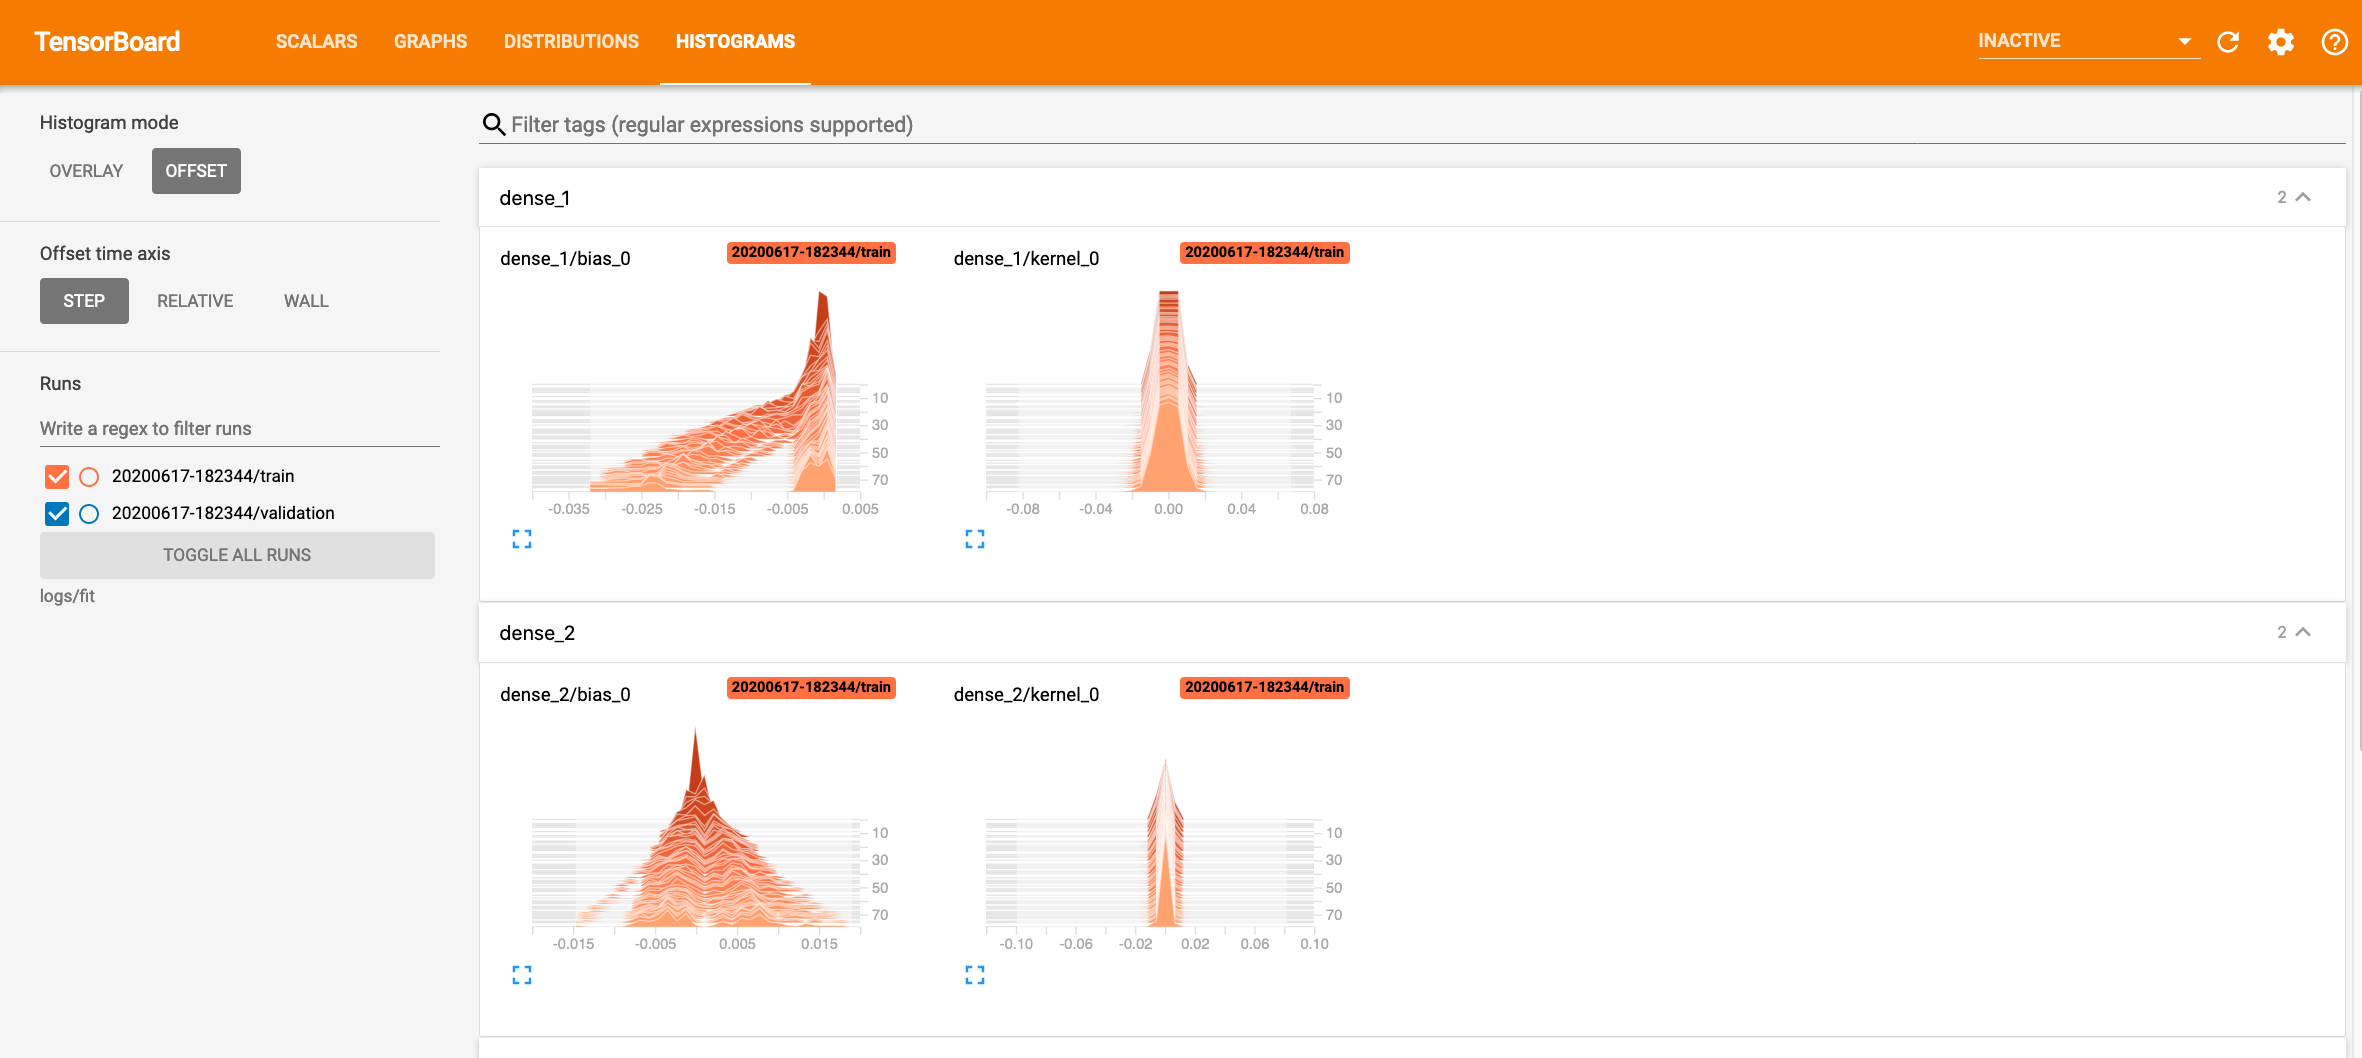

In [ ]:
Image('3.png', width=920, height=480)

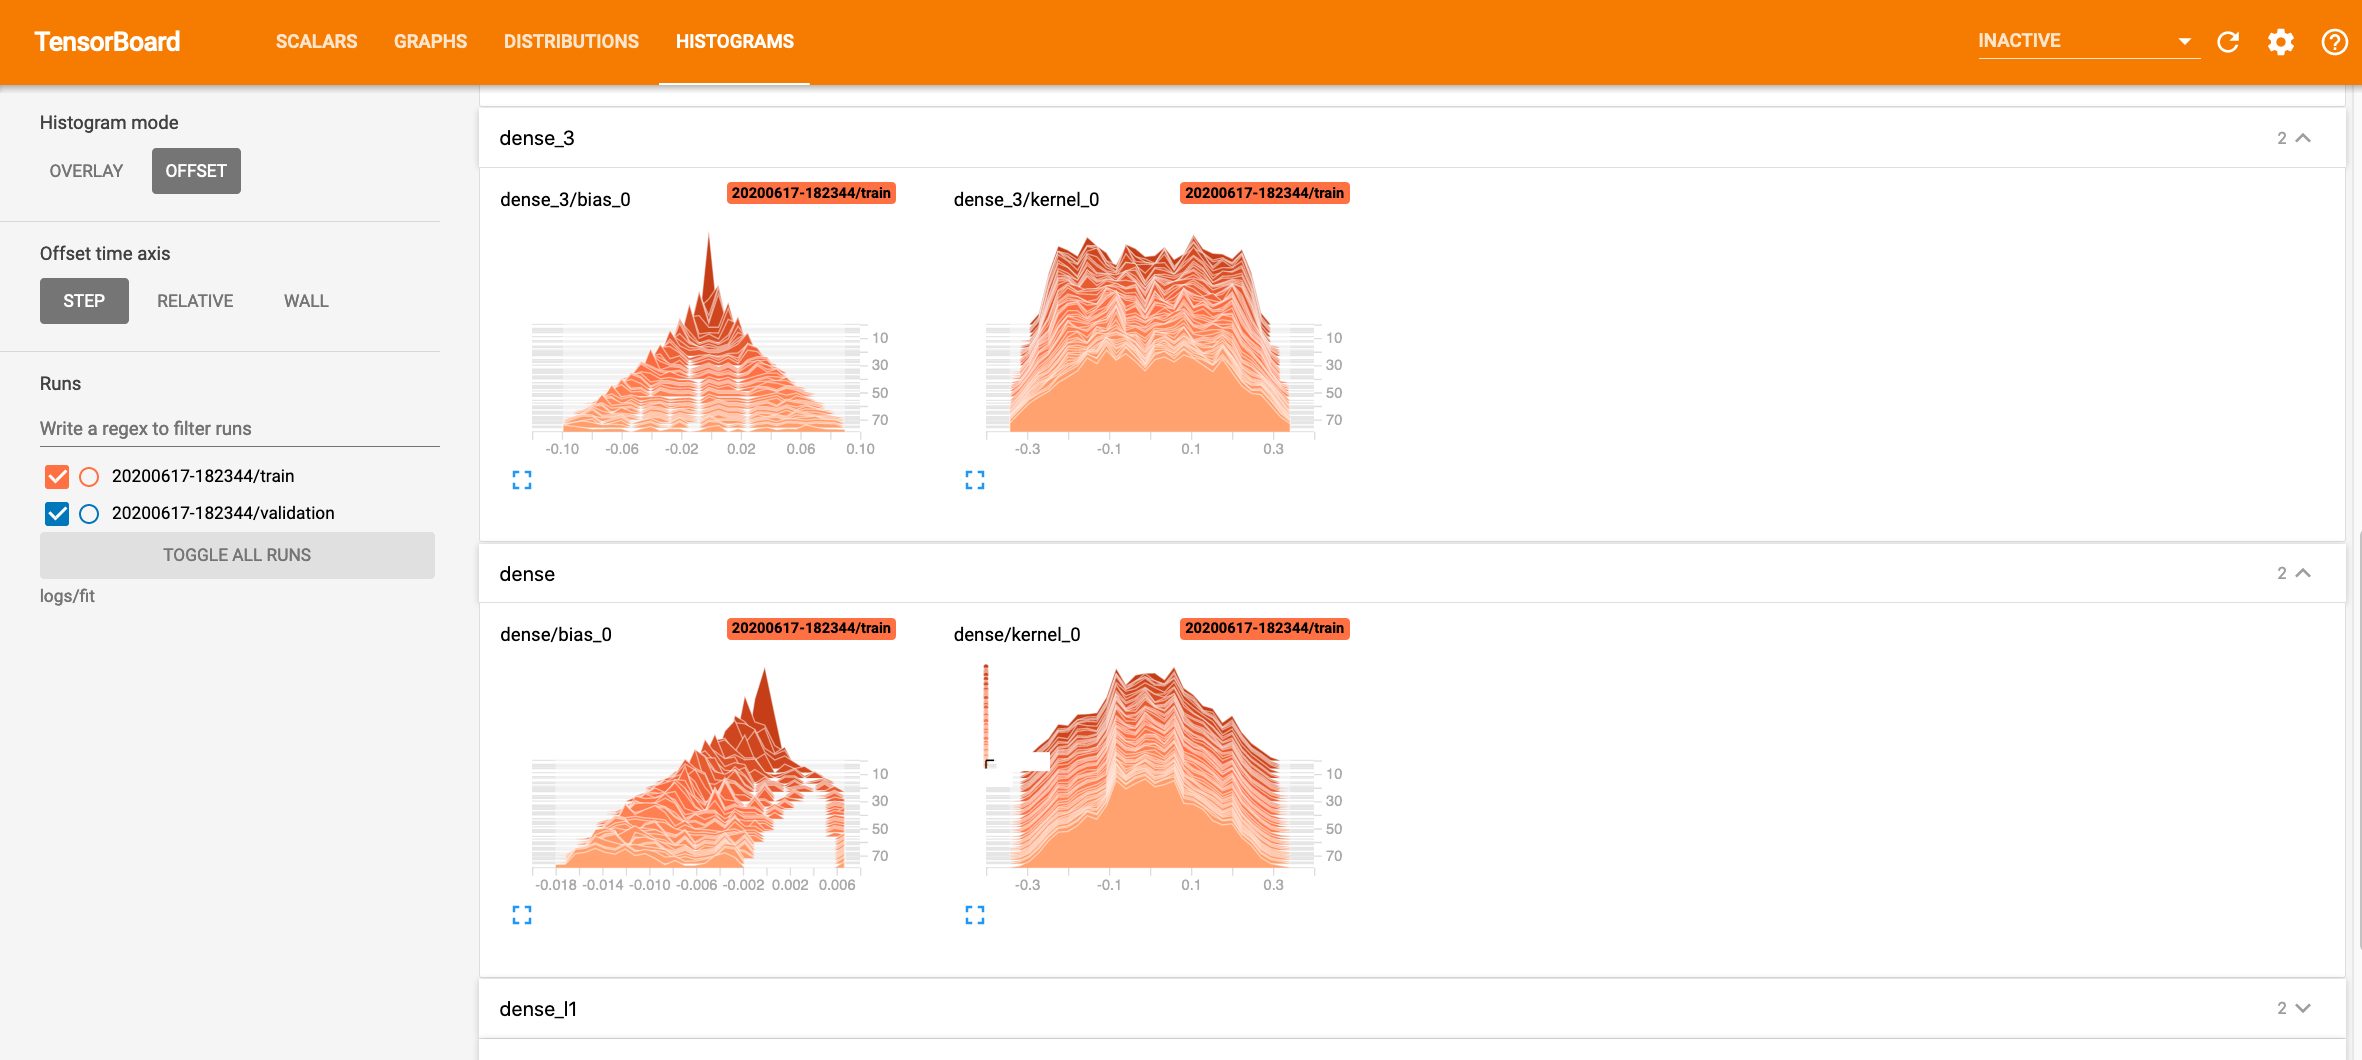

In [ ]:
Image('4.png', width=920, height=480)

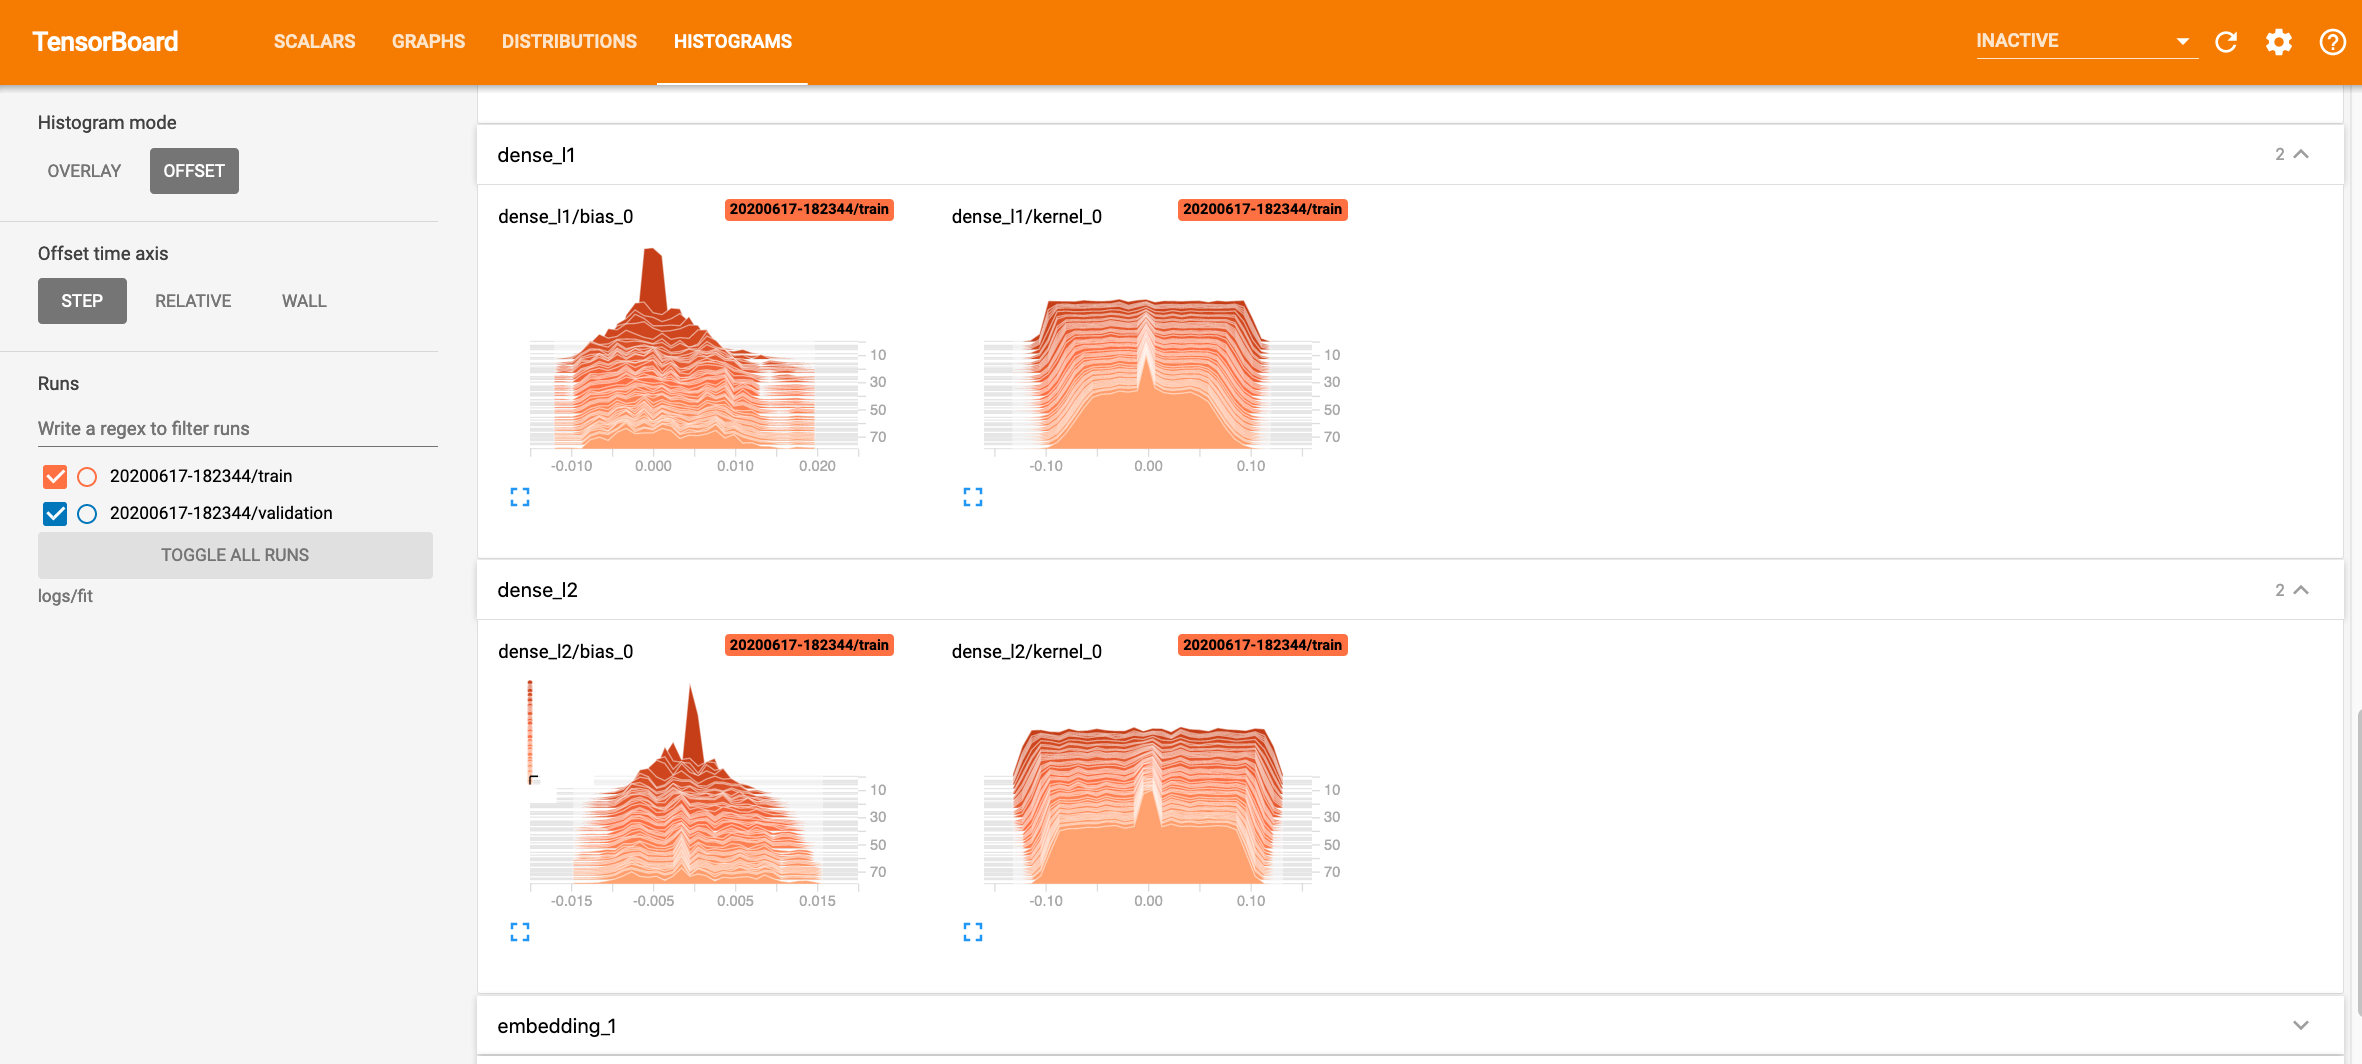

In [ ]:
Image('5.png', width=920, height=480)

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["model","number of trainable parameters","train loss","train spearman score","cv loss","test spearman score"]
x.add_row(['GRU', "6,584,286", 0.3628, 0.5844, 0.4254, 0.3304])
x.add_row(['Conv-1D', "39,694,406", 0.4032, 0.4532, 0.4310, 0.3211])
x.add_row(['Dense', "9,630,142", 0.4897, 0.5696, 0.5433, 0.3287])
print(x)

+---------+--------------------------------+------------+----------------------+---------+---------------------+
|  model  | number of trainable parameters | train loss | train spearman score | cv loss | test spearman score |
+---------+--------------------------------+------------+----------------------+---------+---------------------+
|   GRU   |           6,584,286            |   0.3628   |        0.5844        |  0.4254 |        0.3304       |
| Conv-1D |           39,694,406           |   0.4032   |        0.4532        |  0.431  |        0.3211       |
|  Dense  |           9,630,142            |   0.4897   |        0.5696        |  0.5433 |        0.3287       |
+---------+--------------------------------+------------+----------------------+---------+---------------------+


#### We can see that the model architecture with GRU out performs the other models with the least number of trainable parameters.

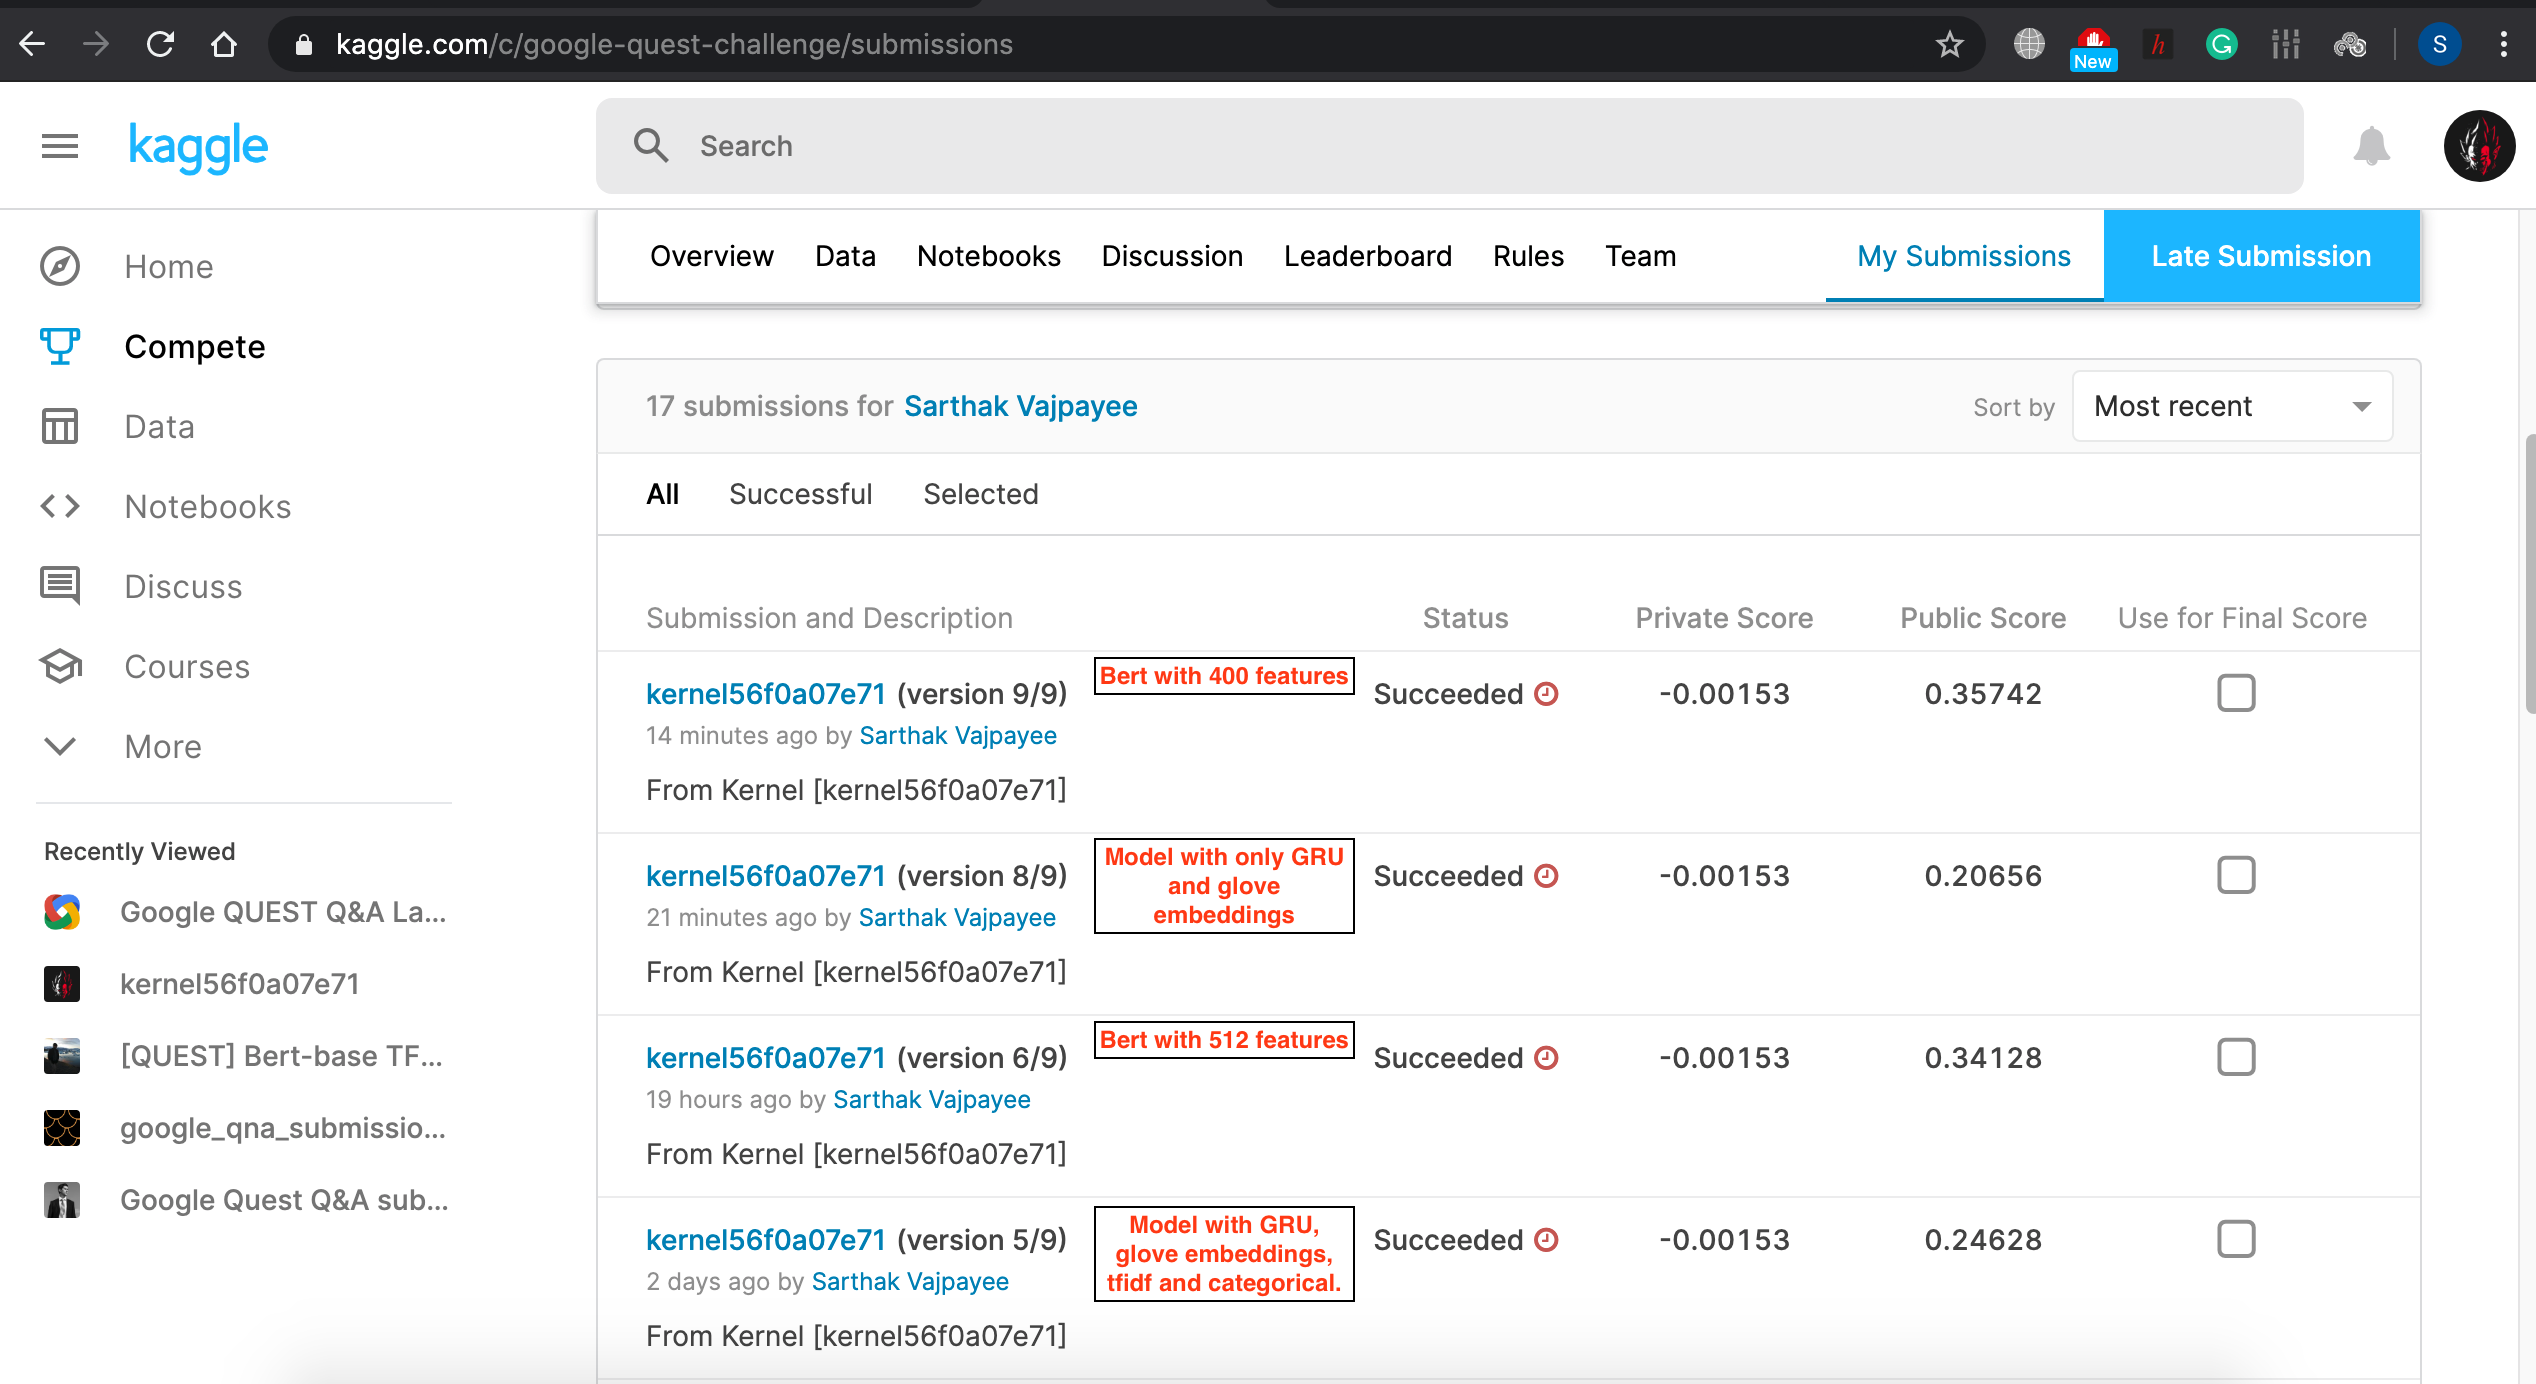

In [1]:
%matplotlib inline
from IPython.display import Image
Image('score.png', width=860, height=480)